# Cause of Death Project-
Date:27/01/2023 

The sum of mortality and morbidity is referred to as the ‘burden of disease’ and can be measured by a metric called ‘Disability Adjusted Life Years‘ (DALYs). DALYs are measuring lost health and are a standardized metric that allow for direct comparisons of disease burdens of different diseases across countries, between different populations, and over time.One DALY represents one lost year of healthy life. The first ‘Global Burden of Disease’ (GBD) was GBD 1990 and the DALY metric was prominently featured in the World Bank’s 1993 World Development Report. Today it is published by both the researchers at the Institute of Health Metrics and Evaluation (IHME) and the ‘Disease Burden Unit’ at the World Health Organization (WHO), which was created in 1998. The IHME continues the work that was started in the early 1990s and publishes the Global Burden of Disease study.
    In this Dataset,contains disease related mortality numbers from 1990 to 2019 which spans close to 30 years. Lifestyle related illnesses are diseases which have sprung up as a by product of advancement and this has impacted every aspect of our life.The world just witnessed how a pandemic can change our lives forever.But beyond the pandemic there are a host of other illness which plague our everyday world and which influcence the minds of our decision makers. This notebook is an attempt to understand the devastation caused by some of these new age diseases on a global scale using the 30 year historic data.
    
    

In [1]:
#klib is a Python library for importing, cleaning, analyzing and preprocessing data. Future versions will include model creation and optimization to provide an end-to-end solution.
!pip install -U klib

Defaulting to user installation because normal site-packages is not writeable


# Importing Required libraries¶

In [2]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn import preprocessing
from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import klib

In [3]:
df = pd.read_csv('cause_of_death_dataset.csv', delimiter="\t", encoding='utf-8')
df.shape

(6120, 34)

In this dataset there are 6120 rows and 34 coloumns

In [4]:
df.head(5)

Country/Territory Code  Year  Meningitis  \
0       Afghanistan  AFG  1990        2159   
1       Afghanistan  AFG  1991        2218   
2       Afghanistan  AFG  1992        2475   
3       Afghanistan  AFG  1993        2812   
4       Afghanistan  AFG  1994        3027   

   Alzheimer's Disease and Other Dementias  Parkinson's Disease  \
0                                     1116                  371   
1                                     1136                  374   
2                                     1162                  378   
3                                     1187                  384   
4                                     1211                  391   

   Nutritional Deficiencies  Malaria  Drowning  Interpersonal Violence  ...  \
0                      2087       93      1370                    1538  ...   
1                      2153      189      1391                    2001  ...   
2                      2441      239      1514                    2299  ...   
3                      2837      108      1687                    2589  ...   
4                      3081      211      1809                    2849  ...   

   Diabetes Mellitus  Chronic Kidney Disease  Poisonings  \
0               2108                    3709         338   
1               2120                    3724         351   
2               2153                    3776         386   
3               2195                    3862         425   
4               2231                    3932         451   

   Protein-Energy Malnutrition  Road Injuries  Chronic Respiratory Diseases  \
0                         2054           4154                          5945   
1                         2119           4472                          6050   
2                         2404           5106                          6223   
3                         2797           5681                          6445   
4                         3038           6001                          6664   

   Cirrhosis and Other Chronic Liver Diseases  Digestive Diseases  \
0                                        2673                5005   
1                                        2728                5120   
2                                        2830                5335   
3                                        2943                5568   
4                                        3027                5739   

   Fire, Heat, and Hot Substances  Acute Hepatitis  
0                             323             2985  
1                             332             3092  
2                             360             3325  
3                             396             3601  
4                             420             3816  

[5 rows x 34 columns]

In [5]:
df.tail(5)

Country/Territory Code  Year  Meningitis  \
6115          Zimbabwe  ZWE  2015        1439   
6116          Zimbabwe  ZWE  2016        1457   
6117          Zimbabwe  ZWE  2017        1460   
6118          Zimbabwe  ZWE  2018        1450   
6119          Zimbabwe  ZWE  2019        1450   

      Alzheimer's Disease and Other Dementias  Parkinson's Disease  \
6115                                      754                  215   
6116                                      767                  219   
6117                                      781                  223   
6118                                      795                  227   
6119                                      812                  232   

      Nutritional Deficiencies  Malaria  Drowning  Interpersonal Violence  \
6115                      3019     2518       770                    1302   
6116                      3056     2050       801                    1342   
6117                      2990     2116       818                    1363   
6118                      2918     2088       825                    1396   
6119                      2884     2068       827                    1434   

      ...  Diabetes Mellitus  Chronic Kidney Disease  Poisonings  \
6115  ...               3176                    2108         381   
6116  ...               3259                    2160         393   
6117  ...               3313                    2196         398   
6118  ...               3381                    2240         400   
6119  ...               3460                    2292         405   

      Protein-Energy Malnutrition  Road Injuries  \
6115                         2990           2373   
6116                         3027           2436   
6117                         2962           2473   
6118                         2890           2509   
6119                         2855           2554   

      Chronic Respiratory Diseases  \
6115                          2751   
6116                          2788   
6117                          2818   
6118                          2849   
6119                          2891   

      Cirrhosis and Other Chronic Liver Diseases  Digestive Diseases  \
6115                                        1956                4202   
6116                                        1962                4264   
6117                                        2007                4342   
6118                                        2030                4377   
6119                                        2065                4437   

      Fire, Heat, and Hot Substances  Acute Hepatitis  
6115                             632              146  
6116                             648              146  
6117                             654              144  
6118                             657              139  
6119                             662              136  

[5 rows x 34 columns]

In this Dataset,contains disease realted mortality numbers from 1990 to 2019 which spans close to 30 years.

# About the Columns

01. Country/Territory - This column shows Name of the Country/Territory
02. Code - Country/Territory Code
03. Year - Year of the Incident
04. Meningitis - No. of People died from Meningitis
05. Alzheimer's Disease and Other Dementias - No. of People died from Alzheimer's Disease and Other Dementias
06. Parkinson's Disease - No. of People died from Parkinson's Disease
07. Nutritional Deficiencies - No. of People died from Nutritional Deficiencies
08. Malaria - No. of People died from Malaria
09. Drowning - No. of People died from Drowning
10. Interpersonal Violence - No. of People died from Interpersonal Violence
11. Maternal Disorders - No. of People died from Maternal Disorders
12. Drug Use Disorders - No. of People died from Drug Use Disorders
13. Tuberculosis - No. of People died from Tuberculosis
14. Cardiovascular Diseases - No. of People died from Cardiovascular Diseases
15. Lower Respiratory Infections - No. of People died from Lower Respiratory Infections
16. Neonatal Disorders - No. of People died from Neonatal Disorders
17. Alcohol Use Disorders - No. of People died from Alcohol Use Disorders
18. Self-harm - No. of People died from Self-harm
19. Exposure to Forces of Nature - No. of People died from Exposure to Forces of Nature
20. Diarrheal Diseases - No. of People died from Diarrheal Diseases
21. Environmental Heat and Cold Exposure - No. of People died from Environmental Heat and Cold Exposure
22. Neoplasms - No. of People died from Neoplasms
23. Conflict and Terrorism - No. of People died from Conflict and Terrorism
24. Diabetes Mellitus - No. of People died from Diabetes Mellitus
25. Chronic Kidney Disease - No. of People died from Chronic Kidney Disease
26. Poisonings - No. of People died from Poisoning
27. Protein-Energy Malnutrition - No. of People died from Protein-Energy Malnutrition
28. Chronic Respiratory Diseases - No. of People died from Chronic Respiratory Diseases
29. Cirrhosis and Other Chronic Liver Diseases - No. of People died from Cirrhosis and Other Chronic Liver Diseases
30. Digestive Diseases - No. of People died from Digestive Diseases
31. Fire, Heat, and Hot Substances - No. of People died from Fire or Heat or any Hot Substances
32. Acute Hepatitis - No. of People died from Acute Hepatitis


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [7]:
df.isnull().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

In this dataset No null Values are present in the any of the column.

In [8]:
df.describe()

Year    Meningitis  Alzheimer's Disease and Other Dementias  \
count  6120.000000   6120.000000                              6120.000000   
mean   2004.500000   1719.701307                              4864.189379   
std       8.656149   6672.006930                             18220.659072   
min    1990.000000      0.000000                                 0.000000   
25%    1997.000000     15.000000                                90.000000   
50%    2004.500000    109.000000                               666.500000   
75%    2012.000000    847.250000                              2456.250000   
max    2019.000000  98358.000000                            320715.000000   

       Parkinson's Disease  Nutritional Deficiencies        Malaria  \
count          6120.000000               6120.000000    6120.000000   
mean           1173.169118               2253.600000    4140.960131   
std            4616.156238              10483.633601   18427.753137   
min               0.000000                  0.000000       0.000000   
25%              27.000000                  9.000000       0.000000   
50%             164.000000                119.000000       0.000000   
75%             609.250000               1167.250000     393.000000   
max           76990.000000             268223.000000  280604.000000   

            Drowning  Interpersonal Violence  Maternal Disorders  \
count    6120.000000             6120.000000         6120.000000   
mean     1683.333170             2083.797222         1262.589216   
std      8877.018366             6917.006075         6057.973183   
min         0.000000                0.000000            0.000000   
25%        34.000000               40.000000            5.000000   
50%       177.000000              265.000000           54.000000   
75%       698.000000              877.000000          734.000000   
max    153773.000000            69640.000000       107929.000000   

            HIV/AIDS  ...  Diabetes Mellitus  Chronic Kidney Disease  \
count    6120.000000  ...        6120.000000             6120.000000   
mean     5941.898529  ...        5138.704575             4724.132680   
std     21011.962487  ...       16773.081040            16470.429969   
min         0.000000  ...           1.000000                0.000000   
25%        11.000000  ...         236.000000              145.750000   
50%       136.000000  ...        1087.000000              822.000000   
75%      1879.000000  ...        2954.000000             2922.500000   
max    305491.000000  ...      273089.000000           222922.000000   

         Poisonings  Protein-Energy Malnutrition  Road Injuries  \
count   6120.000000                  6120.000000    6120.000000   
mean     425.013399                  1965.994281    5930.795588   
std     2022.640521                  8255.999063   24097.784291   
min        0.000000                     0.000000       0.000000   
25%        6.000000                     5.000000     174.750000   
50%       52.500000                    92.000000     966.500000   
75%      254.000000                  1042.500000    3435.250000   
max    30883.000000                202241.000000  329237.000000   

       Chronic Respiratory Diseases  \
count                  6.120000e+03   
mean                   1.709237e+04   
std                    1.051572e+05   
min                    1.000000e+00   
25%                    2.890000e+02   
50%                    1.689000e+03   
75%                    5.249750e+03   
max                    1.366039e+06   

       Cirrhosis and Other Chronic Liver Diseases  Digestive Diseases  \
count                                 6120.000000         6120.000000   
mean                                  6124.072059        10725.267157   
std                                  20688.118580        37228.051096   
min                                      0.000000            0.000000   
25%                                    154.000000          284.000000   
50%                     

<AxesSubplot:>

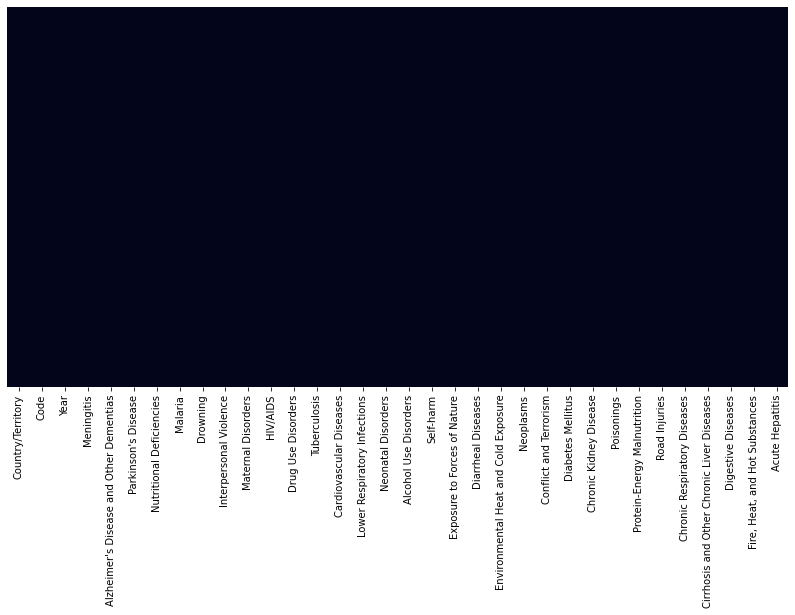

In [9]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

There is no null column entery in the given dataset

# Cleaning the dataset with klib


In [10]:
df = klib.data_cleaning(df)

Long column names detected (>25 characters). Consider renaming the following columns ['alzheimer_s_disease_and_other_dementias', 'lower_respiratory_infections', 'exposure_to_forces_of_nature', 'environmental_heat_and_cold_exposure', 'protein_energy_malnutrition', 'chronic_respiratory_diseases', 'cirrhosis_and_other_chronic_liver_diseases', 'fire,_heat,_and_hot_substances'].
Shape of cleaned data: (6120, 34) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.8 MB (-50.31%)



In [11]:
df.columns

Index(['country_territory', 'code', 'year', 'meningitis',
       'alzheimer_s_disease_and_other_dementias', 'parkinson_s_disease',
       'nutritional_deficiencies', 'malaria', 'drowning',
       'interpersonal_violence', 'maternal_disorders', 'hiv_aids',
       'drug_use_disorders', 'tuberculosis', 'cardiovascular_diseases',
       'lower_respiratory_infections', 'neonatal_disorders',
       'alcohol_use_disorders', 'self_harm', 'exposure_to_forces_of_nature',
       'diarrheal_diseases', 'environmental_heat_and_cold_exposure',
       'neoplasms', 'conflict_and_terrorism', 'diabetes_mellitus',
       'chronic_kidney_disease', 'poisonings', 'protein_energy_malnutrition',
       'road_injuries', 'chronic_respiratory_diseases',
       'cirrhosis_and_other_chronic_liver_diseases', 'digestive_diseases',
       'fire,_heat,_and_hot_substances', 'acute_hepatitis'],
      dtype='object')

This are the columns of dataset after data cleaning

# Dtypes of DataFrame

In [12]:
df.dtypes

country_territory                             string
code                                          string
year                                           int16
meningitis                                     int32
alzheimer_s_disease_and_other_dementias        int32
parkinson_s_disease                            int32
nutritional_deficiencies                       int32
malaria                                        int32
drowning                                       int32
interpersonal_violence                         int32
maternal_disorders                             int32
hiv_aids                                       int32
drug_use_disorders                             int32
tuberculosis                                   int32
cardiovascular_diseases                        int32
lower_respiratory_infections                   int32
neonatal_disorders                             int32
alcohol_use_disorders                          int32
self_harm                                     

In [13]:
df.head(10)

country_territory code  year  meningitis  \
0       Afghanistan  AFG  1990        2159   
1       Afghanistan  AFG  1991        2218   
2       Afghanistan  AFG  1992        2475   
3       Afghanistan  AFG  1993        2812   
4       Afghanistan  AFG  1994        3027   
5       Afghanistan  AFG  1995        3102   
6       Afghanistan  AFG  1996        3193   
7       Afghanistan  AFG  1997        3304   
8       Afghanistan  AFG  1998        3281   
9       Afghanistan  AFG  1999        3200   

   alzheimer_s_disease_and_other_dementias  parkinson_s_disease  \
0                                     1116                  371   
1                                     1136                  374   
2                                     1162                  378   
3                                     1187                  384   
4                                     1211                  391   
5                                     1225                  394   
6                                     1239                  398   
7                                     1253                  402   
8                                     1267                  405   
9                                     1281                  409   

   nutritional_deficiencies  malaria  drowning  interpersonal_violence  ...  \
0                      2087       93      1370                    1538  ...   
1                      2153      189      1391                    2001  ...   
2                      2441      239      1514                    2299  ...   
3                      2837      108      1687                    2589  ...   
4                      3081      211      1809                    2849  ...   
5                      3131      175      1881                    2969  ...   
6                      3175      175      1969                    3331  ...   
7                      3250      240      2078                    3028  ...   
8                      3193      563      2098                    3098  ...   
9                      3115      468      2084                    2917  ...   

   diabetes_mellitus  chronic_kidney_disease  poisonings  \
0               2108                    3709         338   
1               2120                    3724         351   
2               2153                    3776         386   
3               2195                    3862         425   
4               2231                    3932         451   
5               2248                    3974         467   
6               2298                    4041         485   
7               2347                    4094         504   
8               2388                    4120         505   
9               2437                    4150         502   

   protein_energy_malnutrition  road_injuries  chronic_respiratory_diseases  \
0                         2054           4154                          5945   
1                         2119           4472                          6050   
2                         2404           5106                          6223   
3                         2797           5681                          6445   
4                         3038           6001                          6664   
5                         3087           6211                          6823   
6                         3130           6446                          7000   
7                         3203           6677                          7168   
8                         3145           6683                          7287   
9                         3068           6603                          7400   

   cirrhosis_and_other_chronic_liver_diseases  digestive_diseases  \
0                                        2673                5005   
1                                        2728                5120   
2                                        2830                5335   
3                                        2943                5568   
4          

In [14]:
# Replacing long country name 
df.country_territory.replace(to_replace='Democratic Republic of Congo',value = 'Congo',inplace=True)

In [15]:
df.country_territory[1442:1452]

1442    Congo
1443    Congo
1444    Congo
1445    Congo
1446    Congo
1447    Congo
1448    Congo
1449    Congo
1450    Congo
1451    Congo
Name: country_territory, dtype: string

# DISEASE SPECIFIC COUNTRY MORTALITY FOR 30 YEARS

C:\Users\Atharv\AppData\Local\Temp\ipykernel_8084\1572163347.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,6))


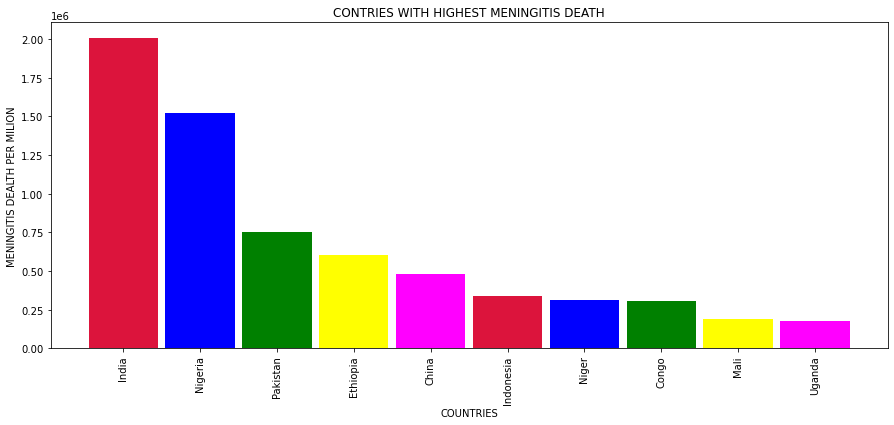

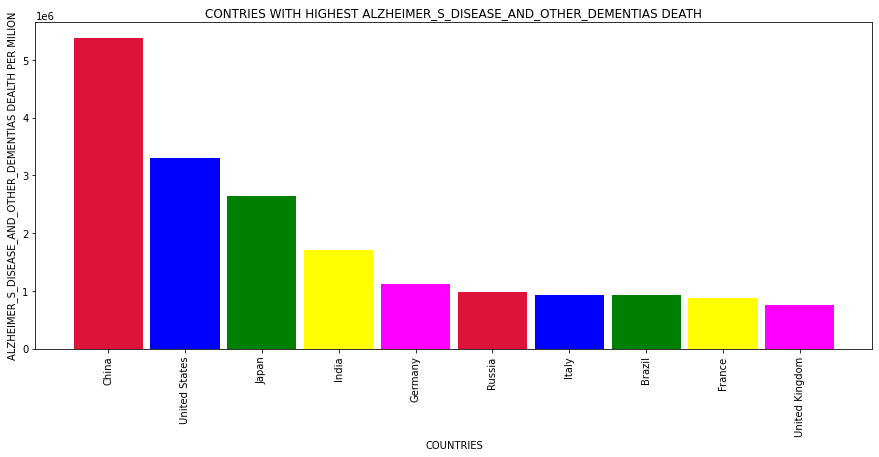

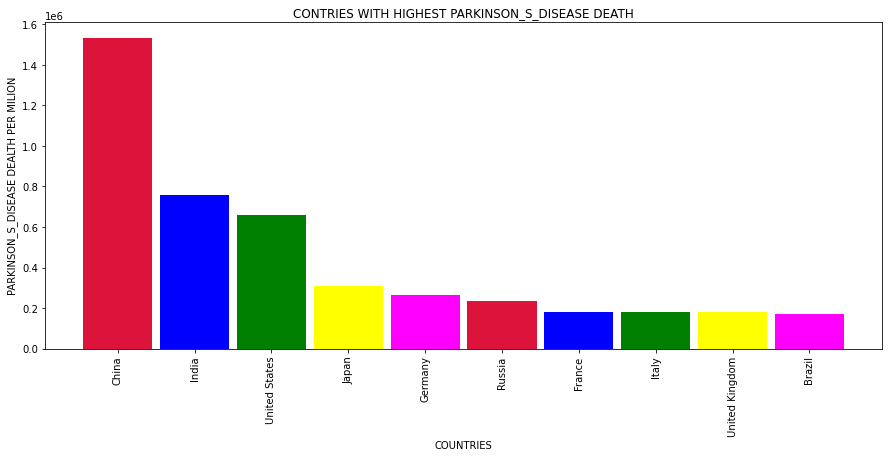

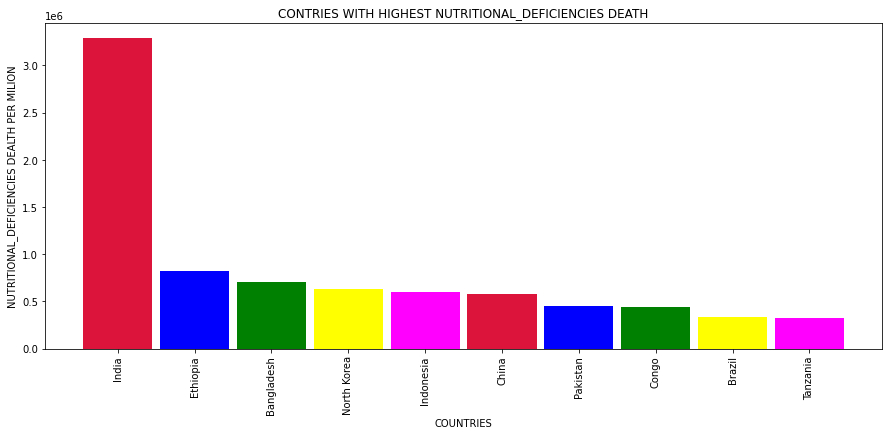

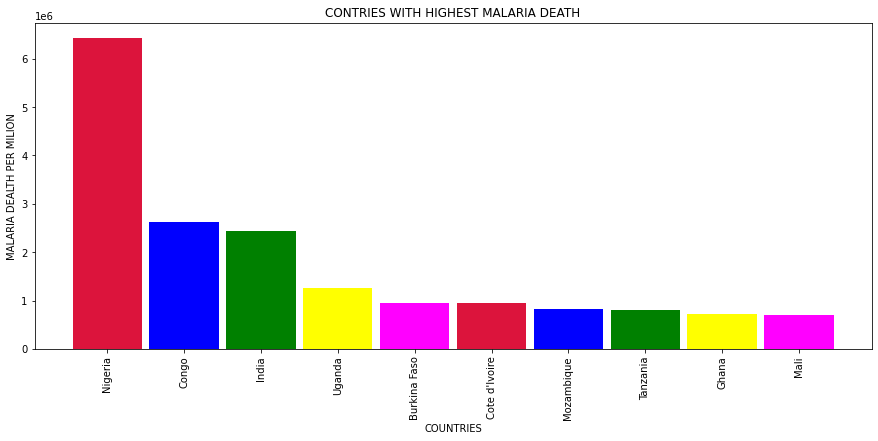

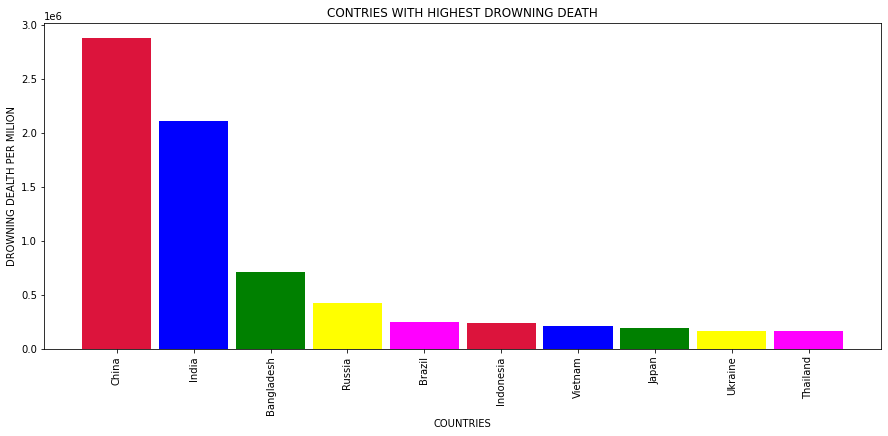

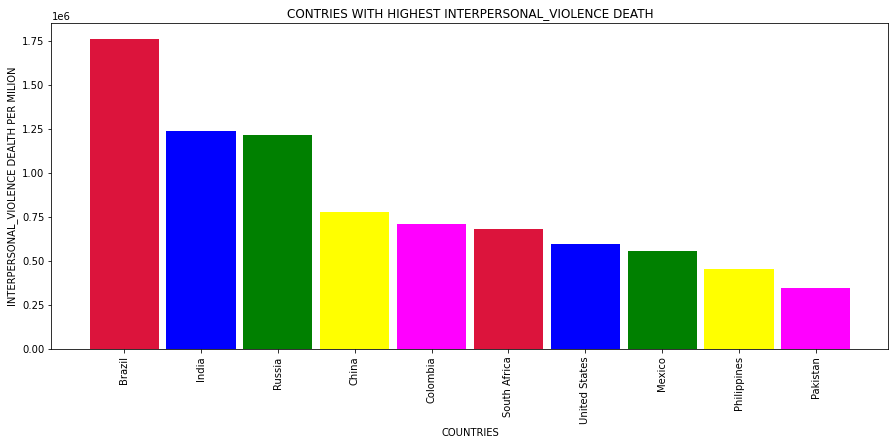

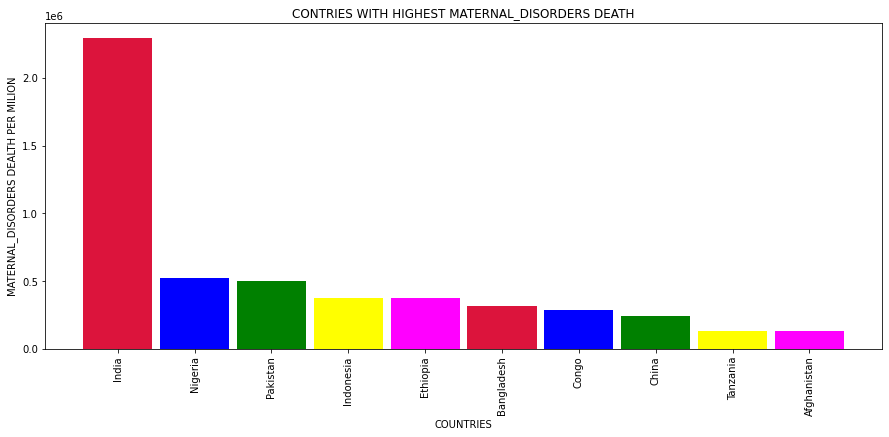

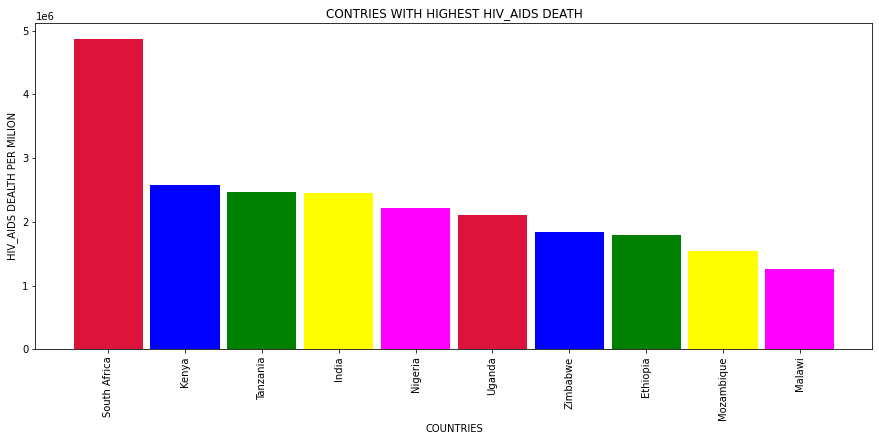

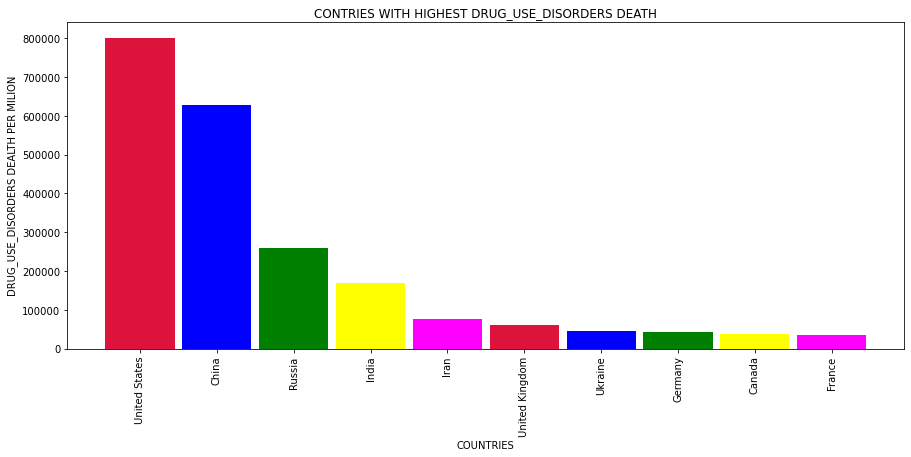

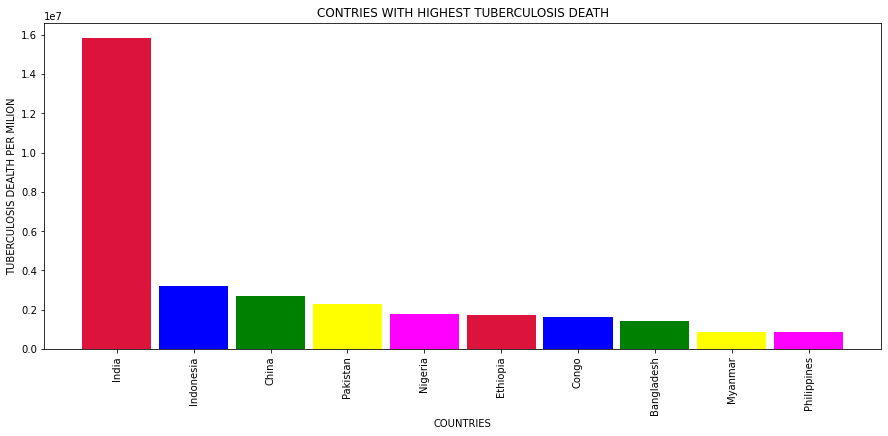

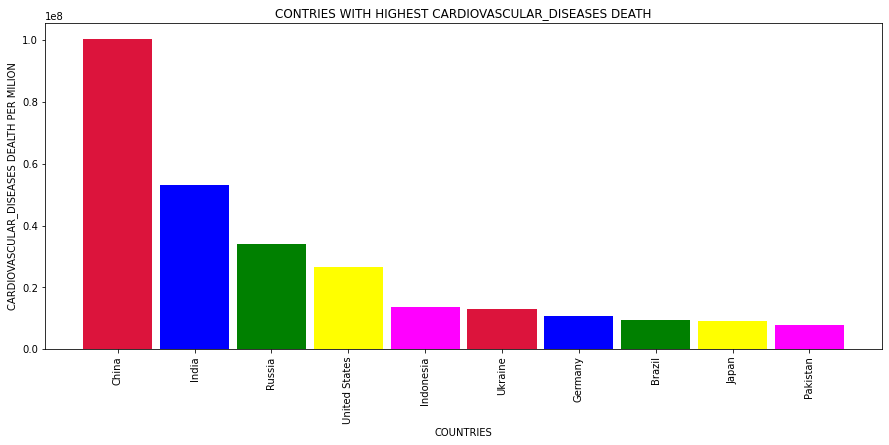

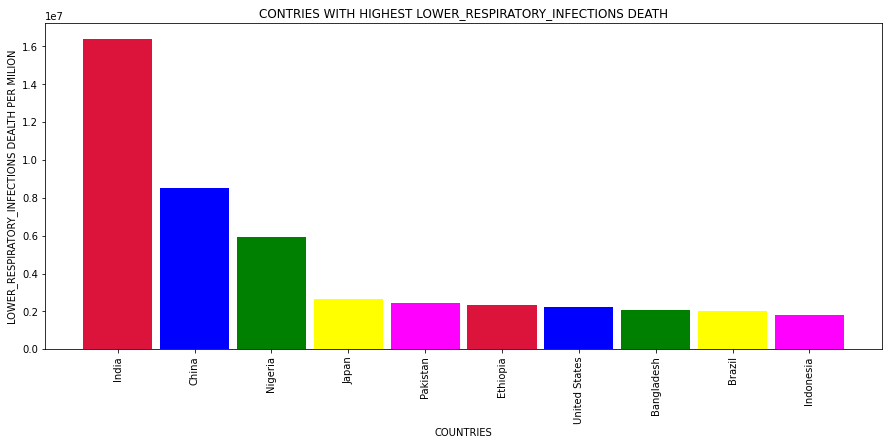

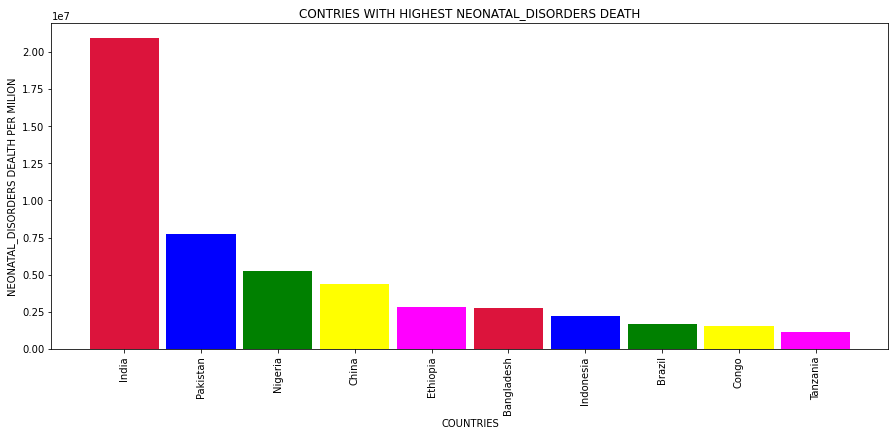

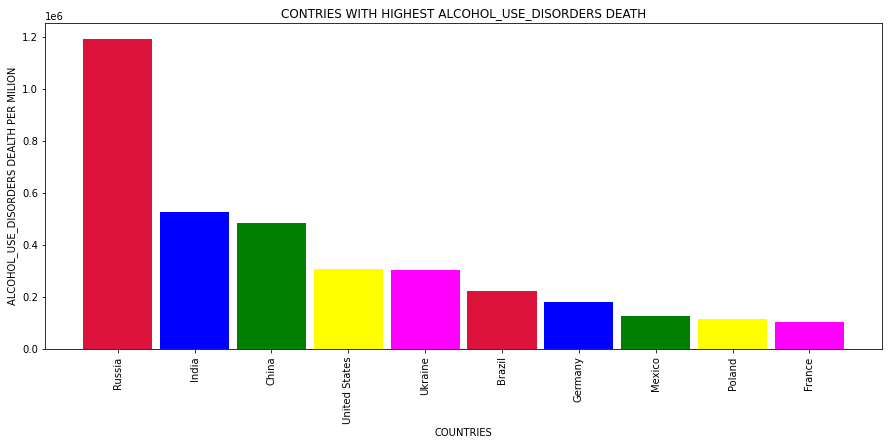

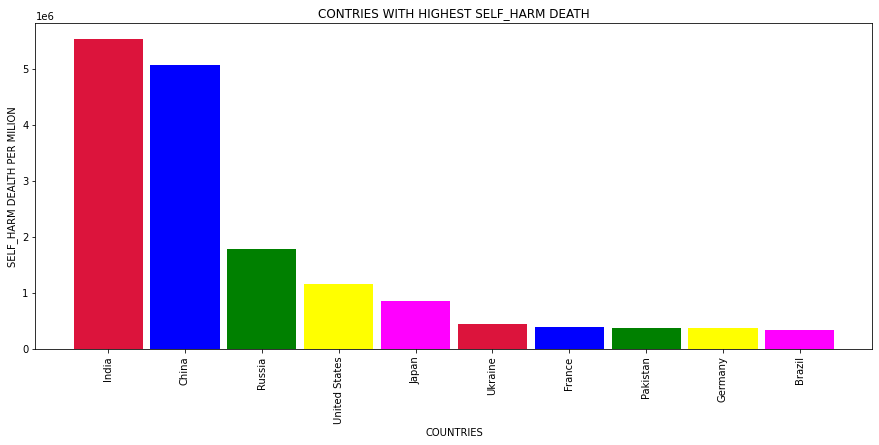

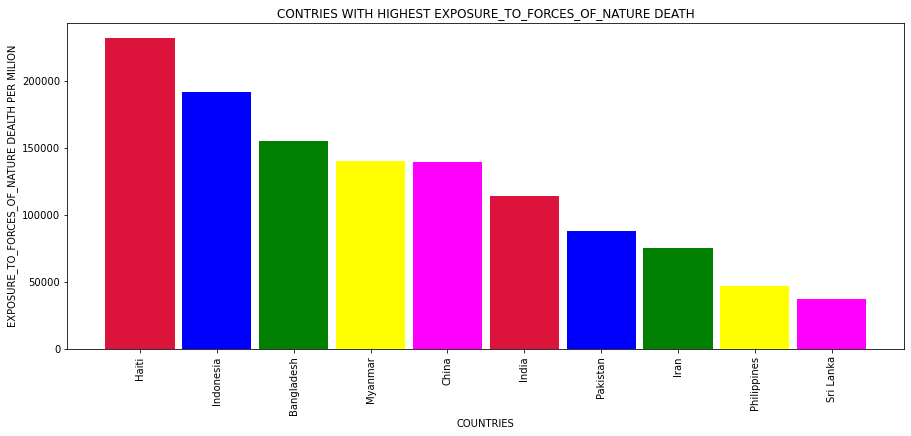

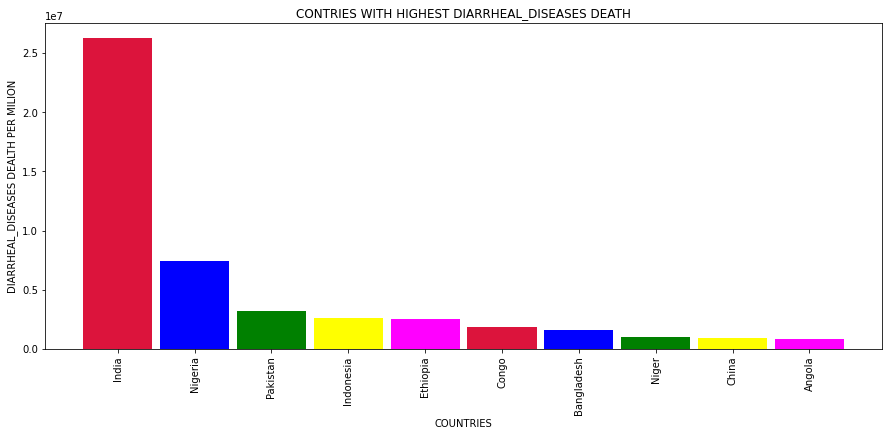

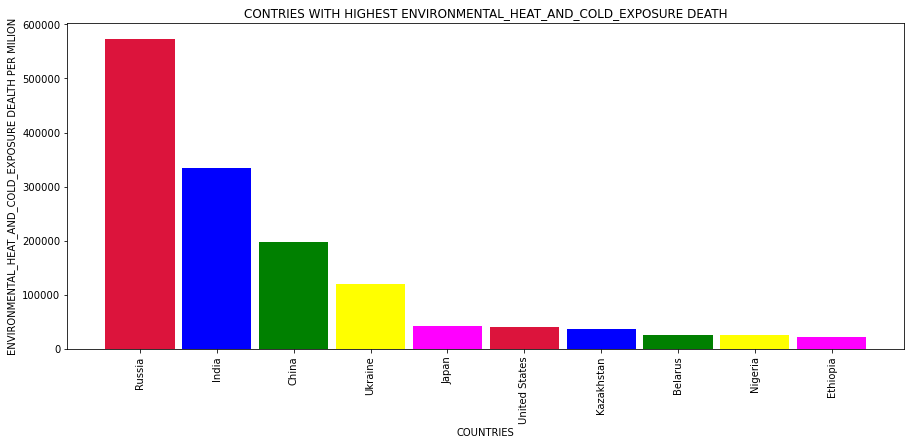

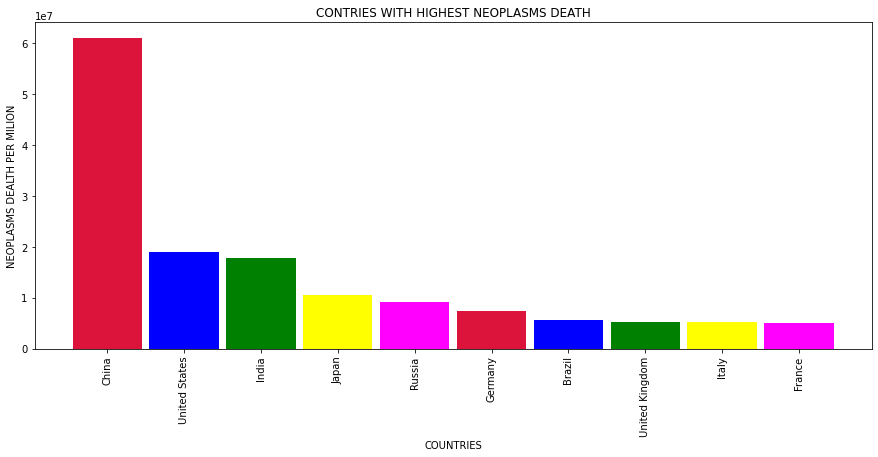

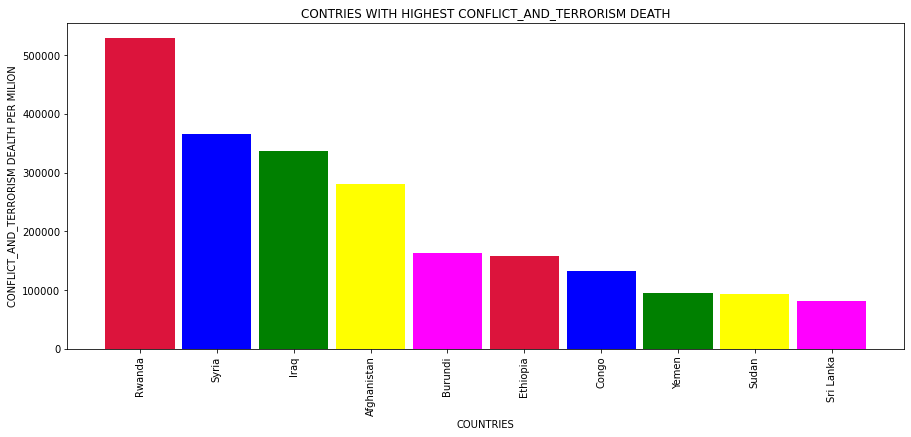

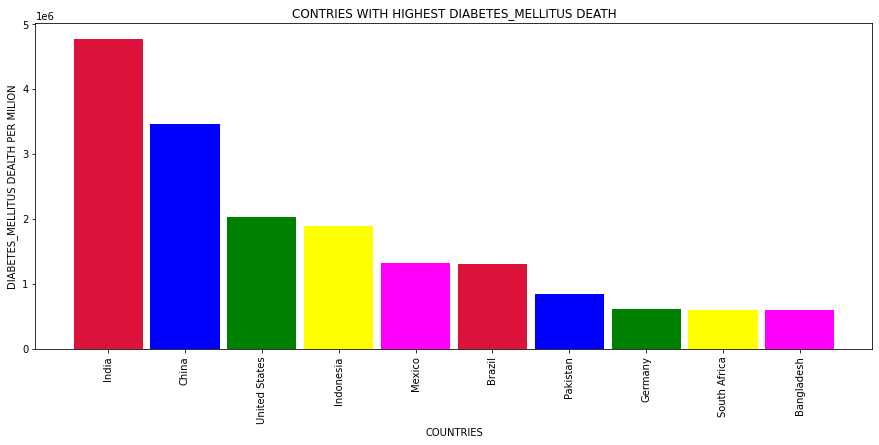

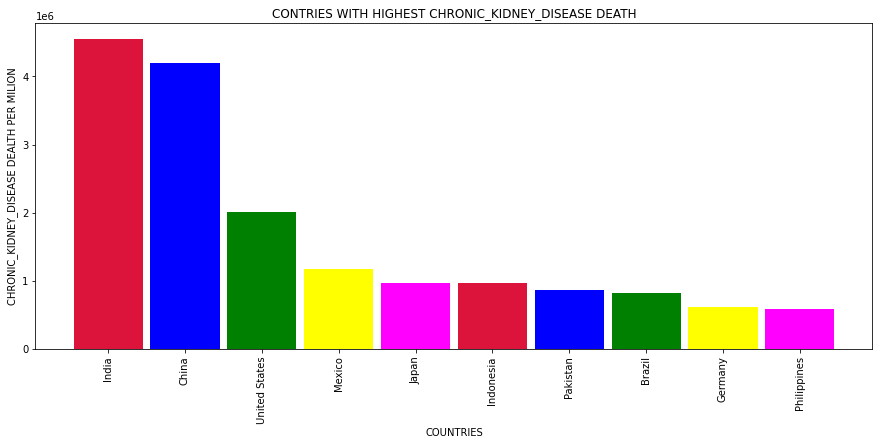

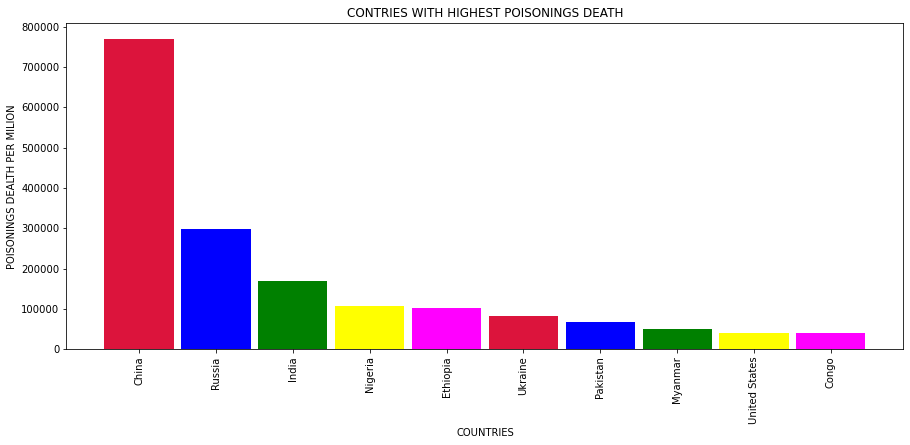

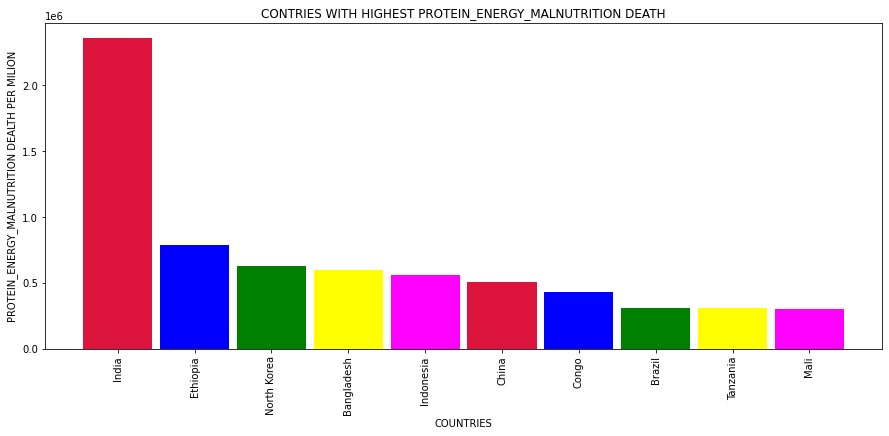

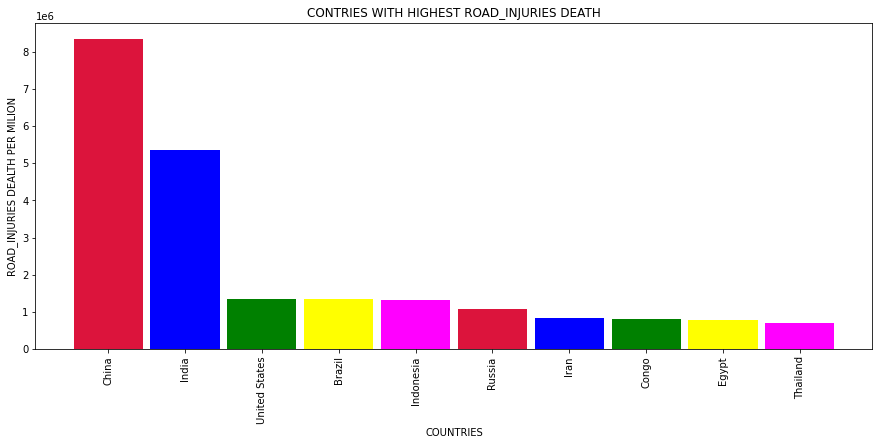

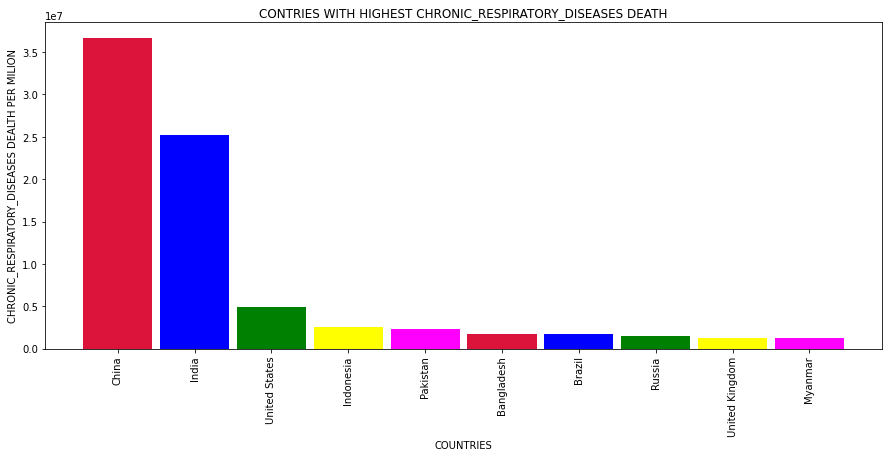

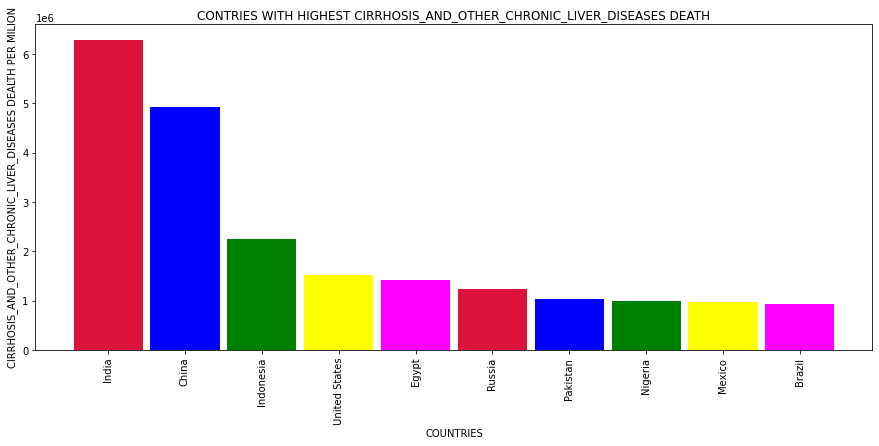

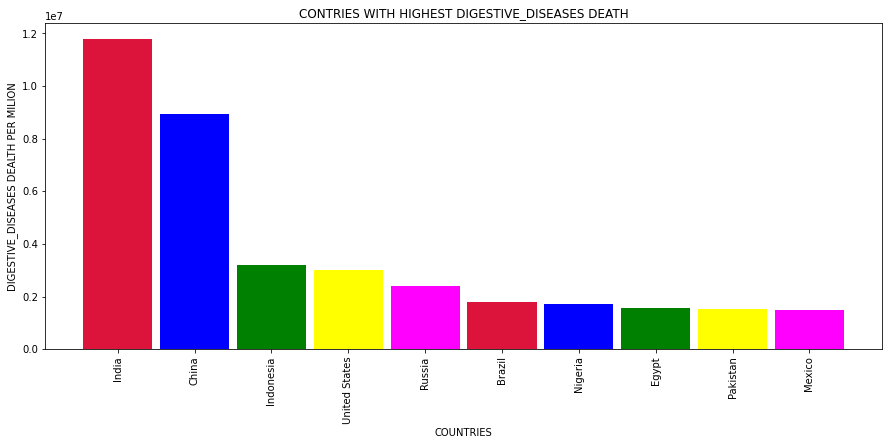

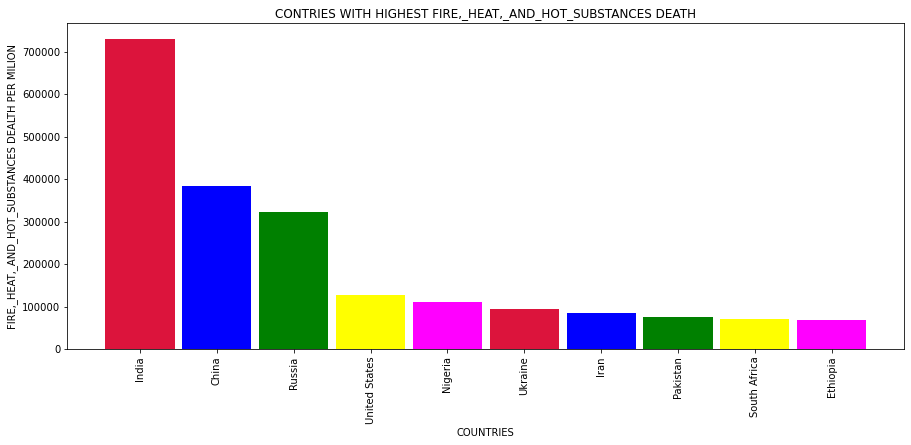

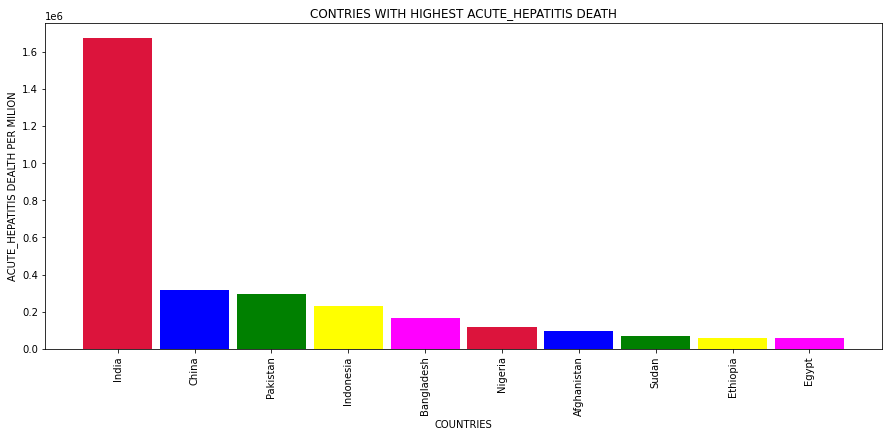

In [16]:

diseases = ['meningitis',
       'alzheimer_s_disease_and_other_dementias', 'parkinson_s_disease',
       'nutritional_deficiencies', 'malaria', 'drowning',
       'interpersonal_violence', 'maternal_disorders', 'hiv_aids',
       'drug_use_disorders', 'tuberculosis', 'cardiovascular_diseases',
       'lower_respiratory_infections', 'neonatal_disorders',
       'alcohol_use_disorders', 'self_harm', 'exposure_to_forces_of_nature',
       'diarrheal_diseases', 'environmental_heat_and_cold_exposure',
       'neoplasms', 'conflict_and_terrorism', 'diabetes_mellitus',
       'chronic_kidney_disease', 'poisonings', 'protein_energy_malnutrition',
       'road_injuries', 'chronic_respiratory_diseases',
       'cirrhosis_and_other_chronic_liver_diseases', 'digestive_diseases',
       'fire,_heat,_and_hot_substances', 'acute_hepatitis']
for x in diseases:
    if df[x].dtypes != 'string':
        #print(x)
        data= df.groupby(['country_territory'])[x].sum().sort_values(ascending = False)[:10]
        plt.figure(figsize=(15,6))
        plt.bar(data=data, x=data.index , height=data.values, width=0.9, color=['crimson','blue','green','yellow','magenta'])
        plt.xticks(rotation='vertical')
        plt.xlabel("COUNTRIES", size = 10)
        plt.ylabel(x.upper()+' DEALTH PER MILION')
        plt.title("CONTRIES WITH HIGHEST "+x.upper()+" DEATH")

# COUNTRY SPECIFIC DISEASE FATALITY FOR SPAN OF 30 YEARS¶

In [17]:
df.columns

Index(['country_territory', 'code', 'year', 'meningitis',
       'alzheimer_s_disease_and_other_dementias', 'parkinson_s_disease',
       'nutritional_deficiencies', 'malaria', 'drowning',
       'interpersonal_violence', 'maternal_disorders', 'hiv_aids',
       'drug_use_disorders', 'tuberculosis', 'cardiovascular_diseases',
       'lower_respiratory_infections', 'neonatal_disorders',
       'alcohol_use_disorders', 'self_harm', 'exposure_to_forces_of_nature',
       'diarrheal_diseases', 'environmental_heat_and_cold_exposure',
       'neoplasms', 'conflict_and_terrorism', 'diabetes_mellitus',
       'chronic_kidney_disease', 'poisonings', 'protein_energy_malnutrition',
       'road_injuries', 'chronic_respiratory_diseases',
       'cirrhosis_and_other_chronic_liver_diseases', 'digestive_diseases',
       'fire,_heat,_and_hot_substances', 'acute_hepatitis'],
      dtype='object')

In [18]:
#we Drop year column as it is not required 
df1=df.drop('year',axis=1).groupby('country_territory').sum().reset_index()

In [19]:
df1

country_territory  meningitis  alzheimer_s_disease_and_other_dementias  \
0         Afghanistan       78666                                    41998   
1             Albania        1323                                    16549   
2             Algeria       15685                                    86914   
3      American Samoa          30                                      143   
4             Andorra           0                                      614   
..                ...         ...                                      ...   
198         Venezuela       11615                                   108735   
199           Vietnam       38559                                   369363   
200             Yemen       21095                                    31045   
201            Zambia       98886                                    13473   
202          Zimbabwe       41238                                    20017   

     parkinson_s_disease  nutritional_deficiencies  malaria  drowning  \
0                  13397                     71453    13924     56536   
1                   4491                       569        0      2397   
2                  22943                      7138       70     24273   
3                     69                        60        0       120   
4                    137                         0        0         0   
..                   ...                       ...      ...       ...   
198                18573                     22554     3726     20273   
199                83322                     48613    17311    214356   
200                 7188                     68939   143463     27994   
201                 4054                     95913   205529     12809   
202                 5764                     66723   118728     18169   

     interpersonal_violence  maternal_disorders  hiv_aids  ...  \
0                    108228              129621      4282  ...   
1                      5242                 246        57  ...   
2                     16702               29475      6101  ...   
3                       101                  30        15  ...   
4                        15                   0        85  ...   
..                      ...                 ...       ...  ...   
198                  266071               12739     46090  ...   
199                   47981               13167    148838  ...   
200                   17918               53611      6276  ...   
201                   30065               28395   1175563  ...   
202                   32741               29802   1836042  ...   

     diabetes_mellitus  chronic_kidney_disease  poisonings  \
0                93207                  134676     14530.0   
1                 4055                    7636       500.0   
2                89035                  154666     12337.0   
3                  970                     512         0.0   
4                  198                     292         0.0   
..                 ...                     ...         ...   
198             175790                  161667      2607.0   
199             544222                  396874     34681.0   
200              30812                   52119     12561.0   
201              54098                   41751      9056.0   
202              71175                   49952      9113.0   

     protein_energy_malnutrition  road_injuries  chronic_respiratory_diseases  \
0                          70163         208331                        209857   
1                            526           8522                         22632   
2                           6407         369395                        168453   
3                             60            164                           612   
4                              0            259                           838   
..                           ...            ...                           ...   
198                        21347         175036                        122198   
199 

In [20]:
df1.index

RangeIndex(start=0, stop=203, step=1)

C:\Users\Atharv\AppData\Local\Temp\ipykernel_8084\1968765364.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,6))


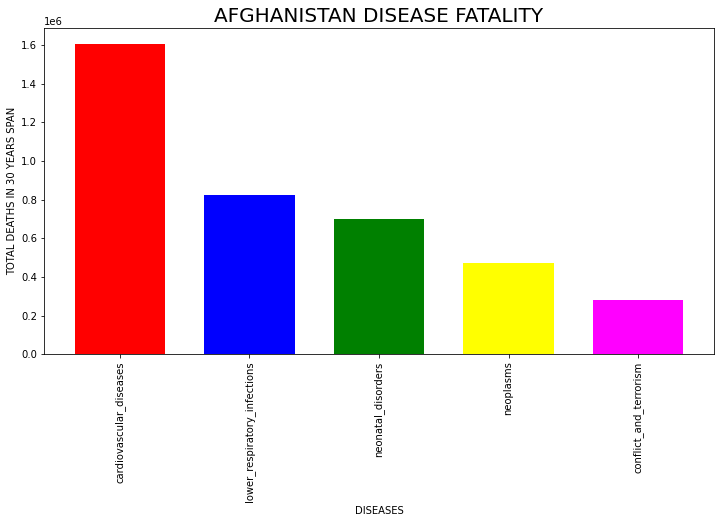

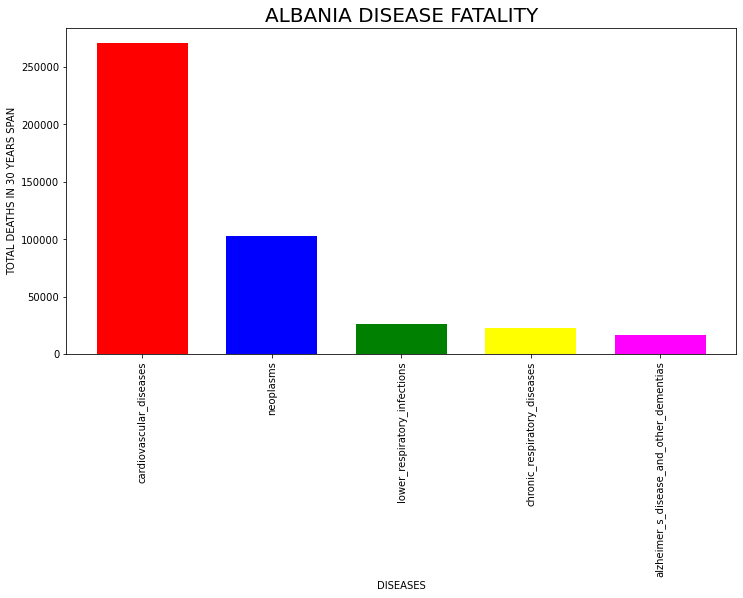

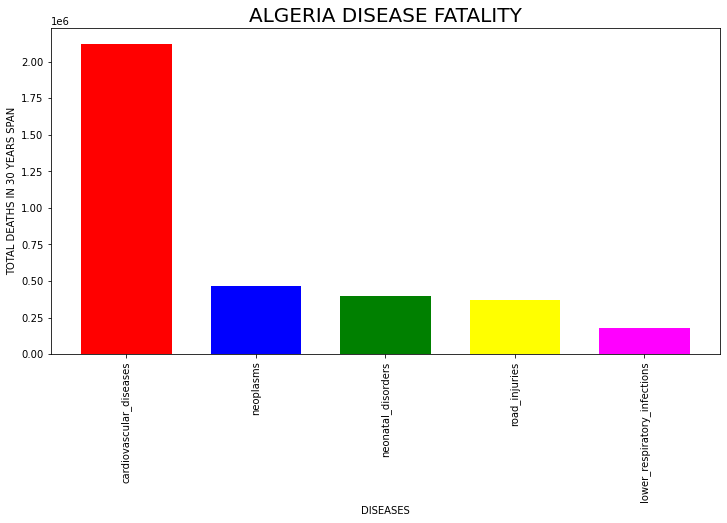

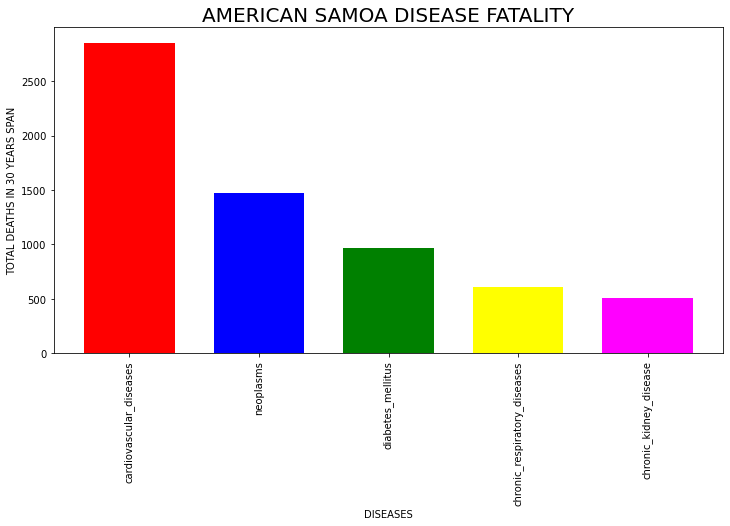

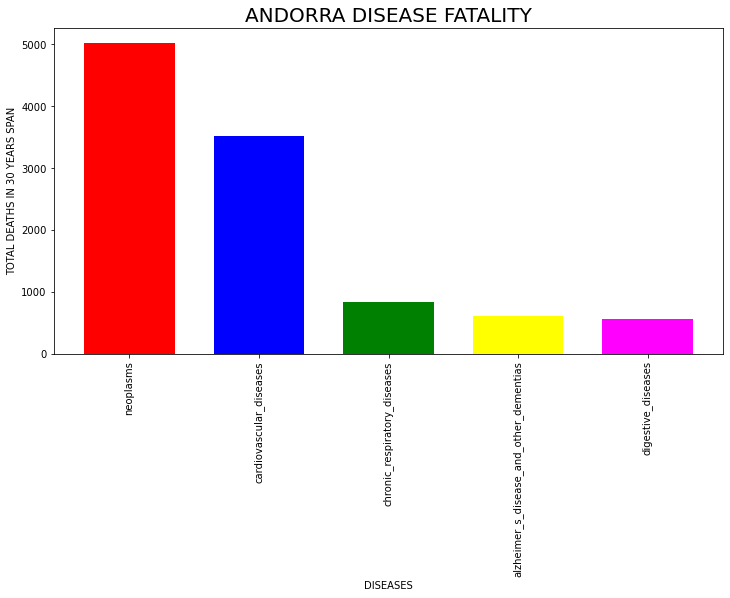

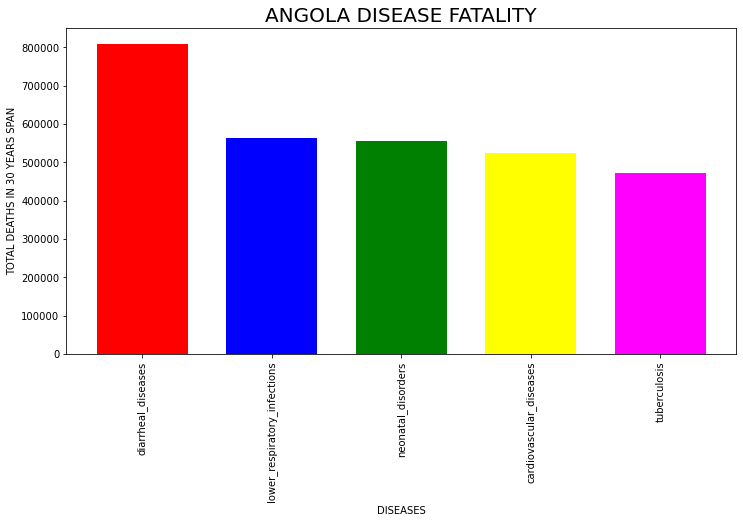

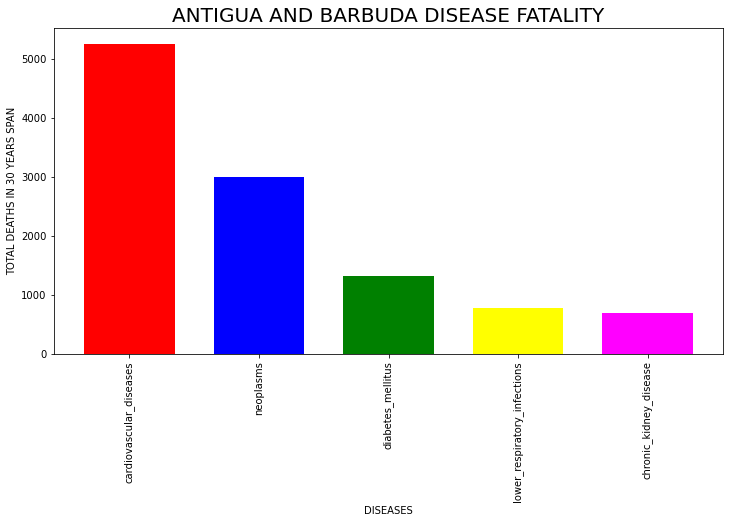

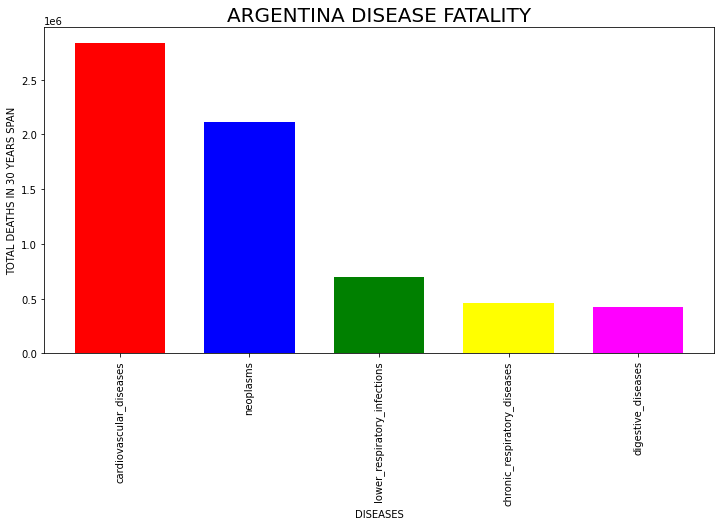

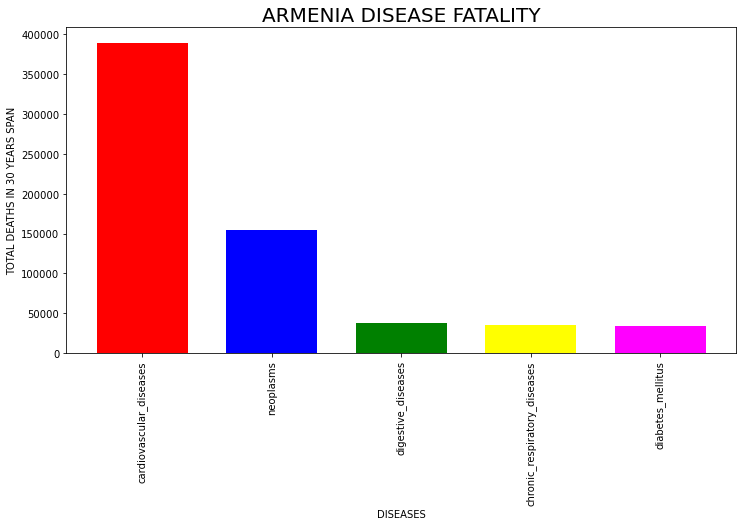

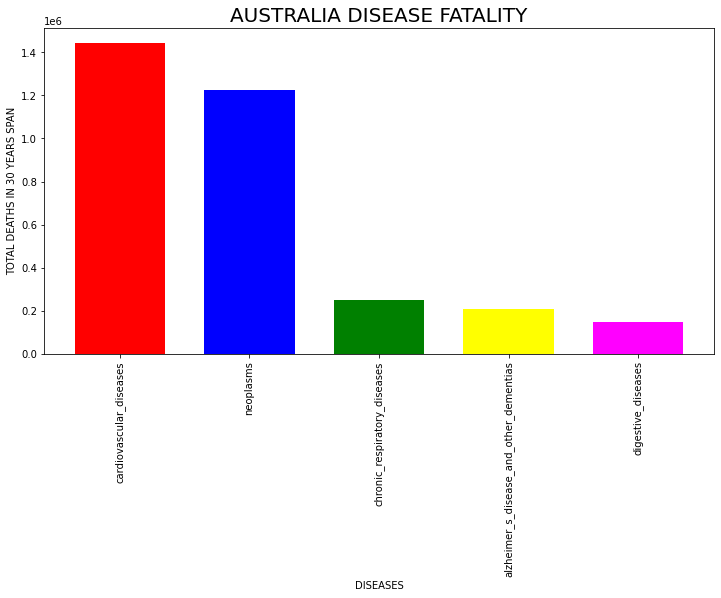

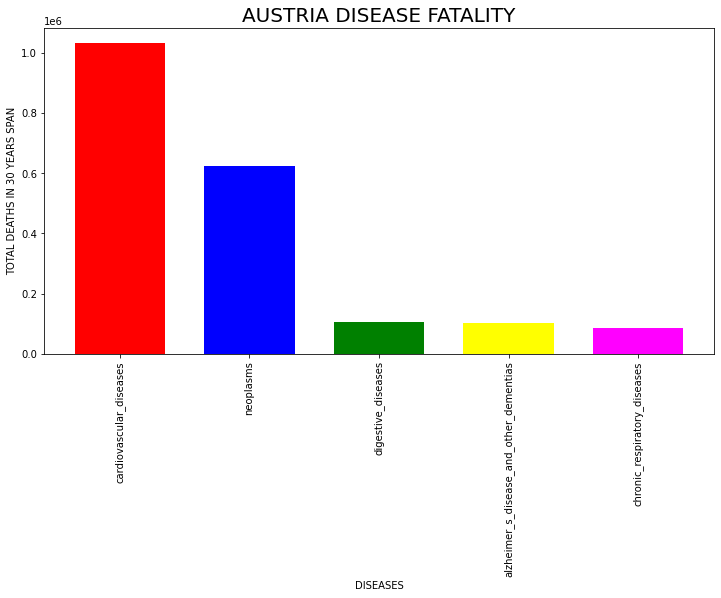

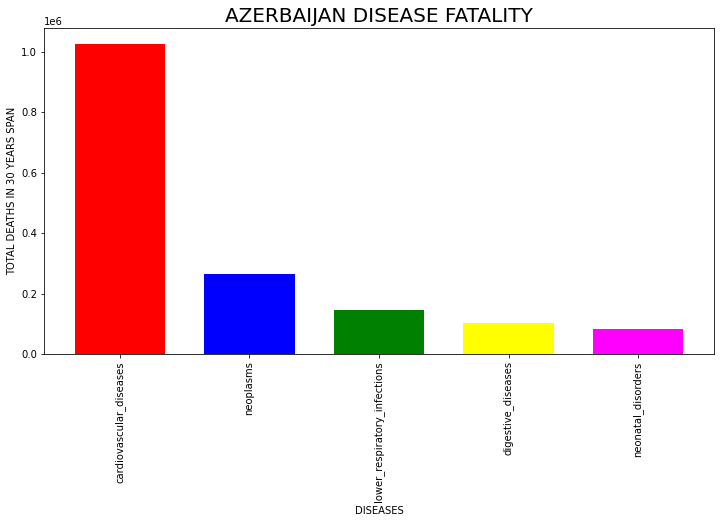

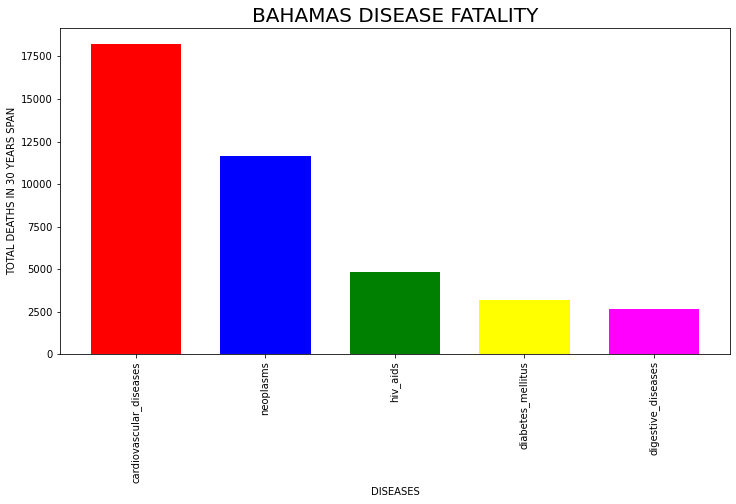

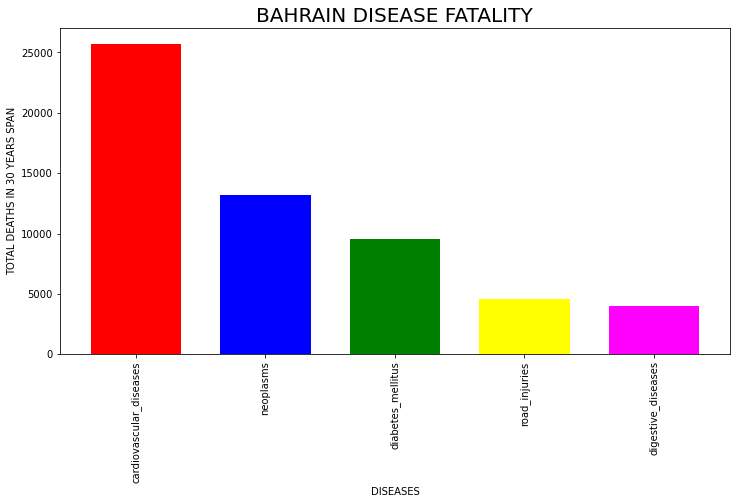

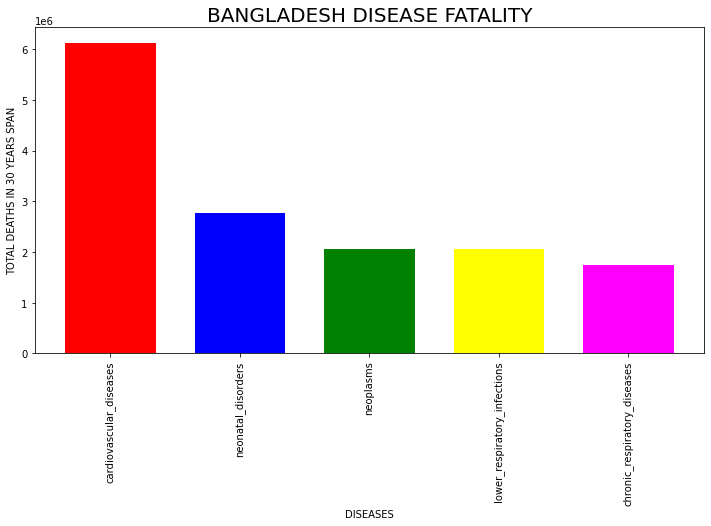

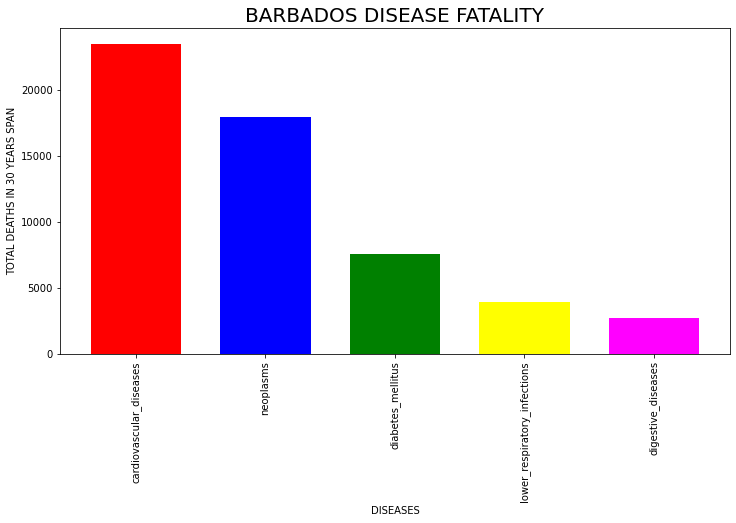

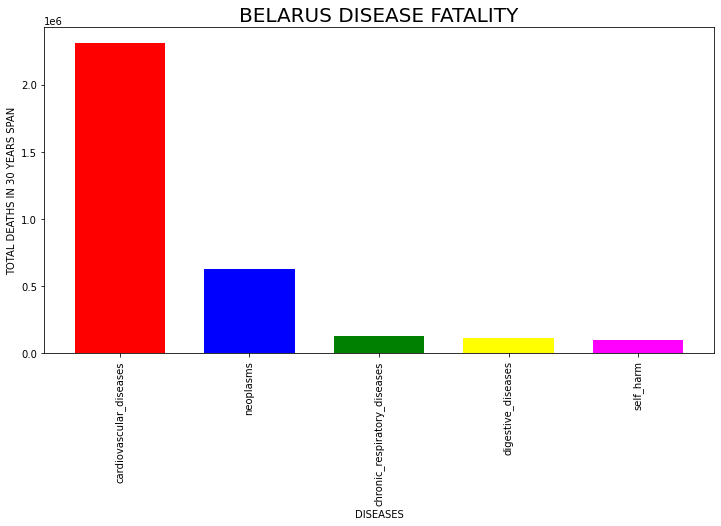

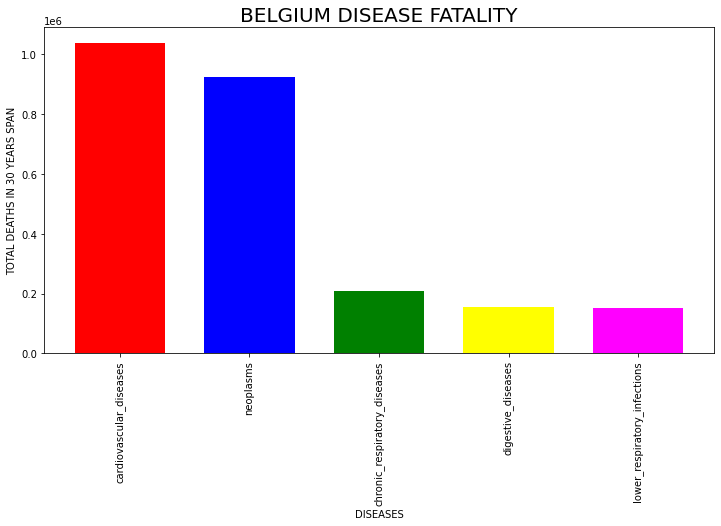

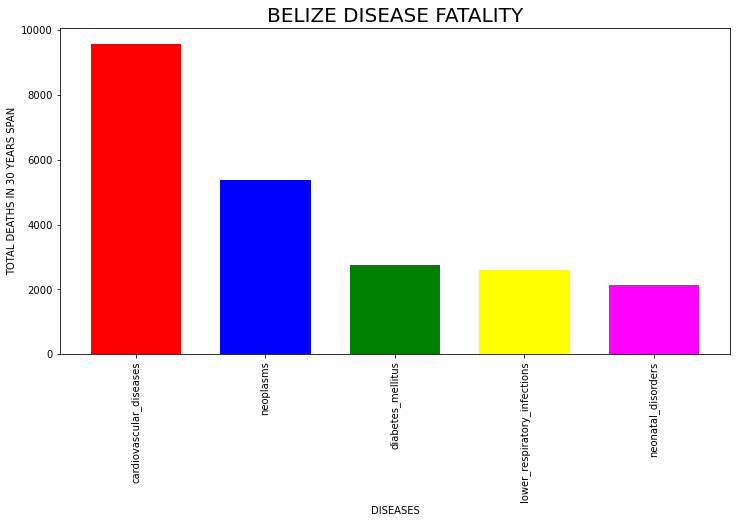

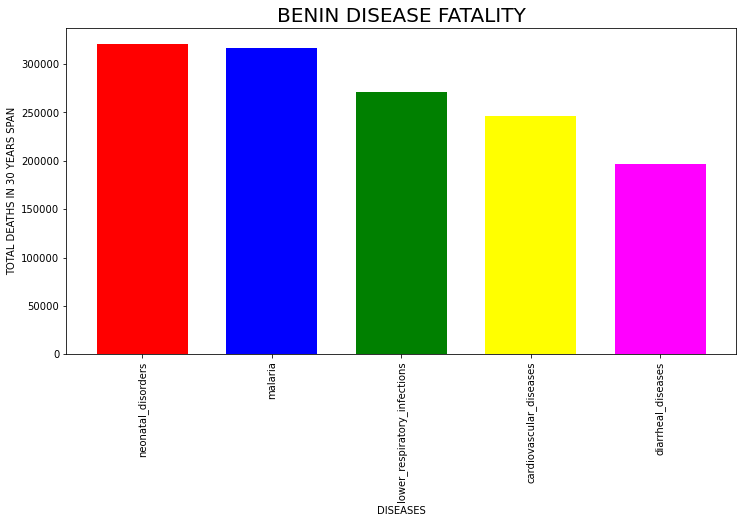

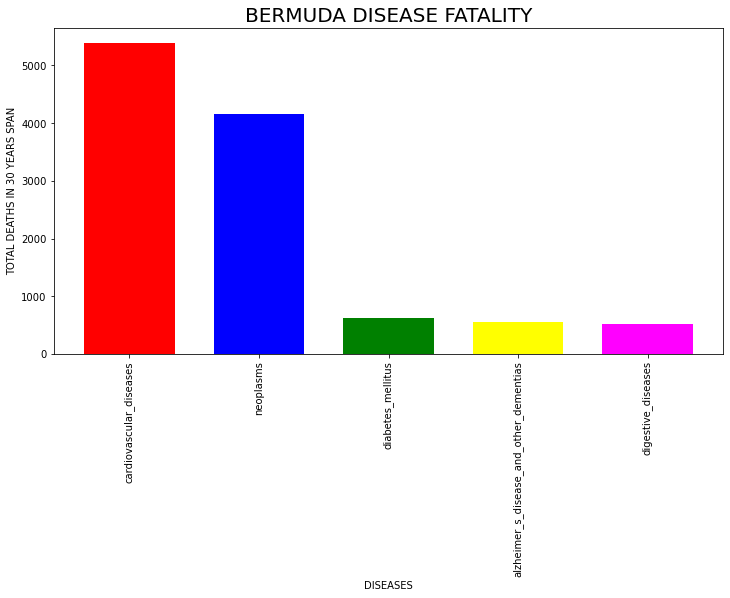

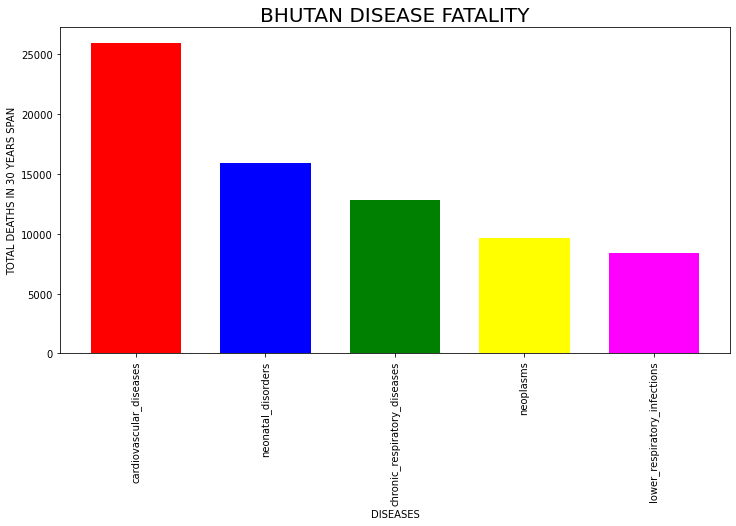

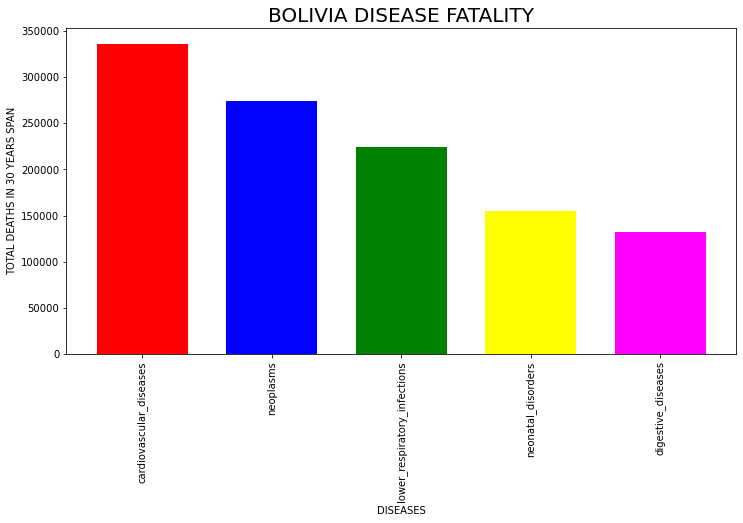

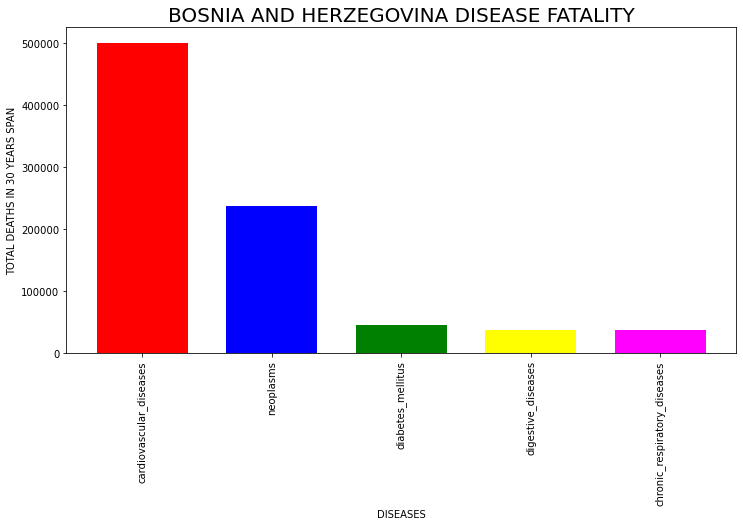

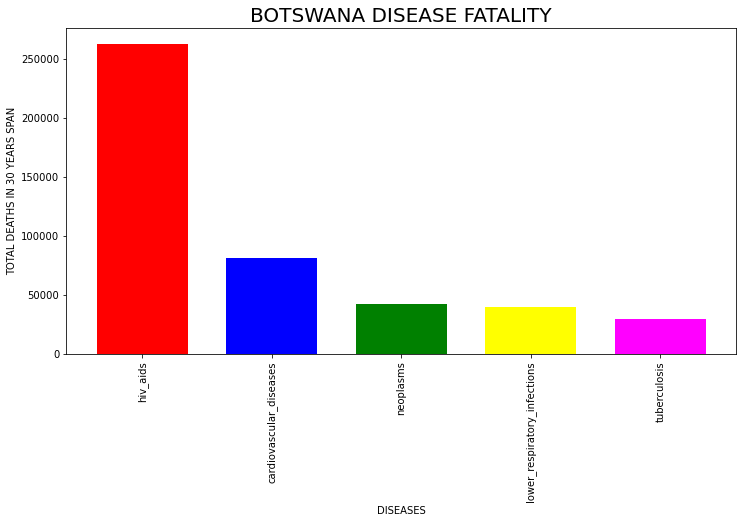

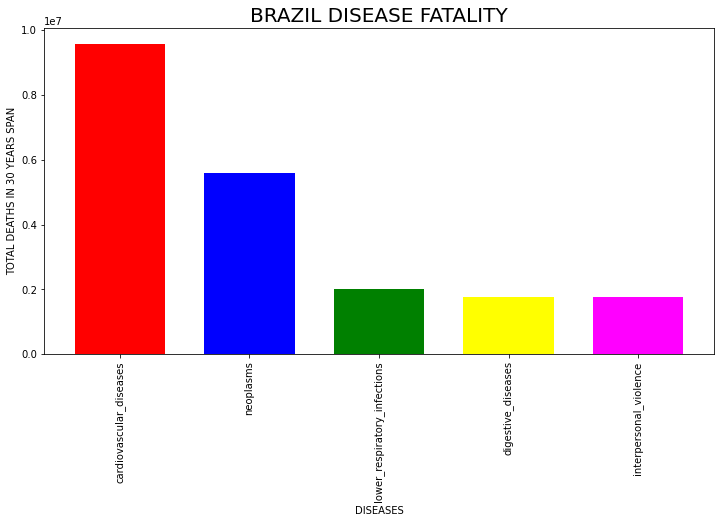

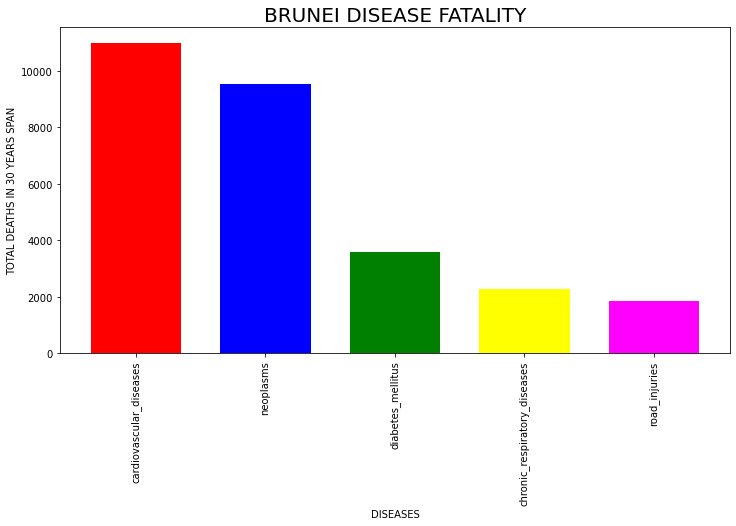

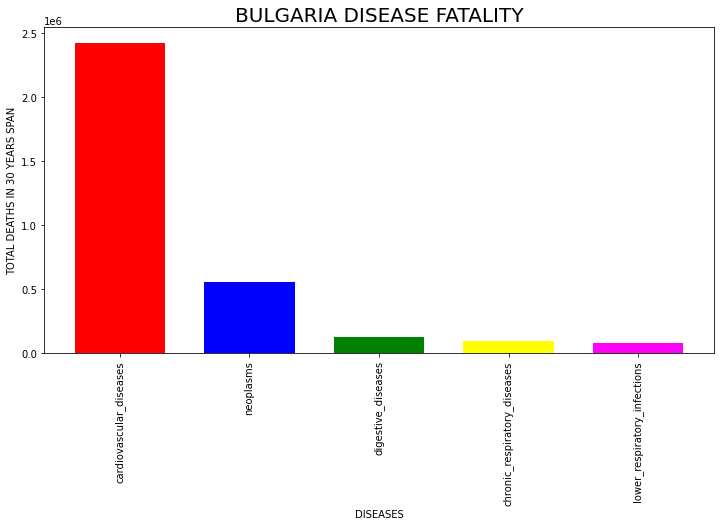

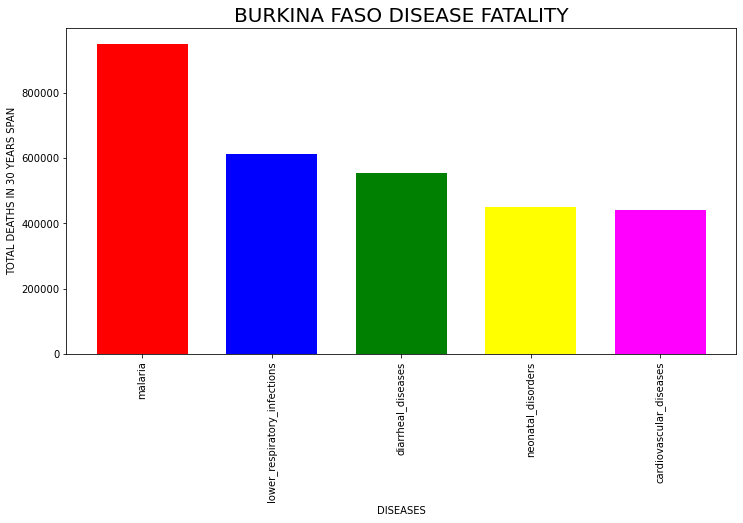

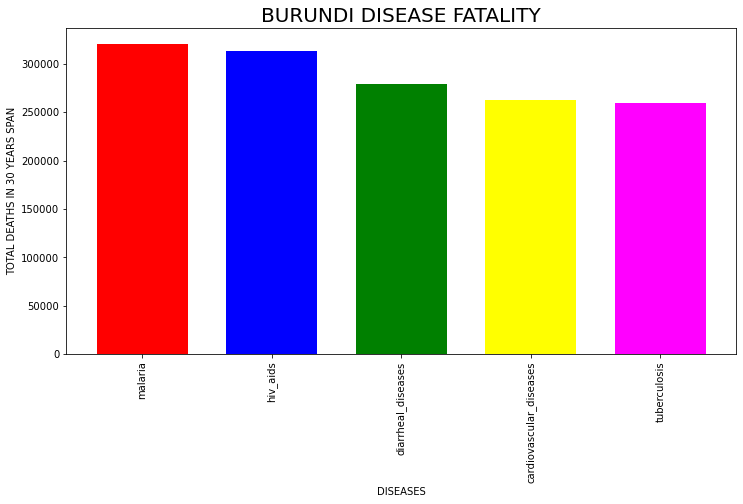

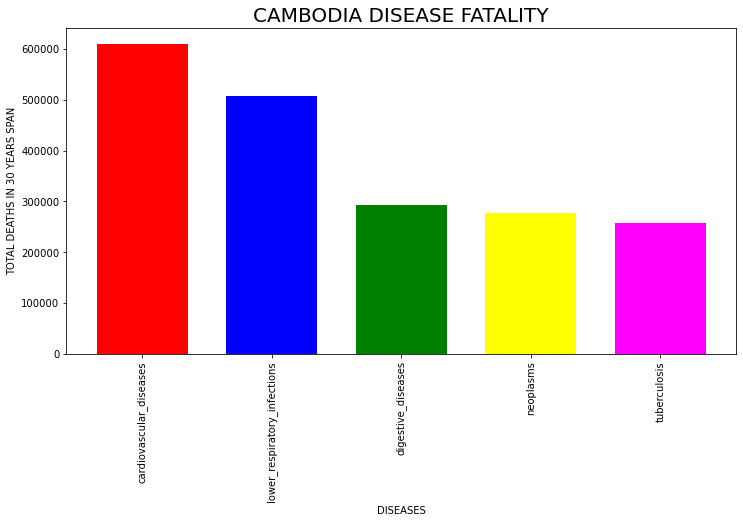

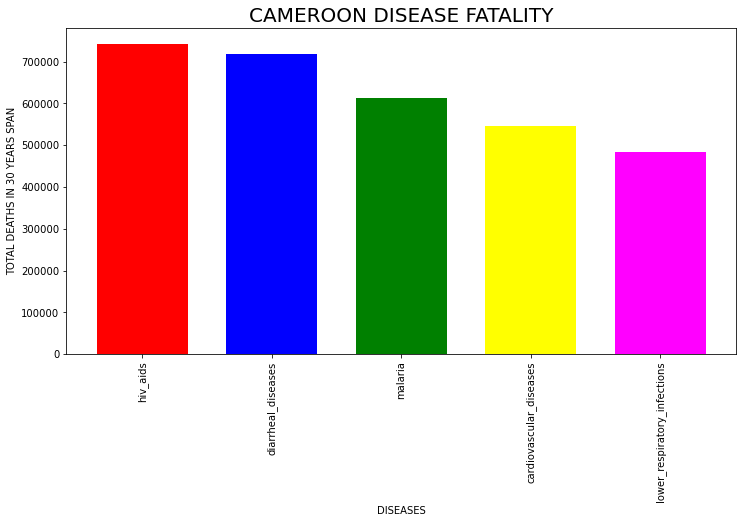

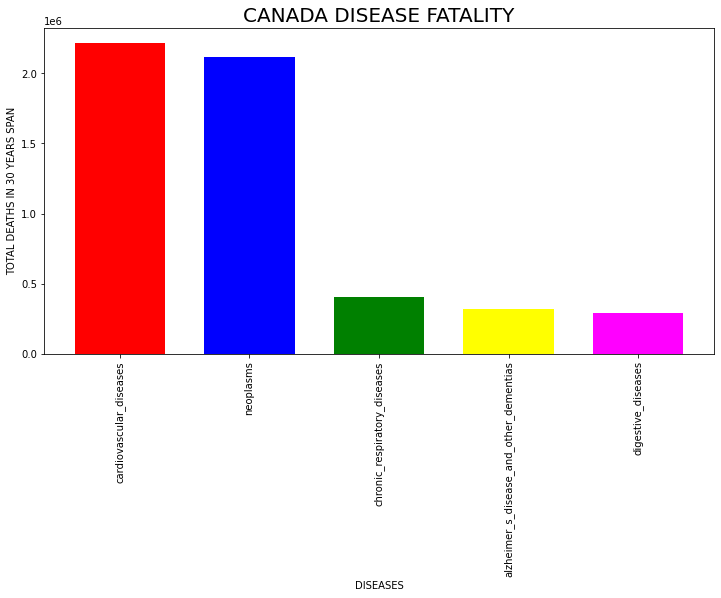

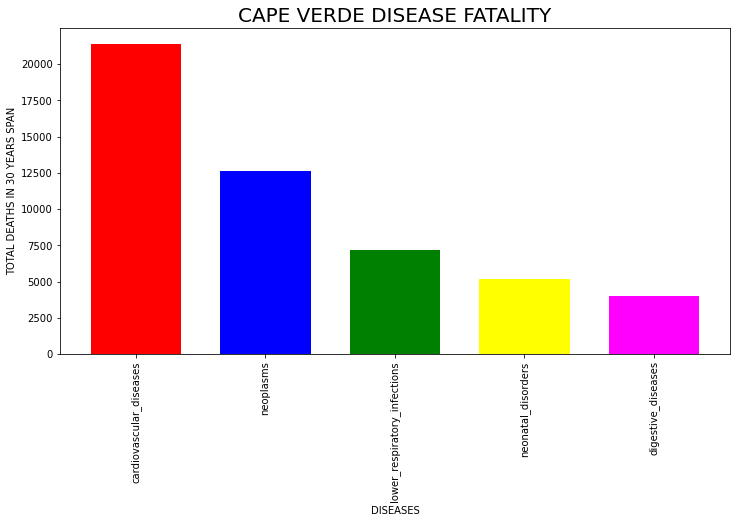

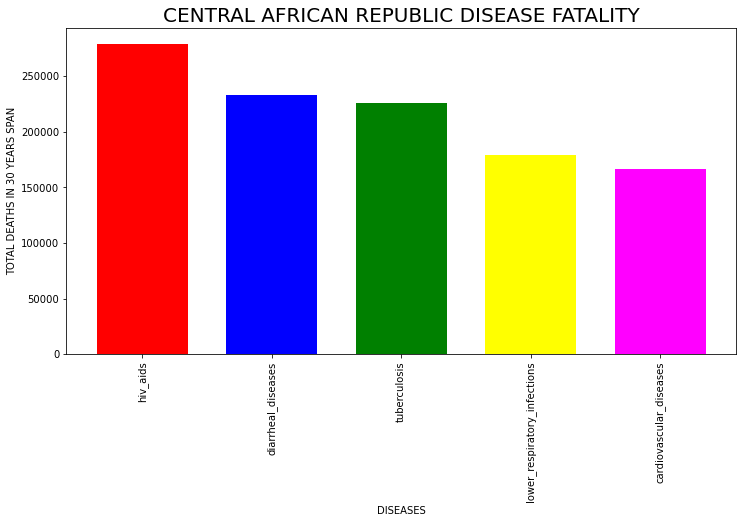

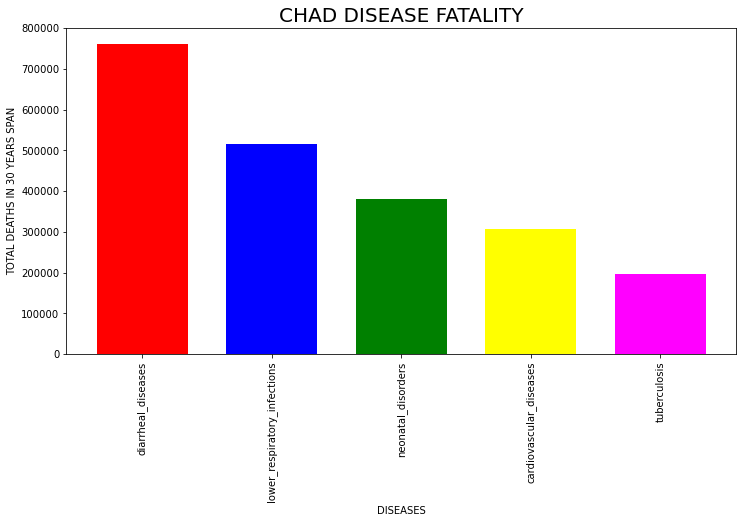

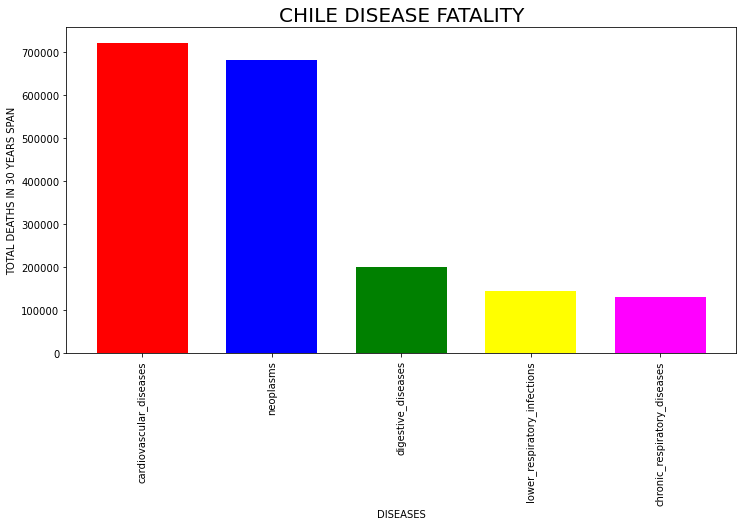

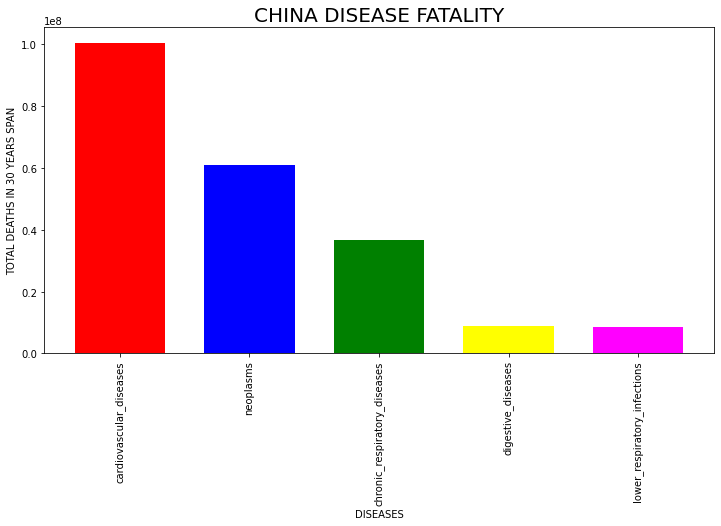

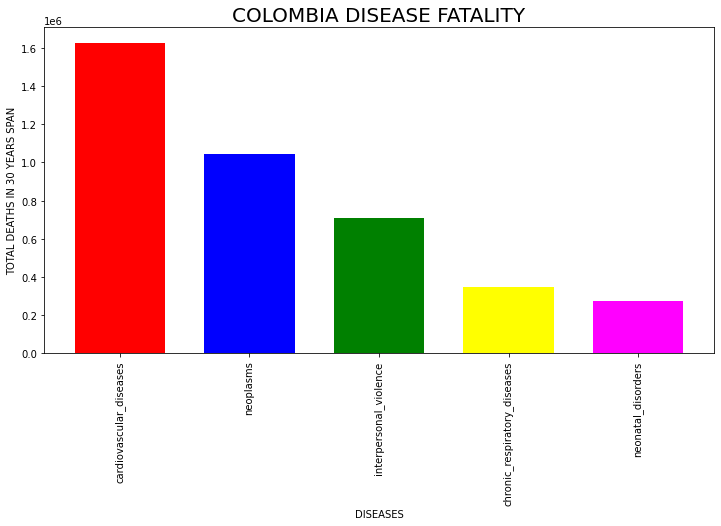

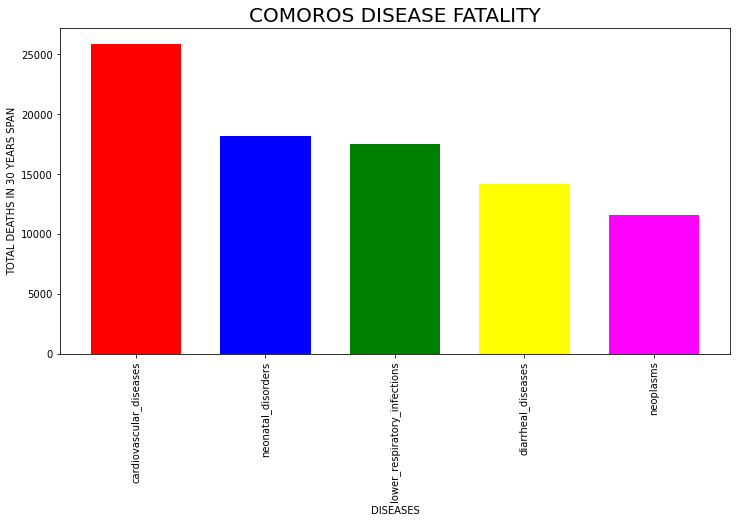

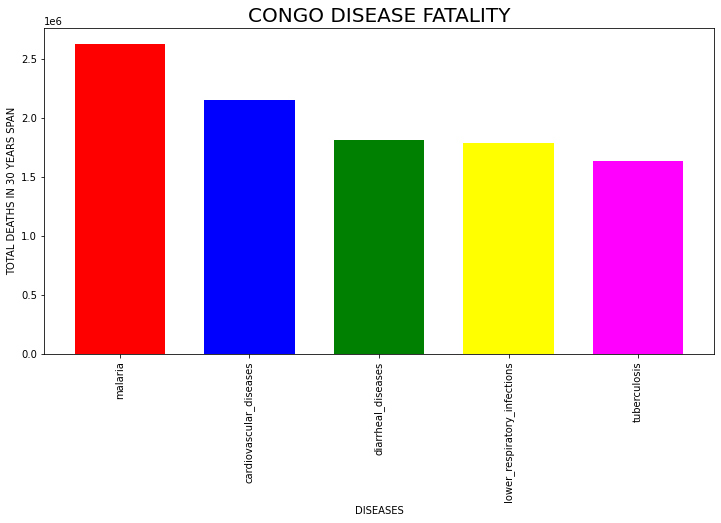

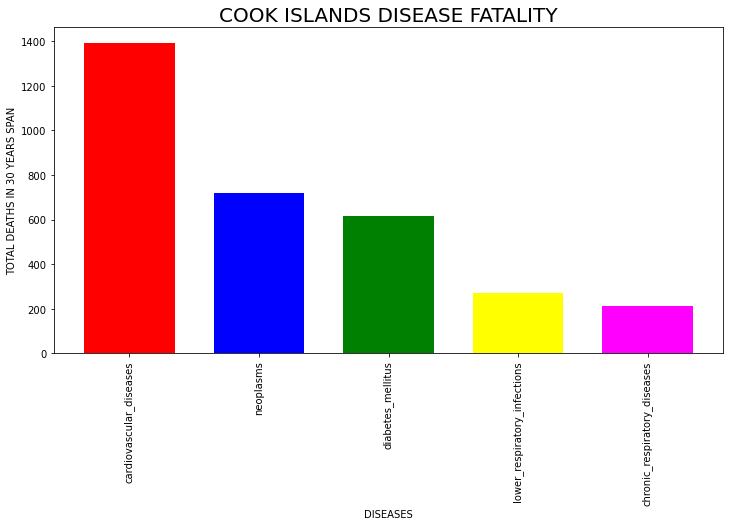

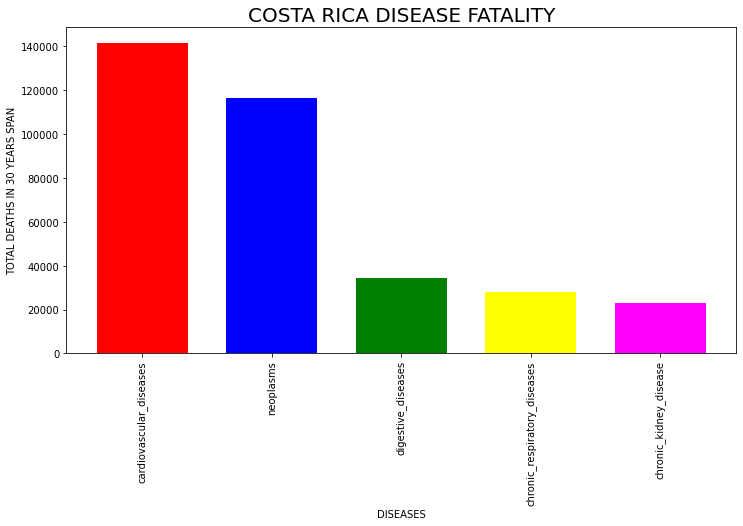

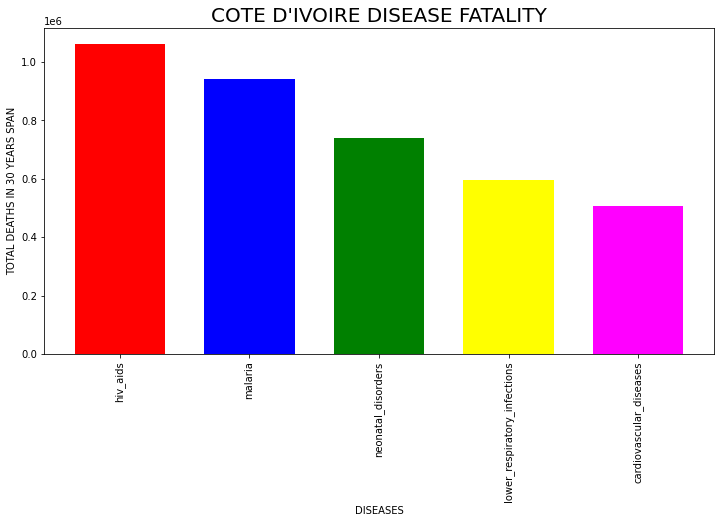

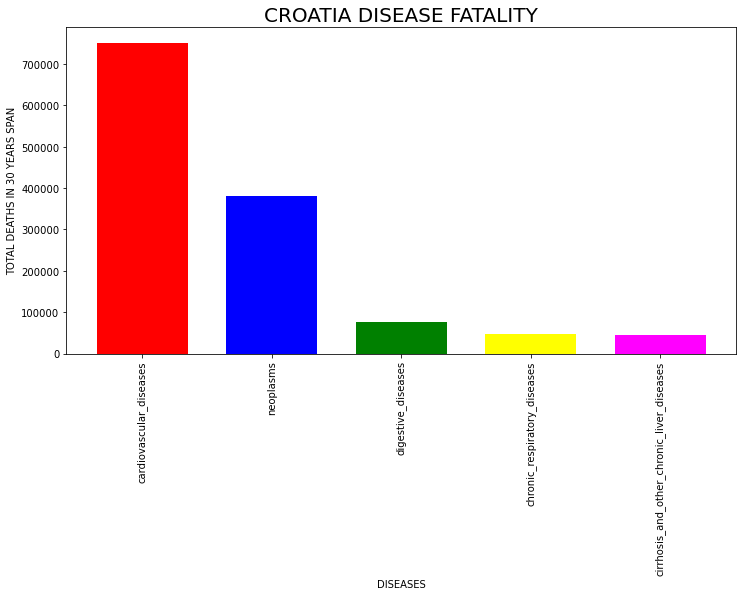

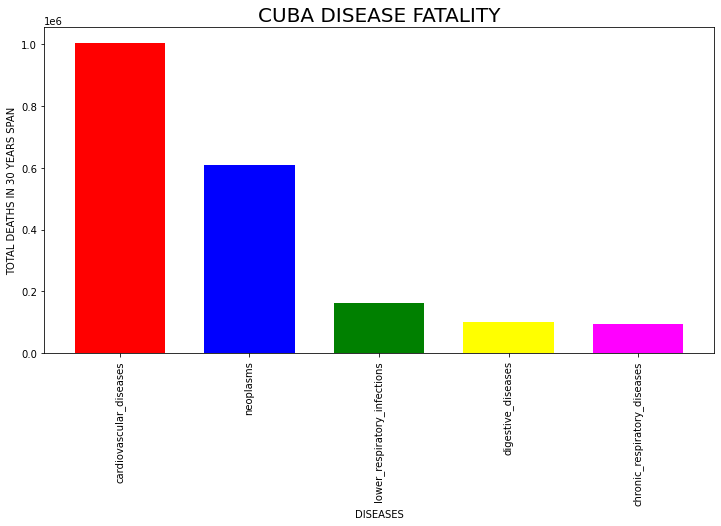

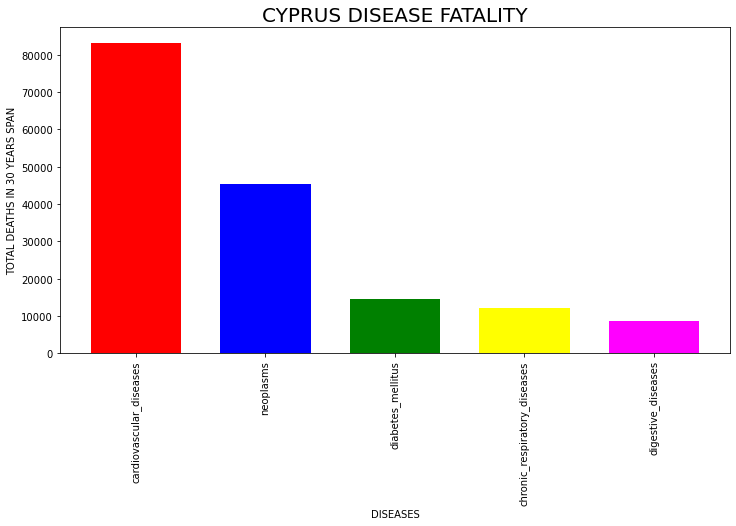

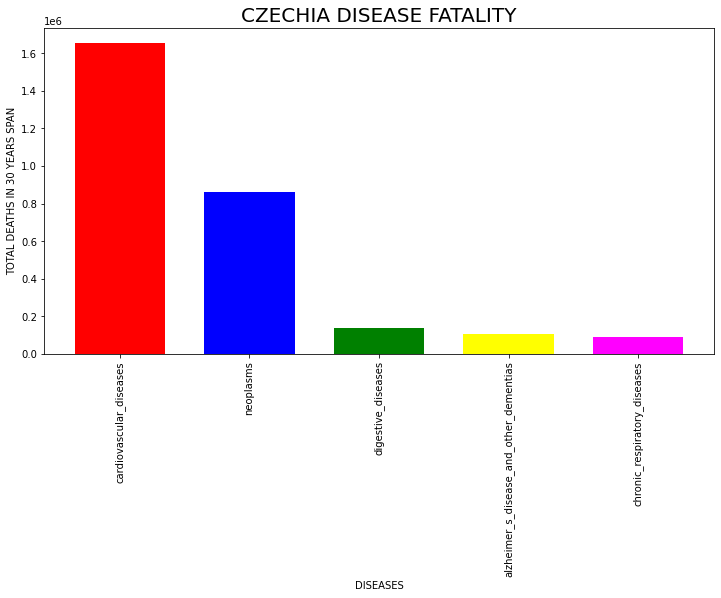

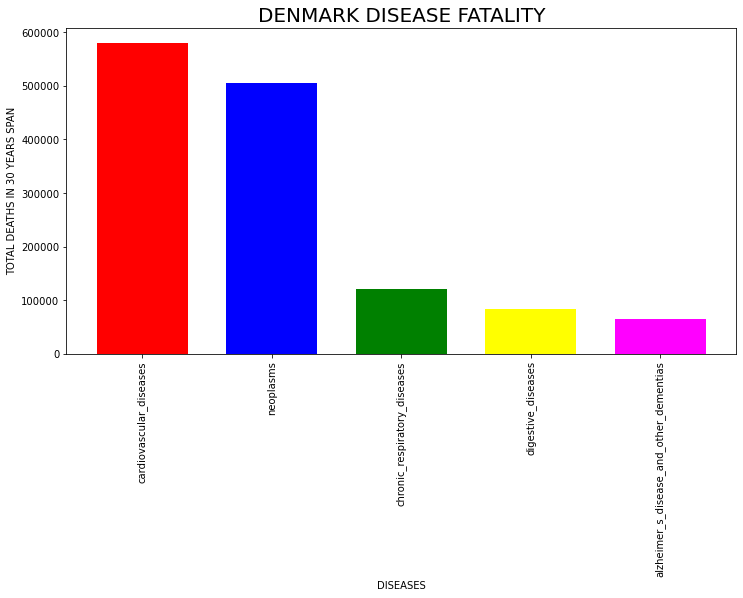

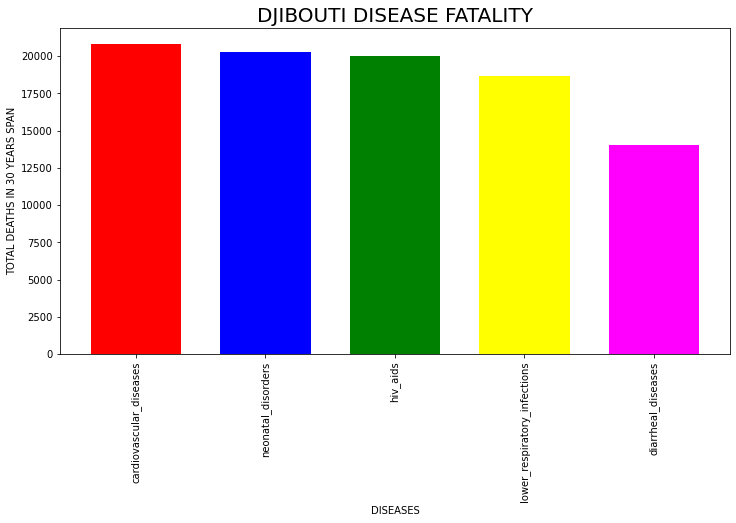

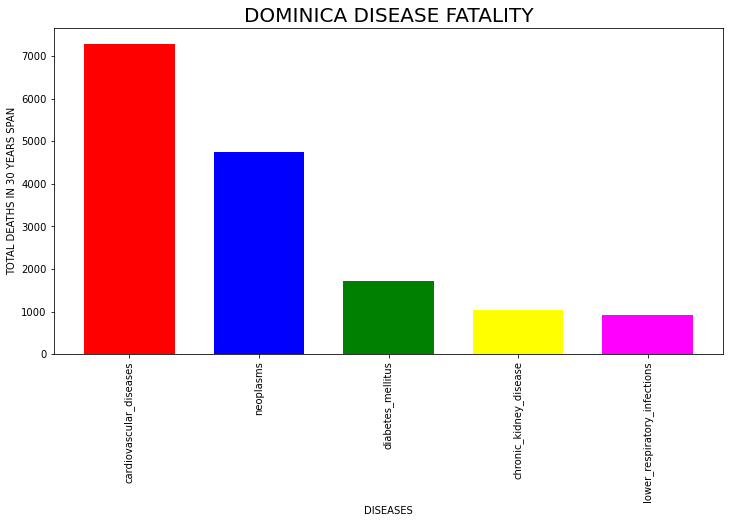

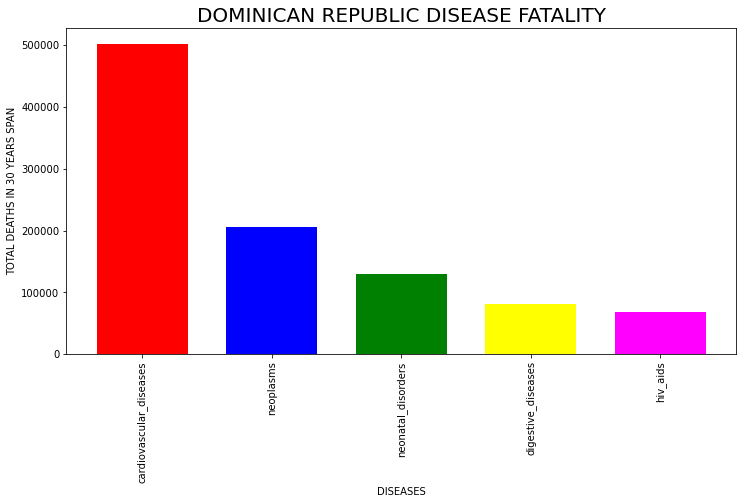

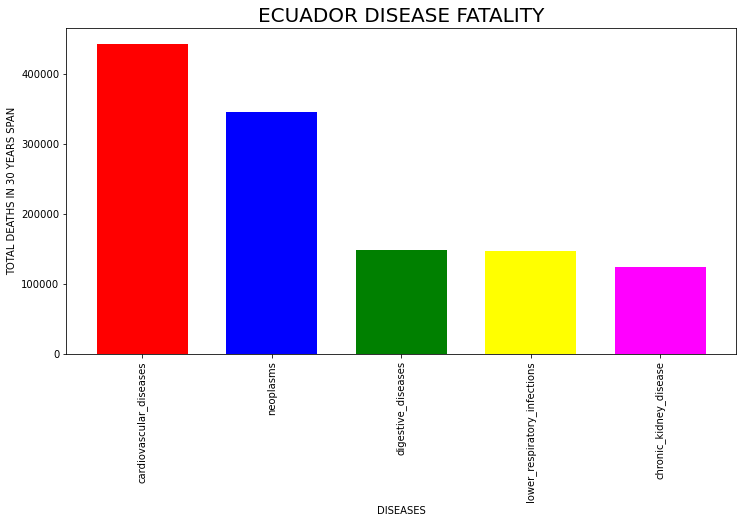

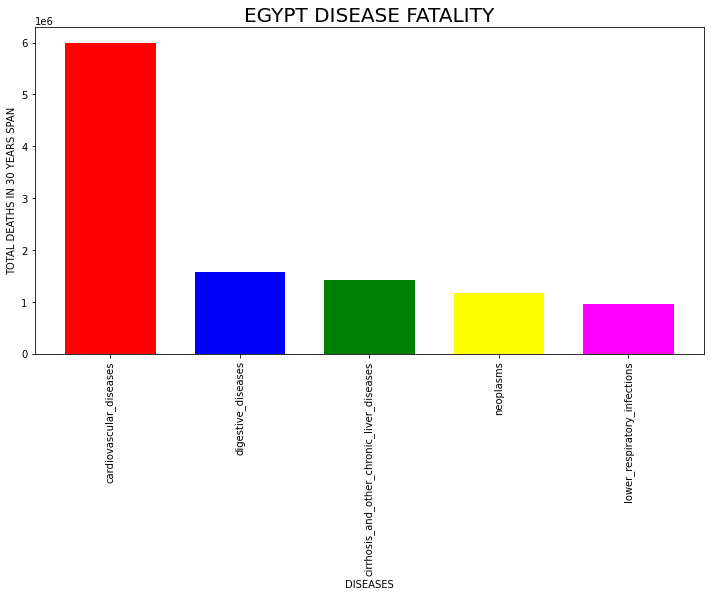

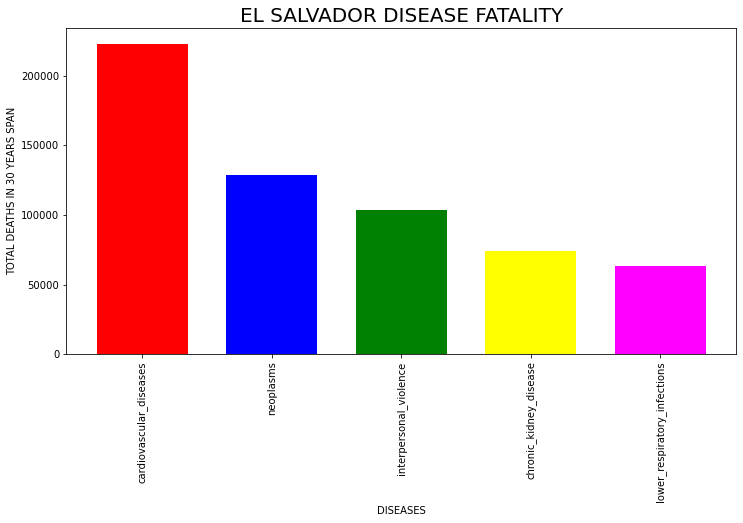

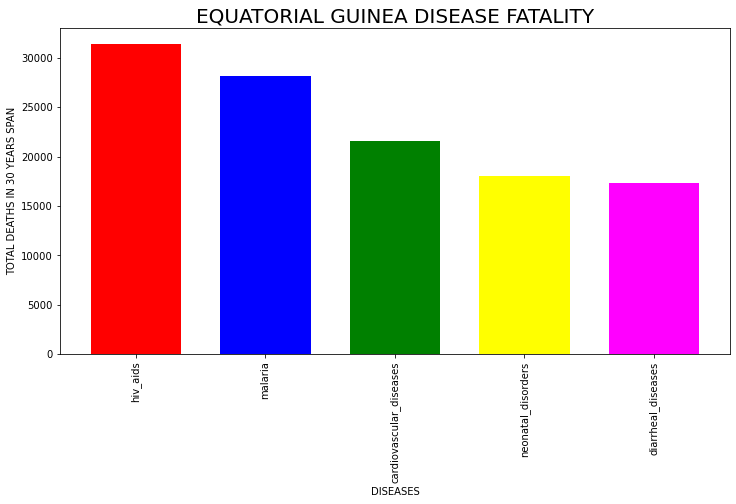

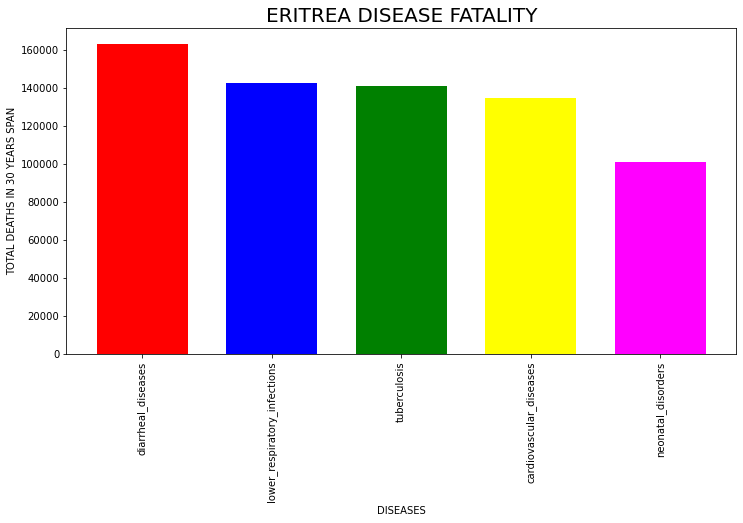

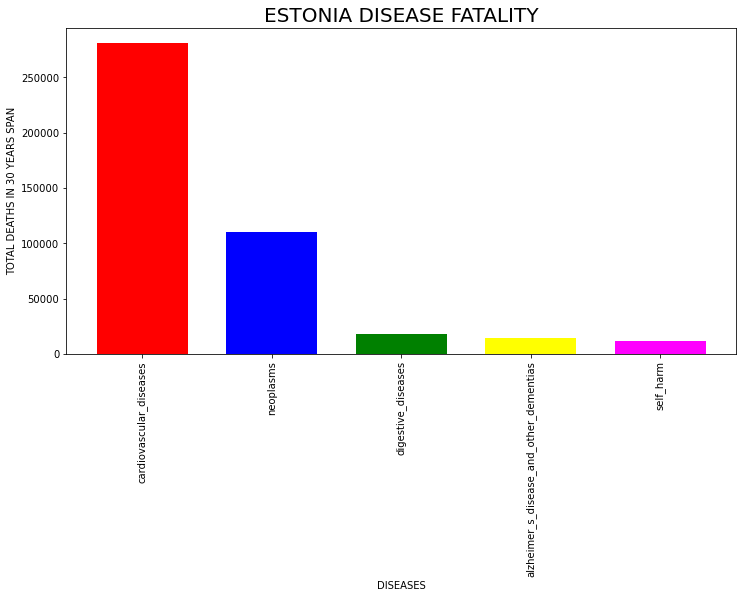

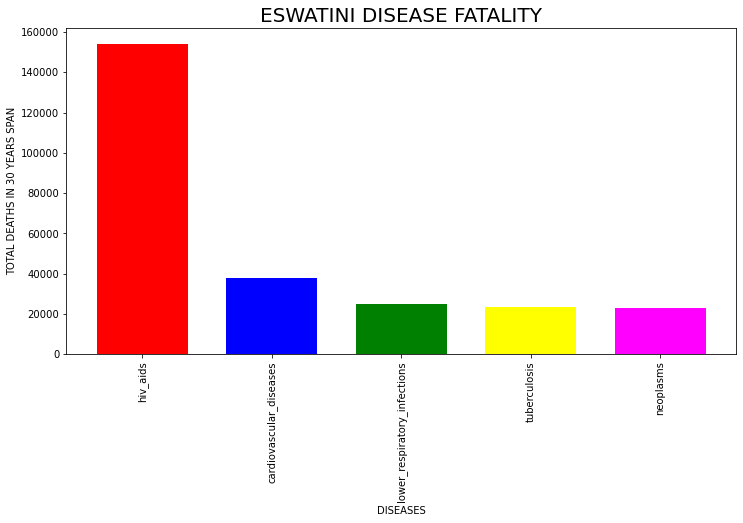

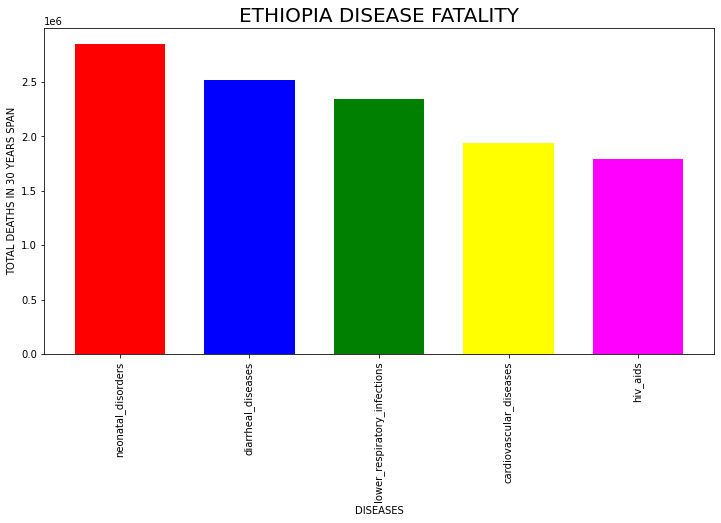

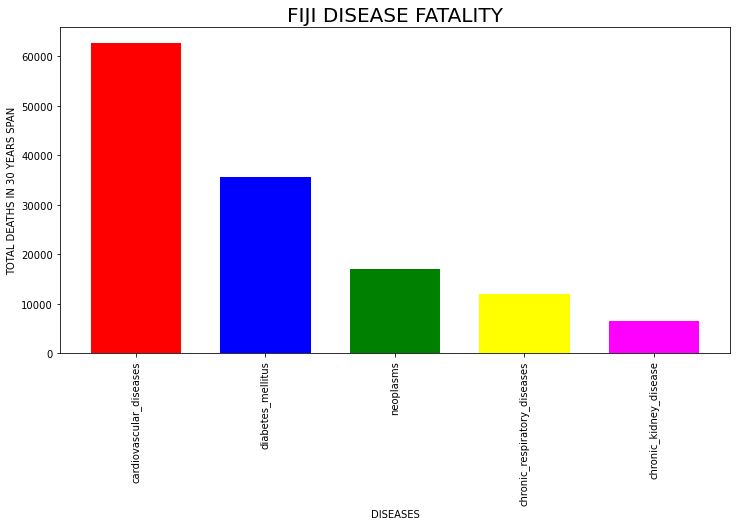

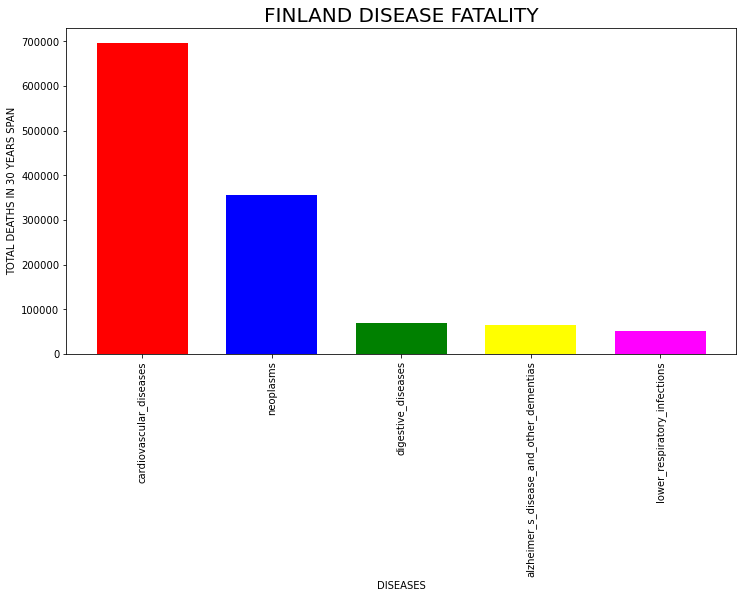

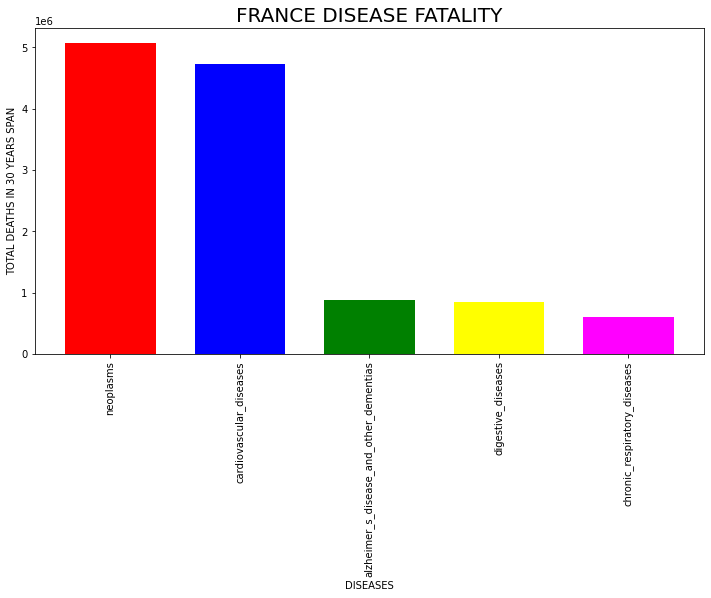

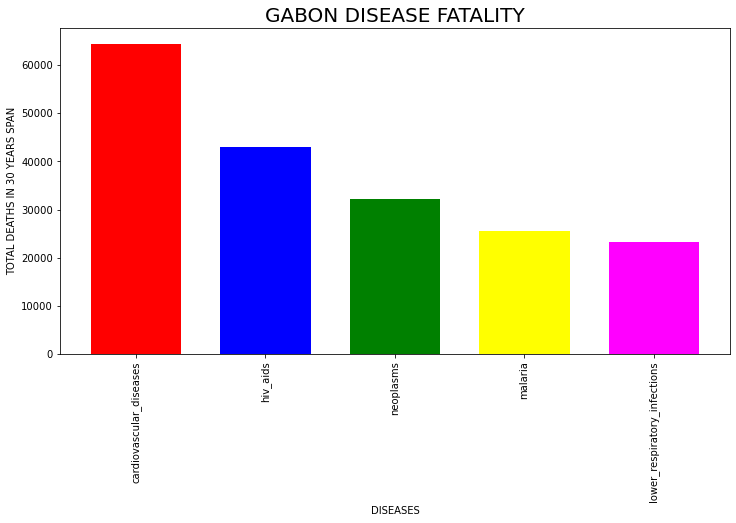

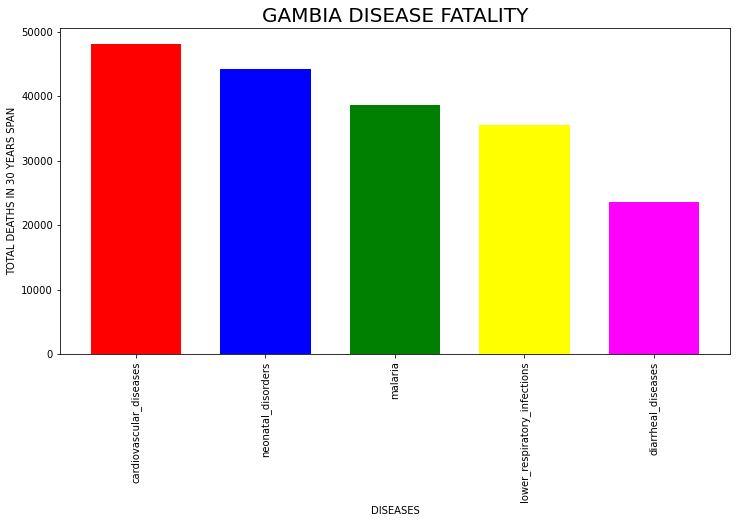

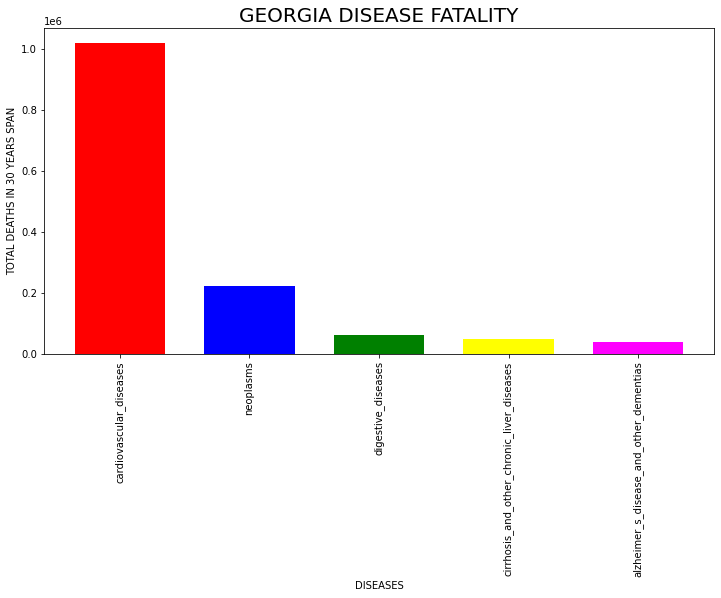

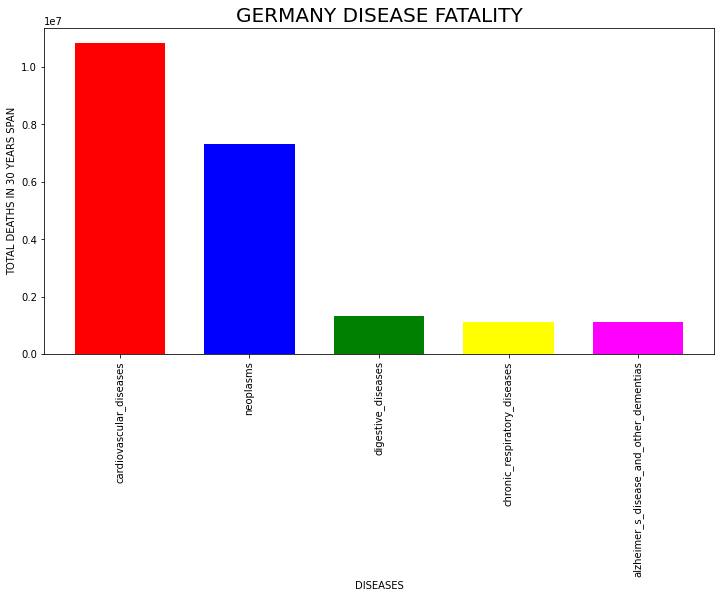

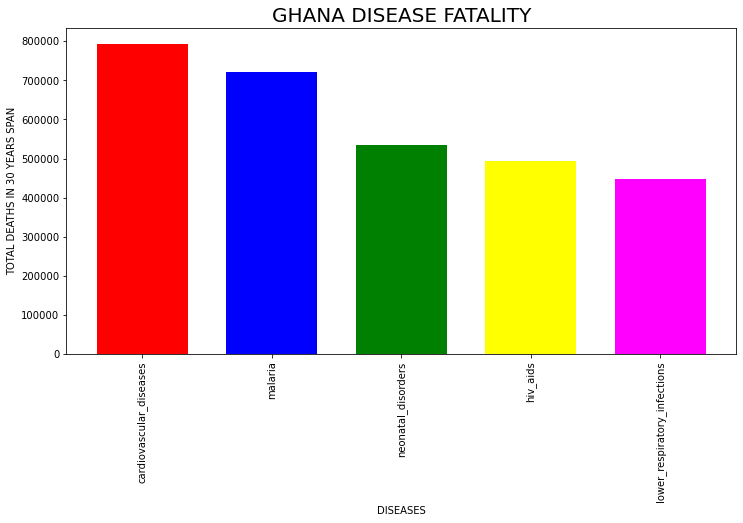

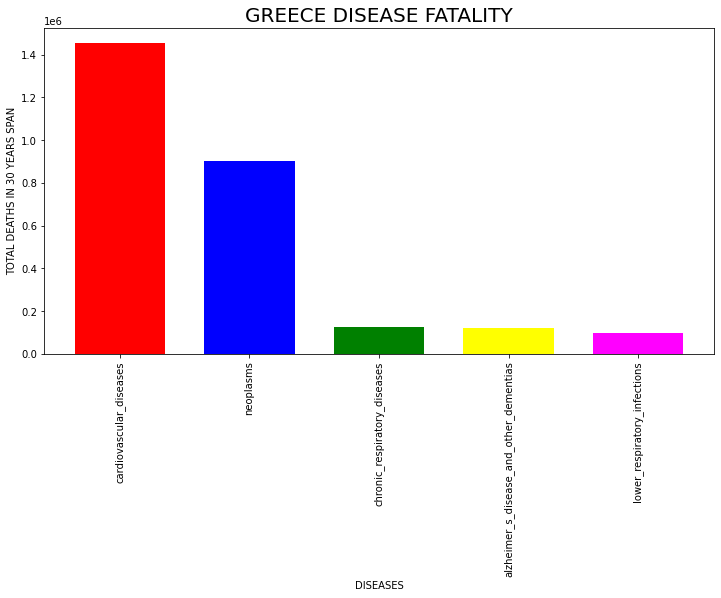

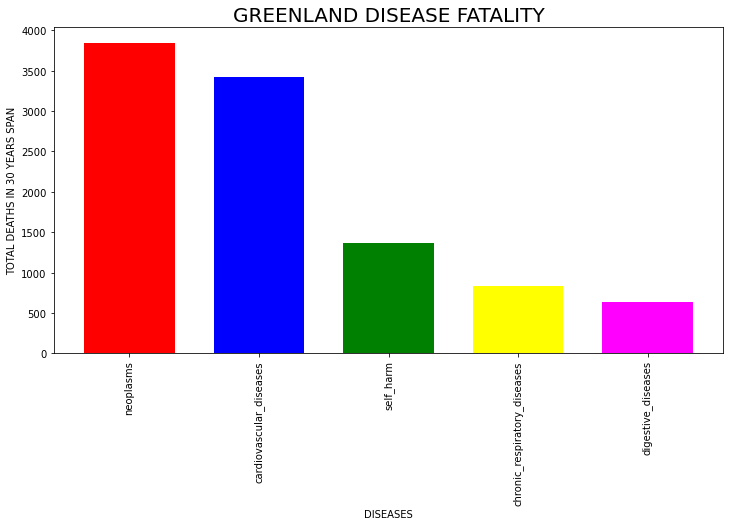

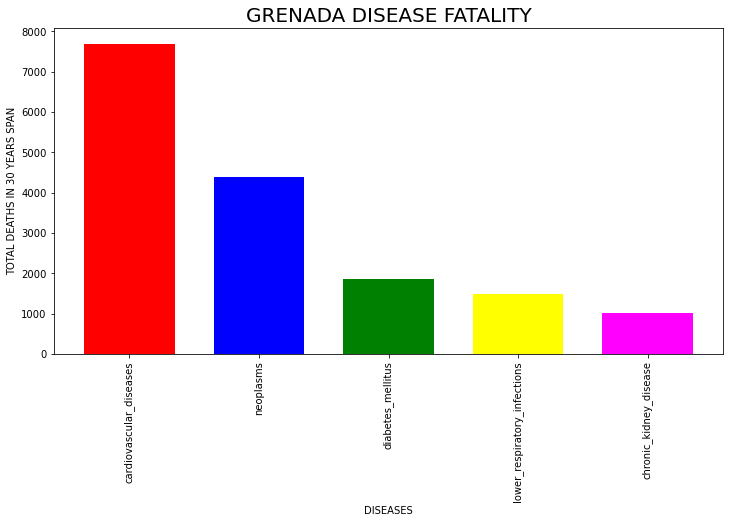

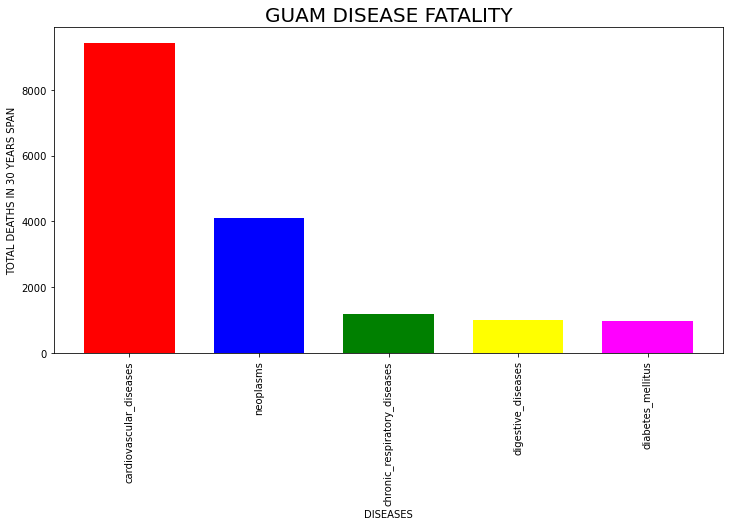

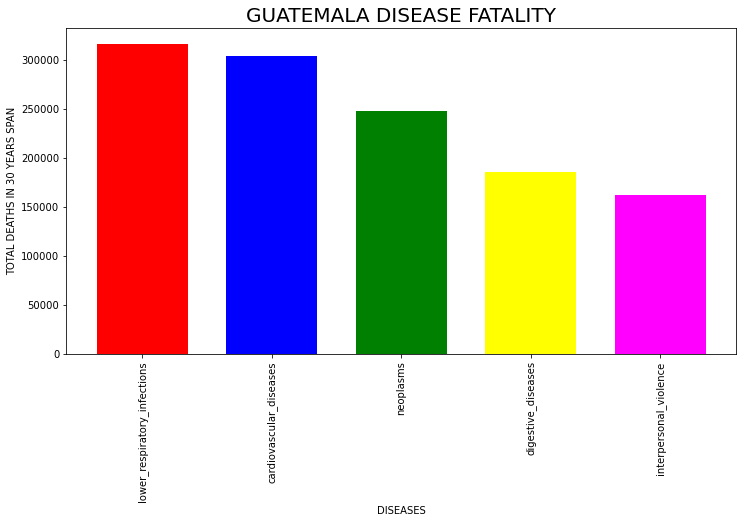

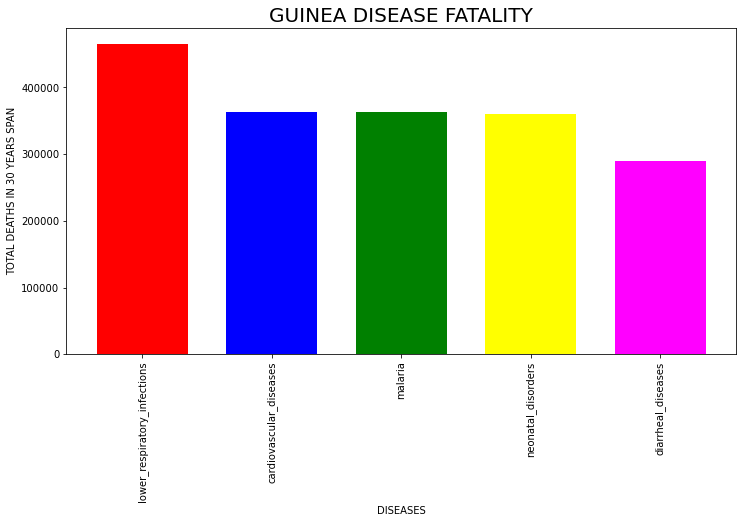

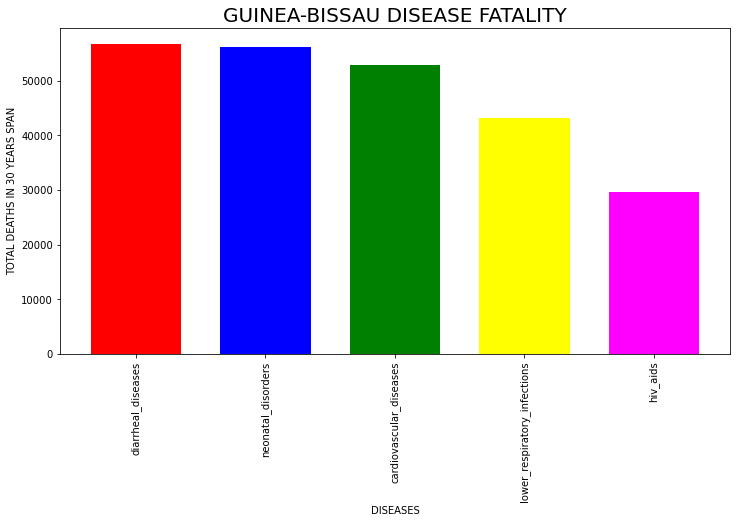

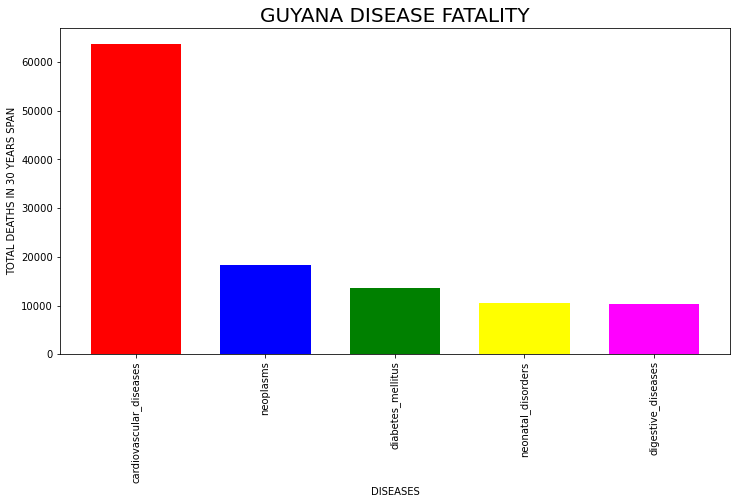

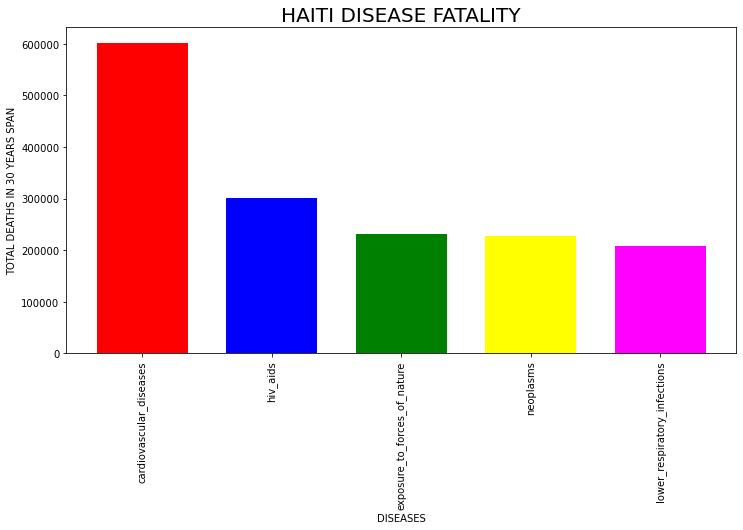

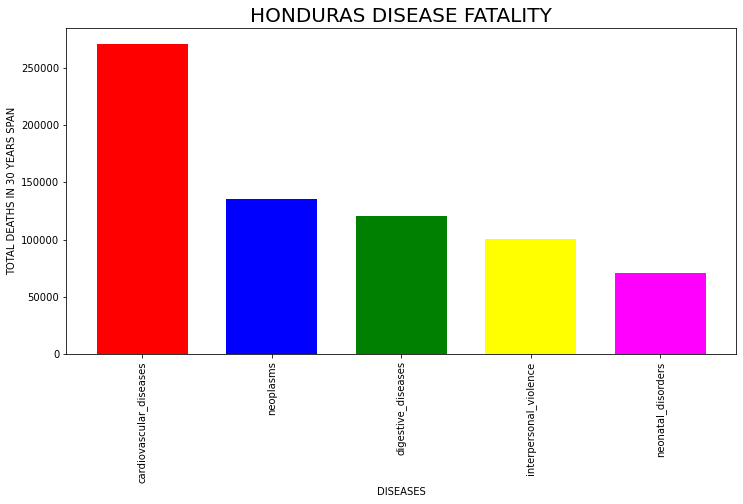

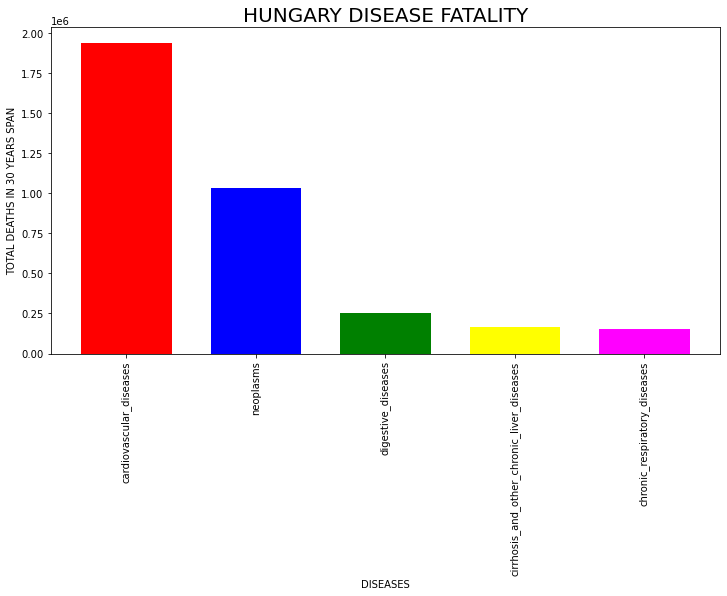

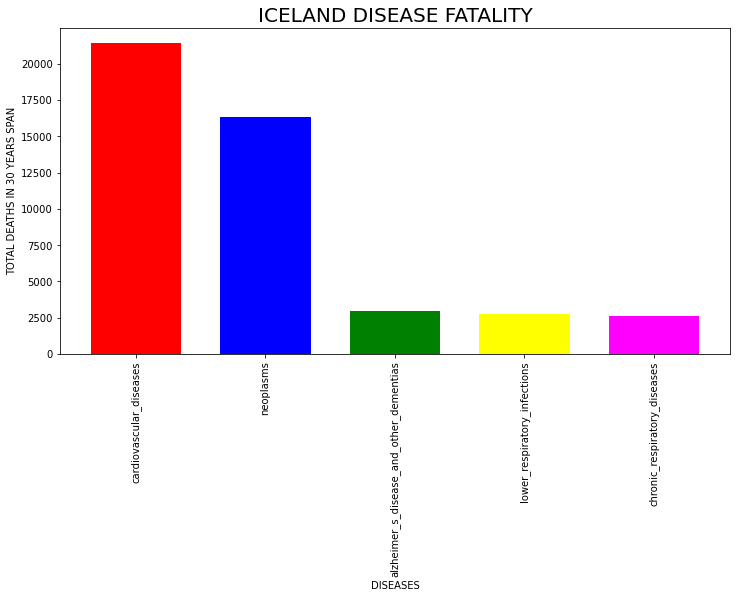

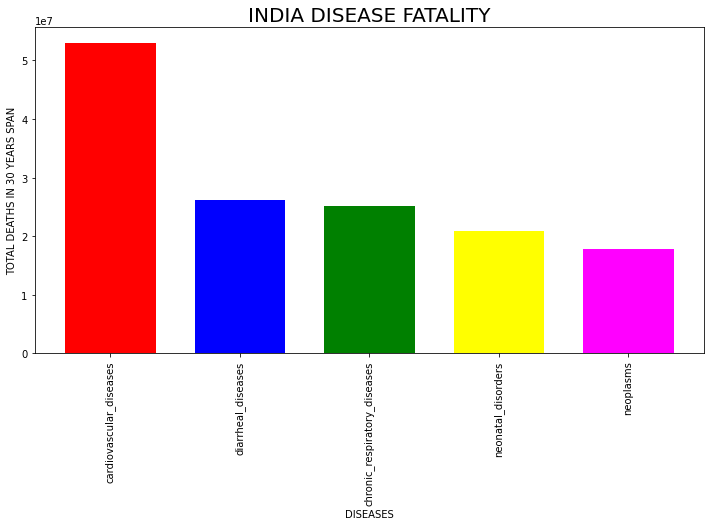

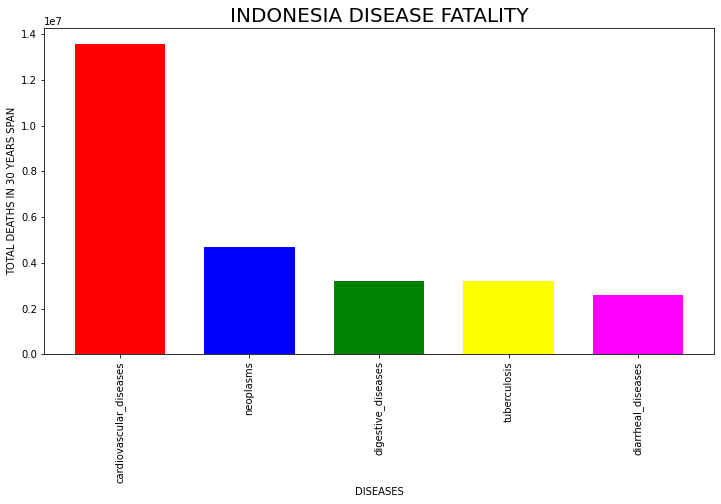

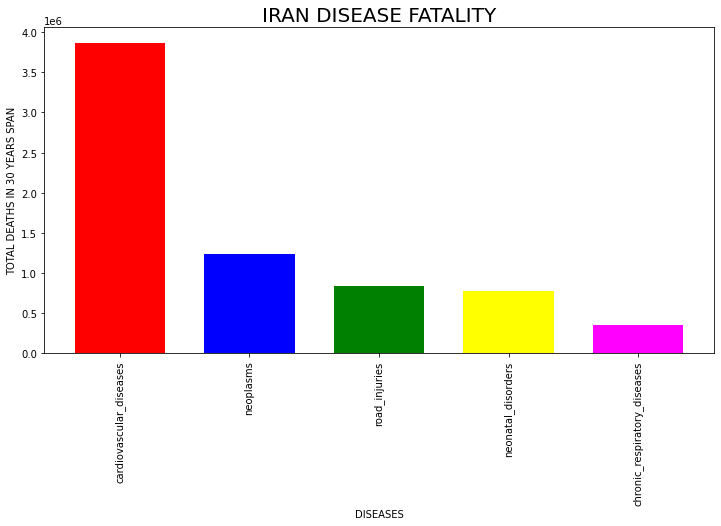

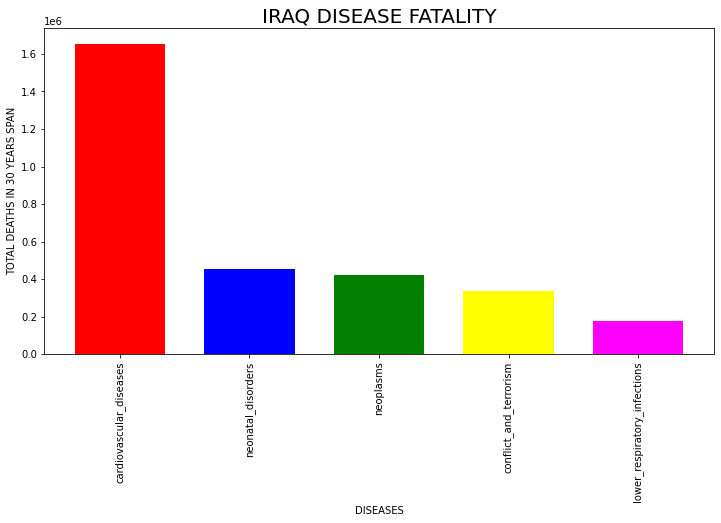

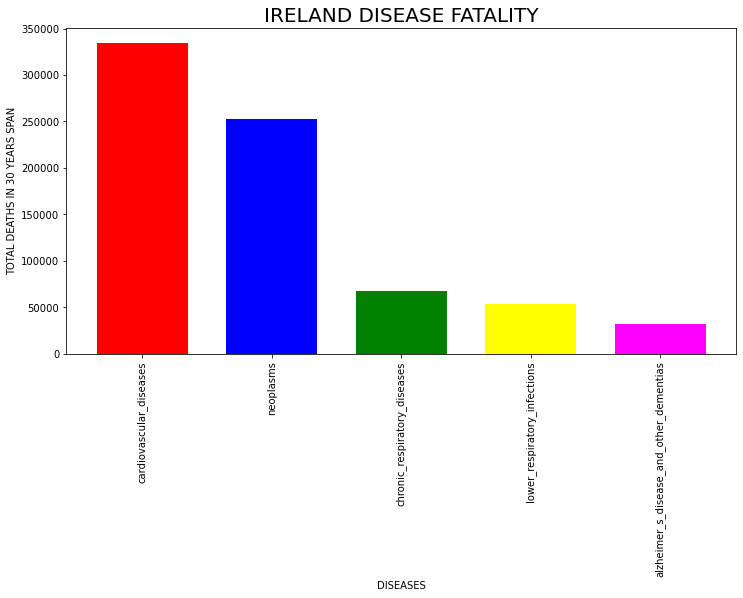

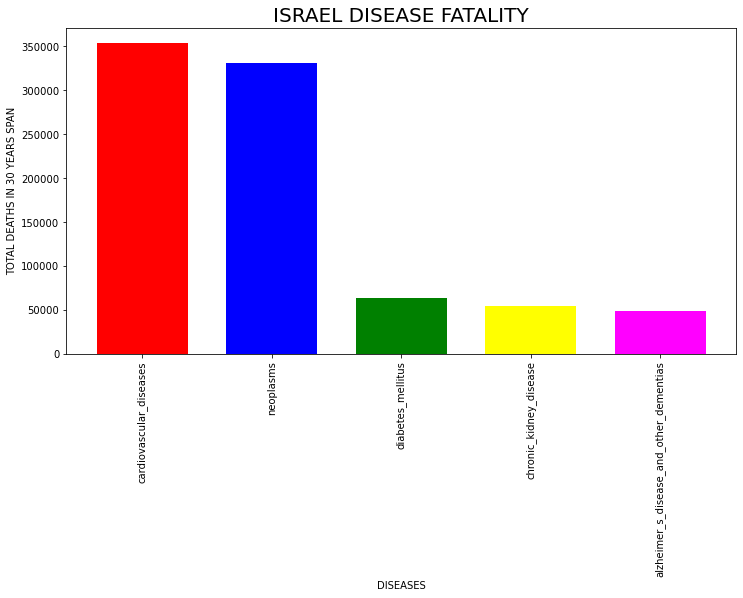

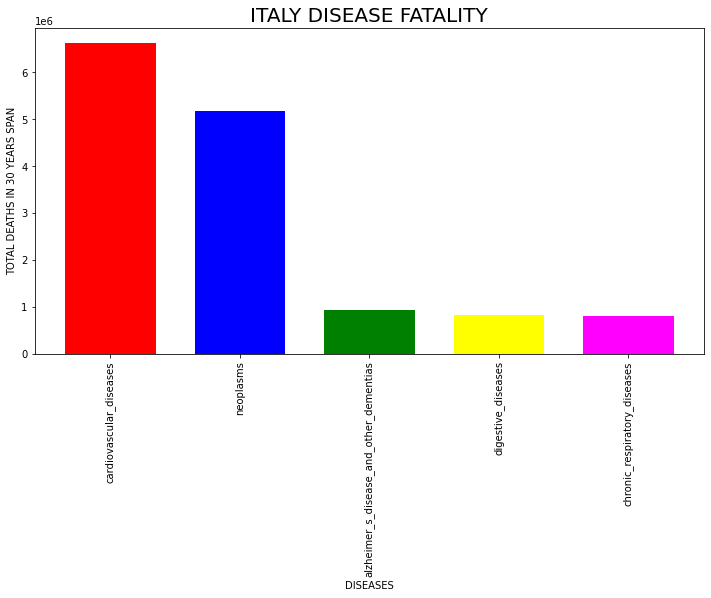

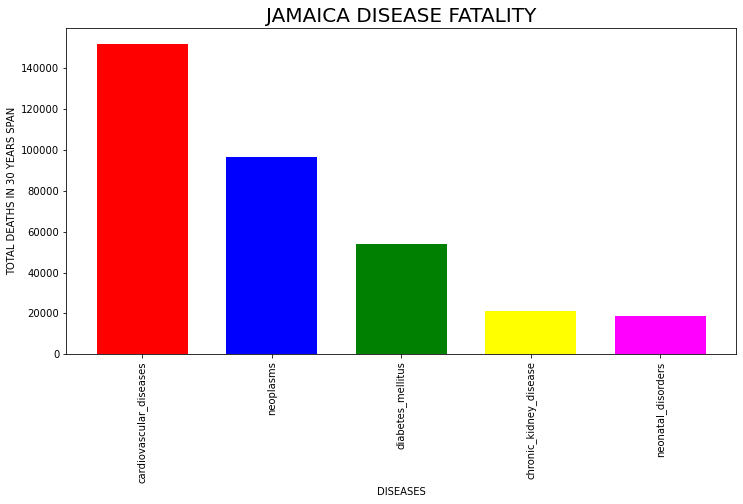

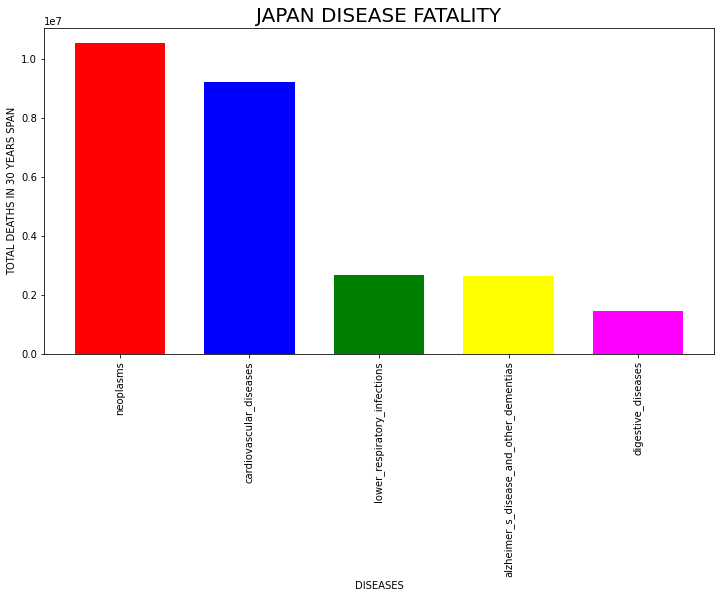

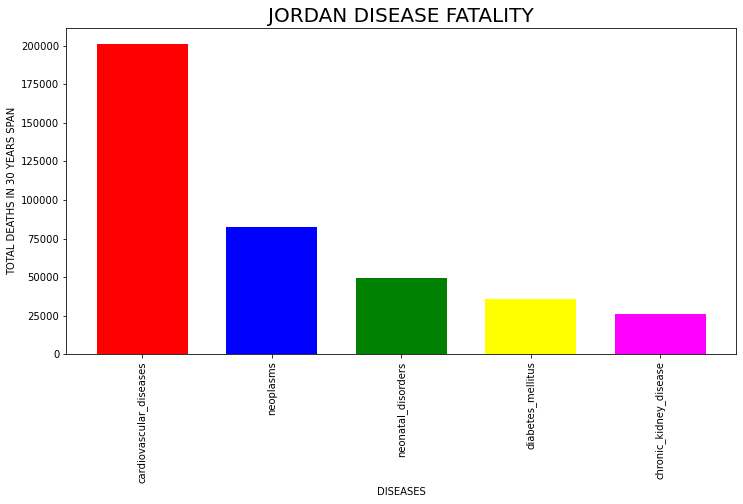

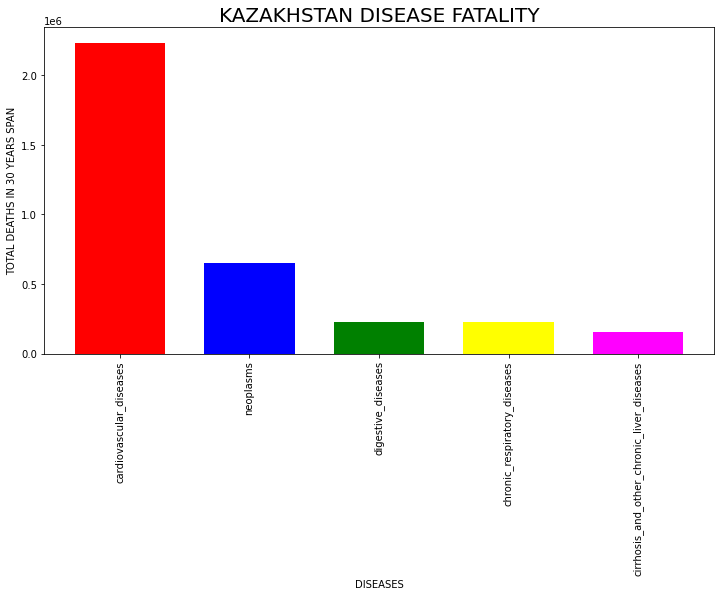

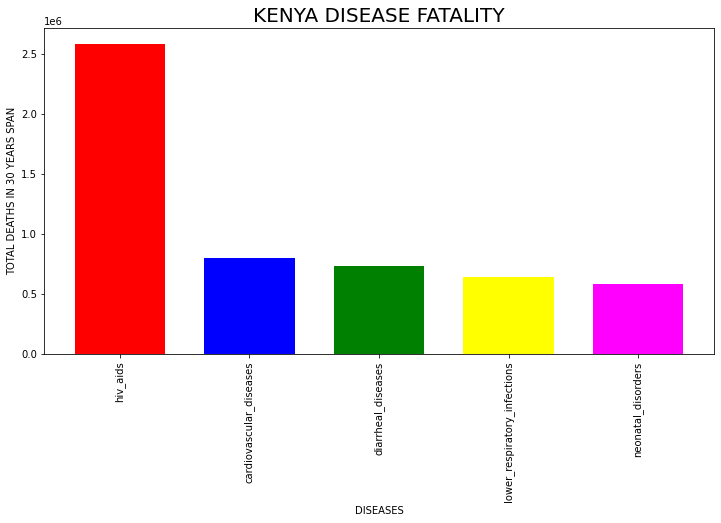

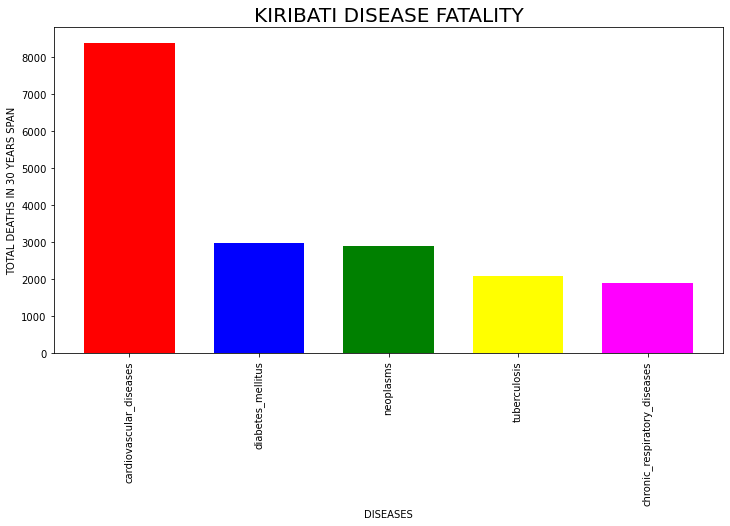

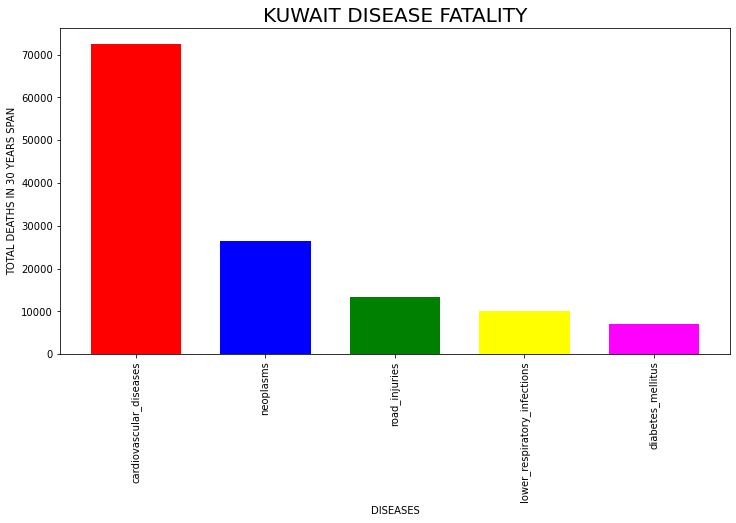

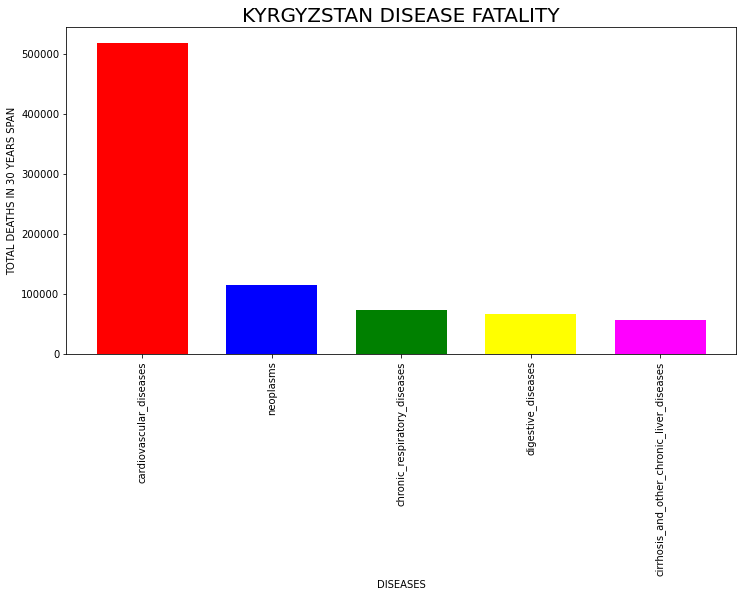

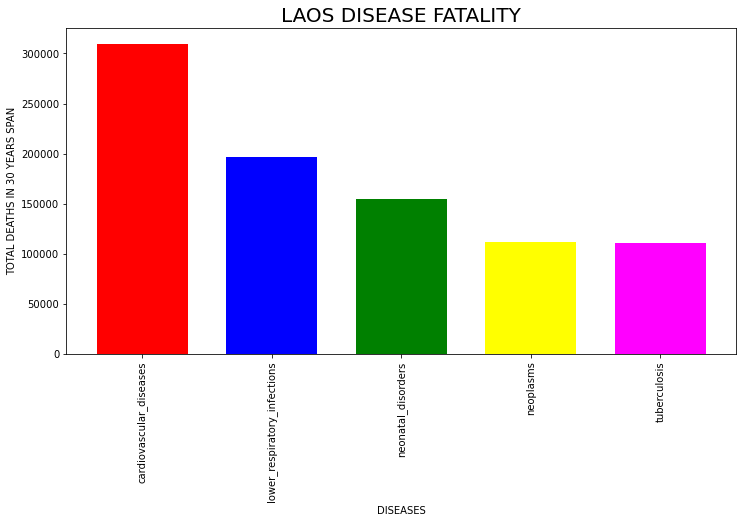

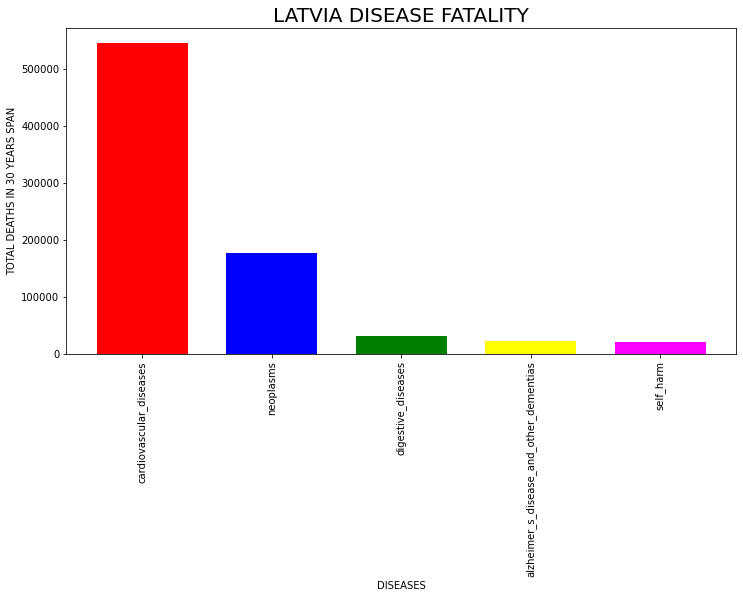

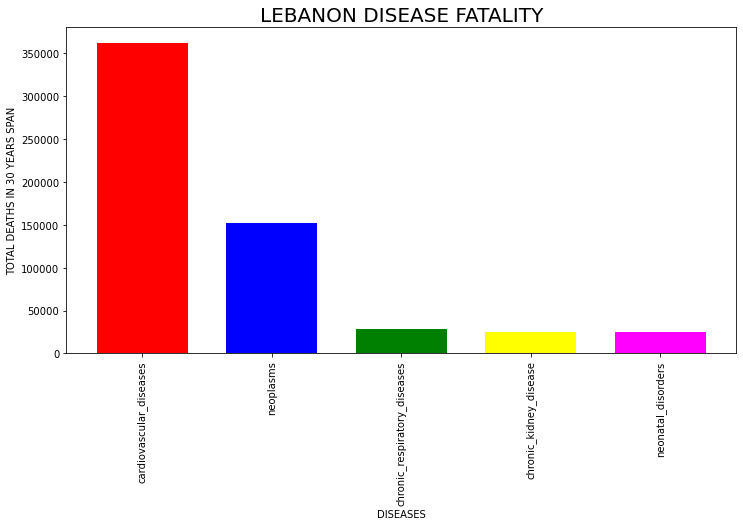

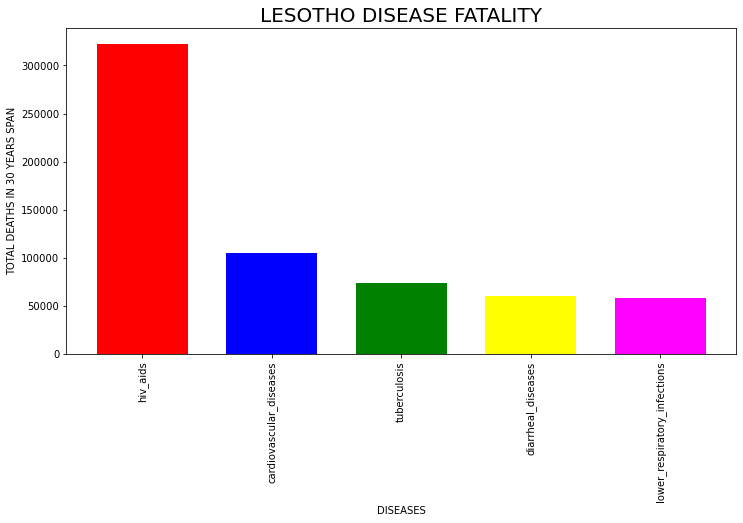

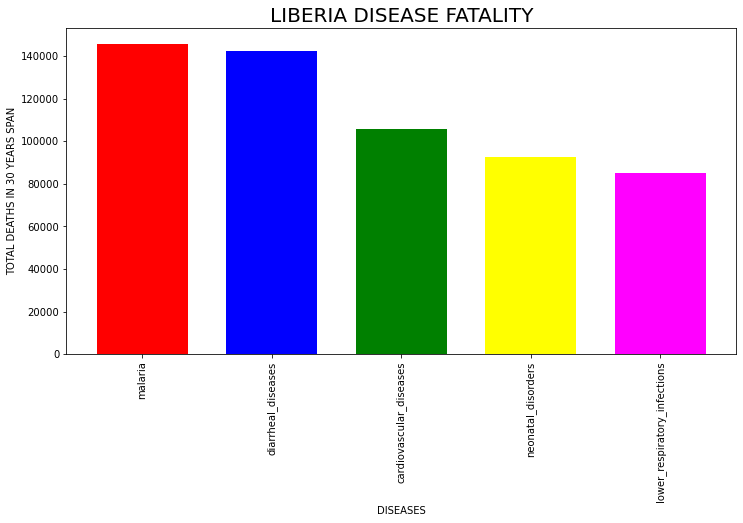

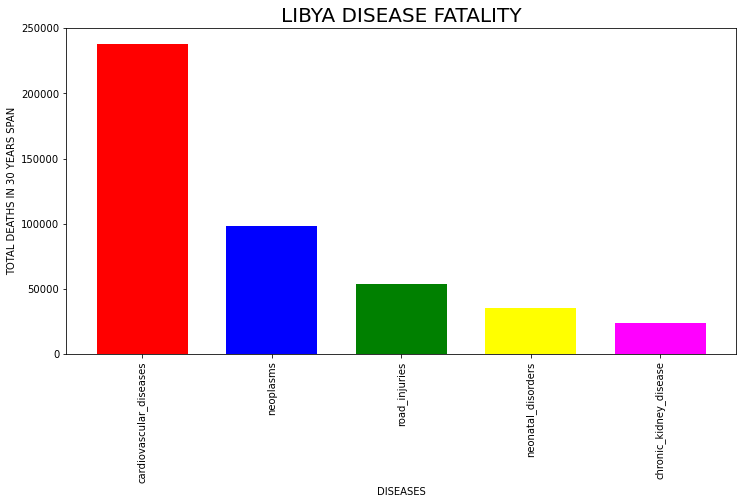

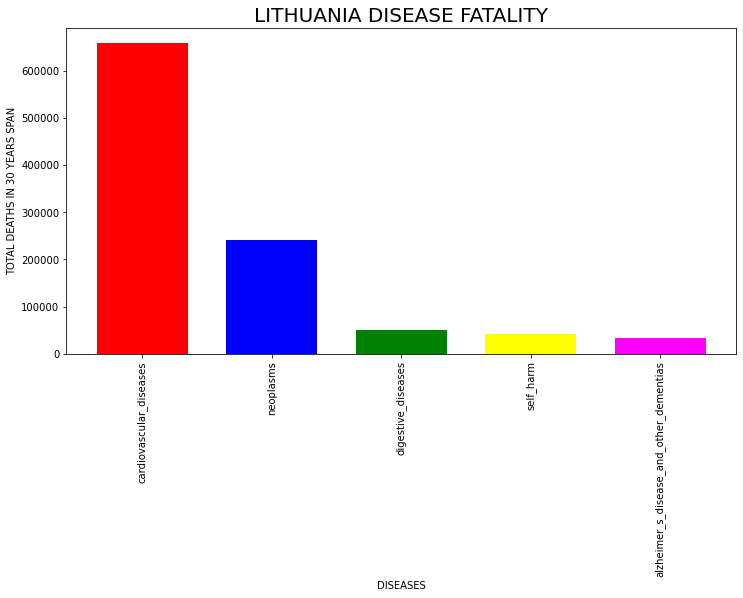

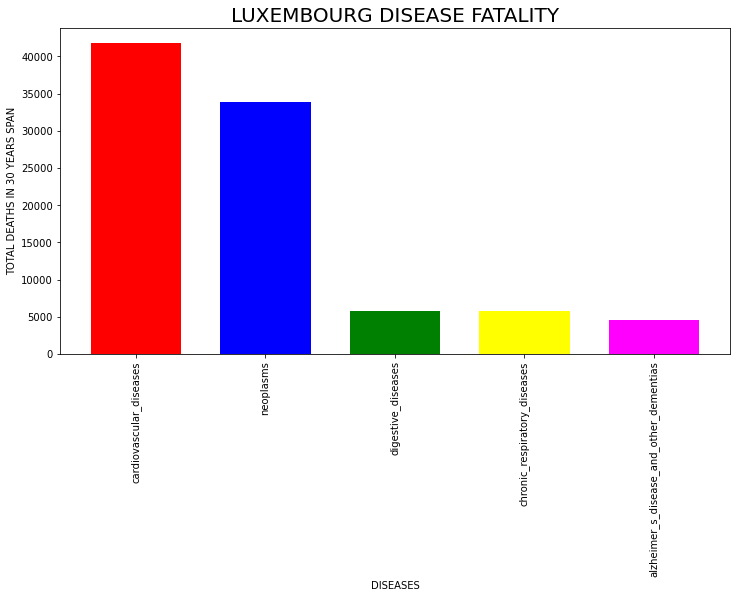

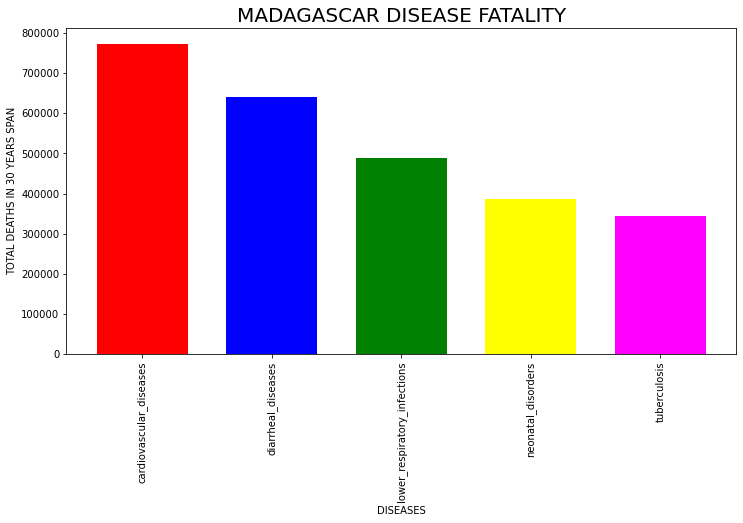

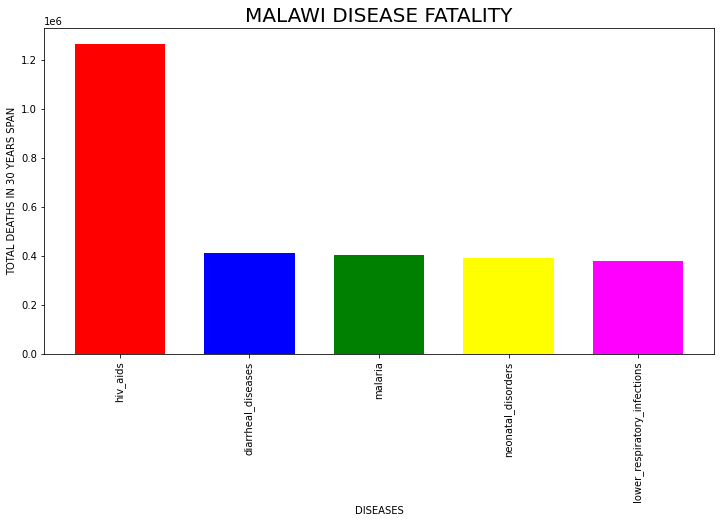

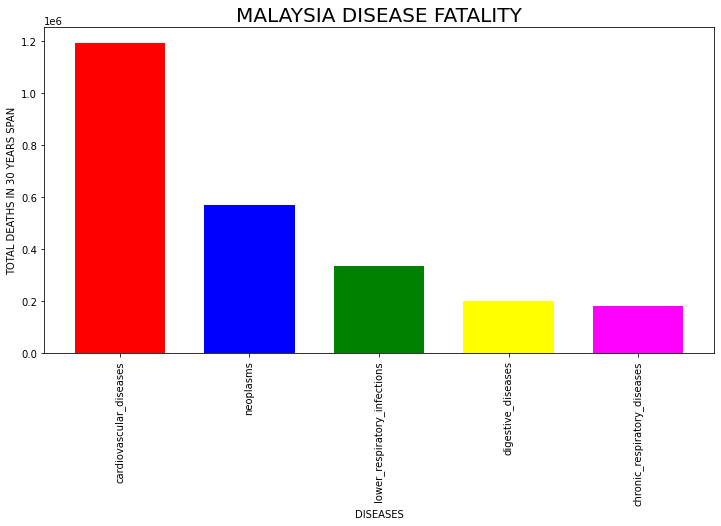

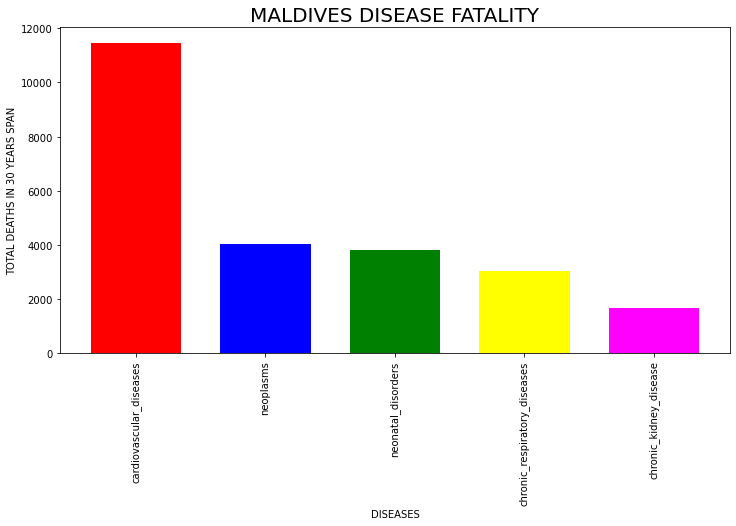

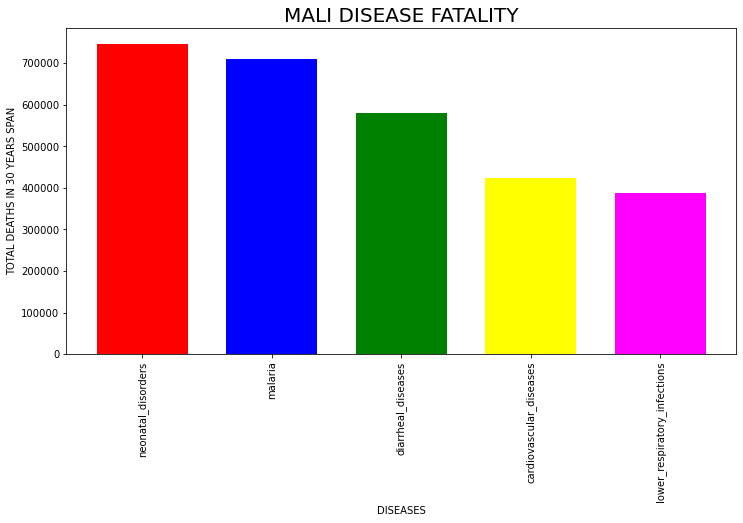

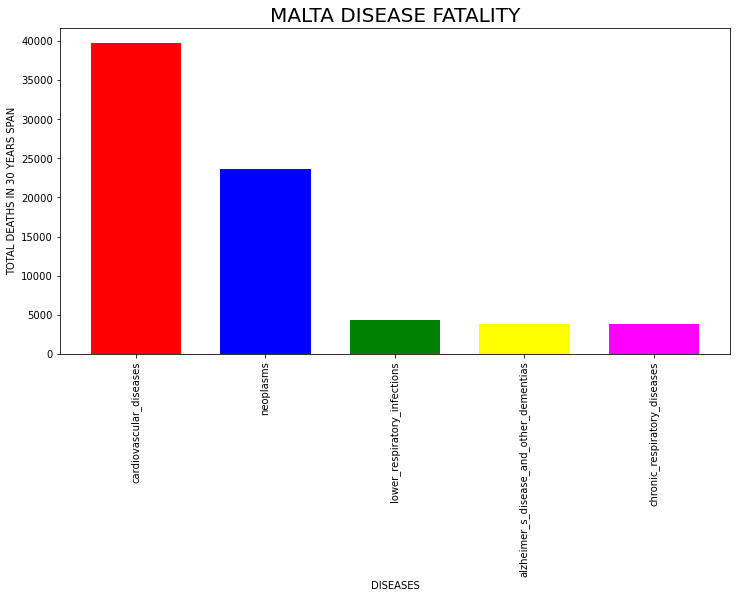

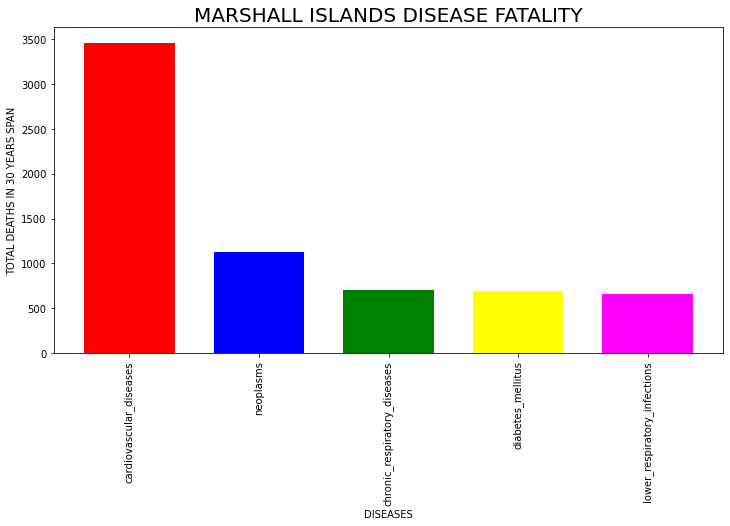

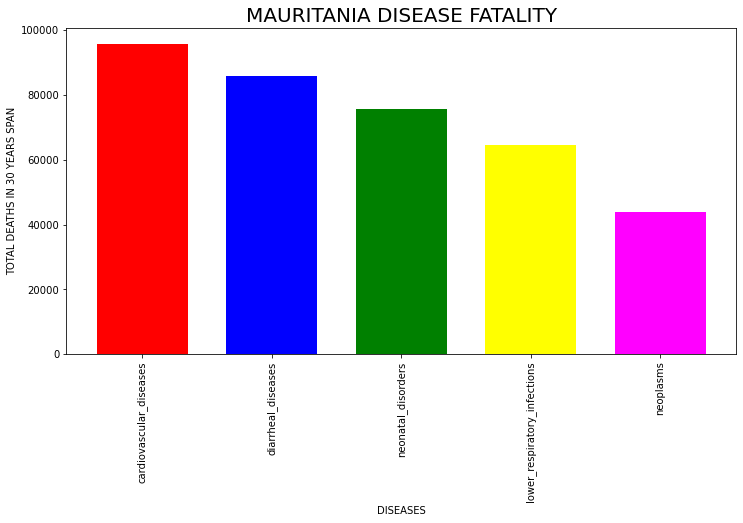

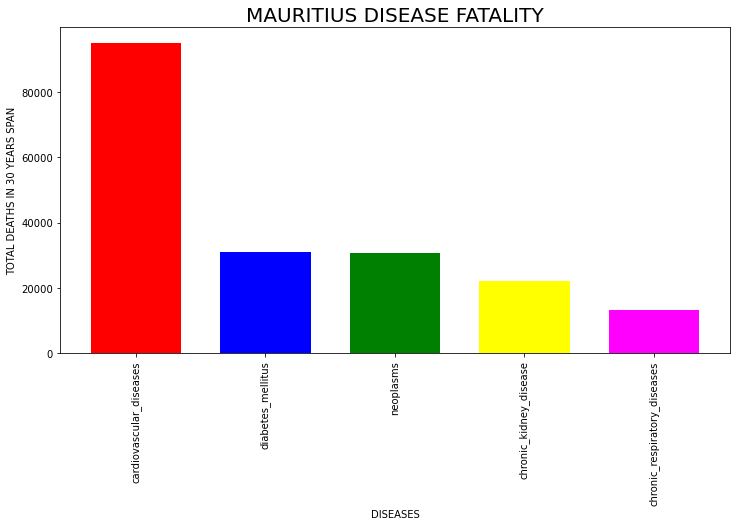

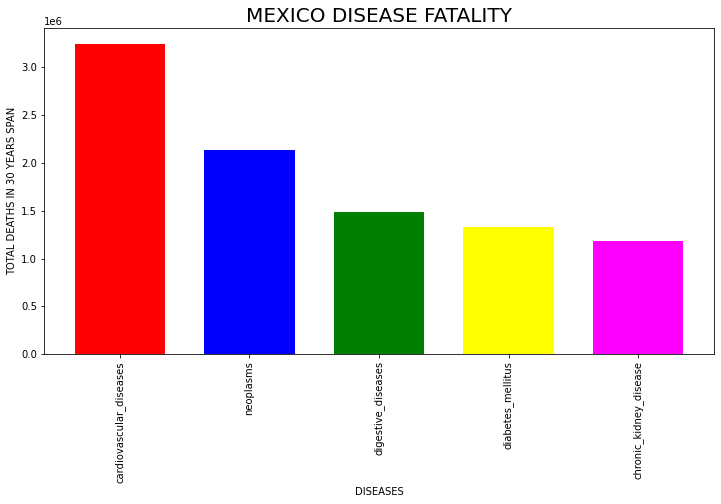

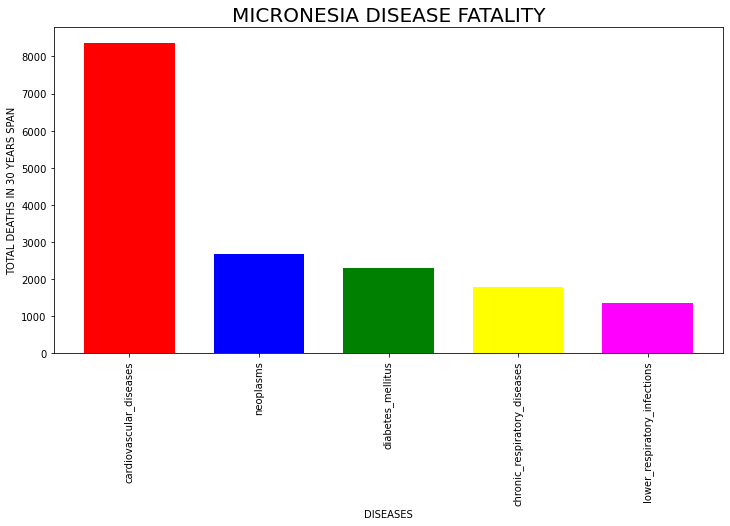

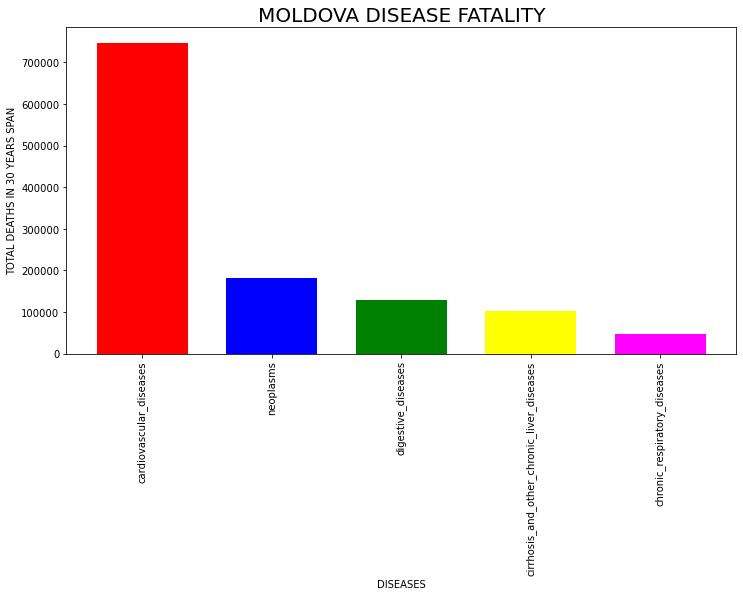

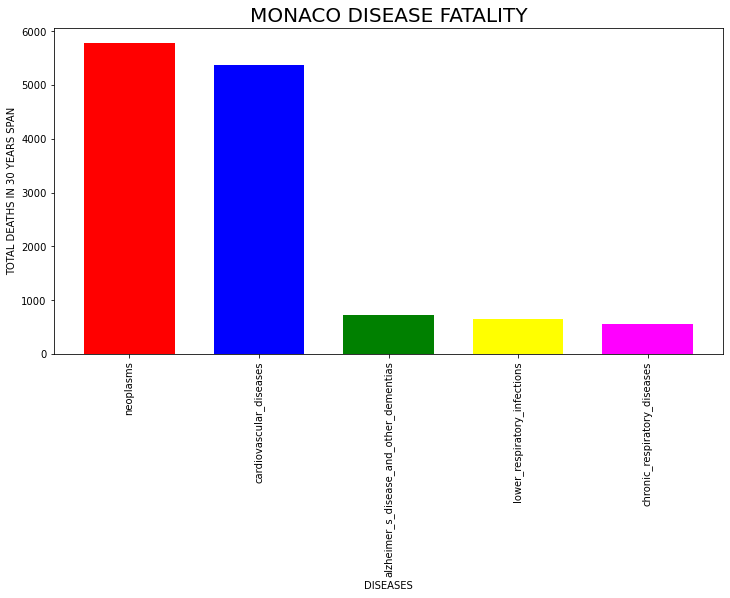

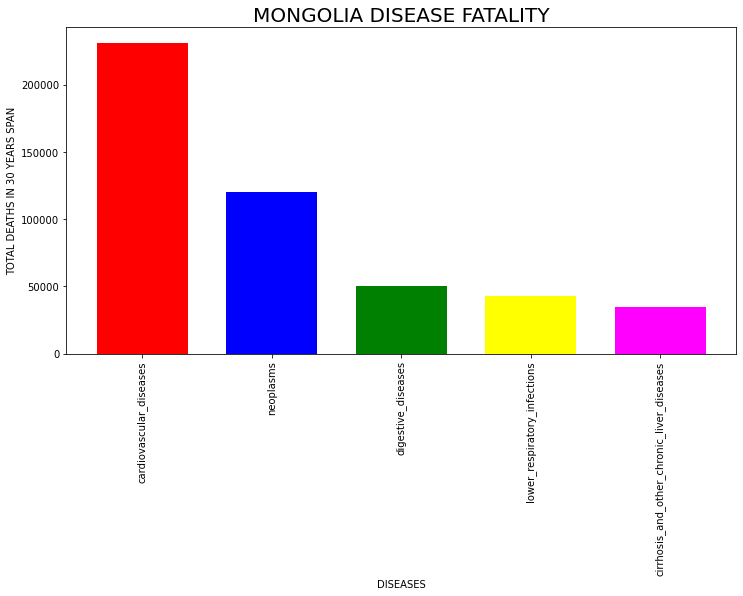

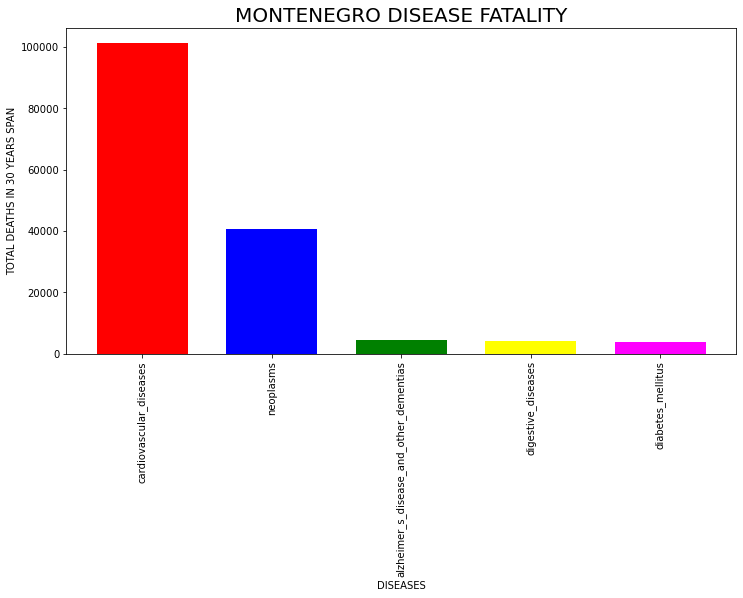

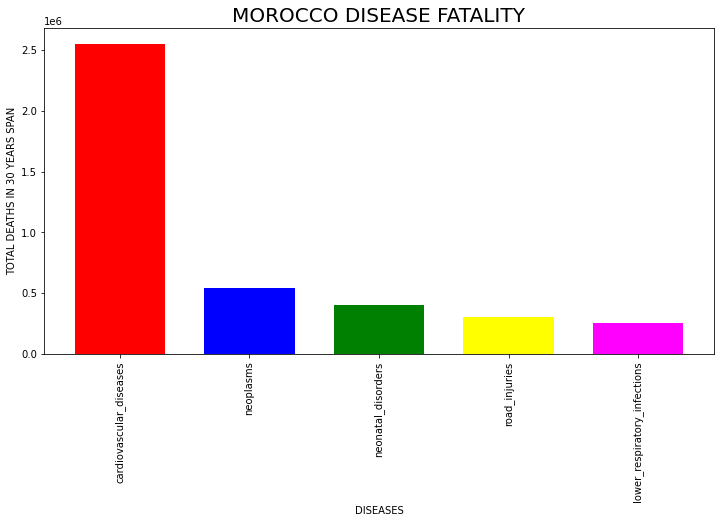

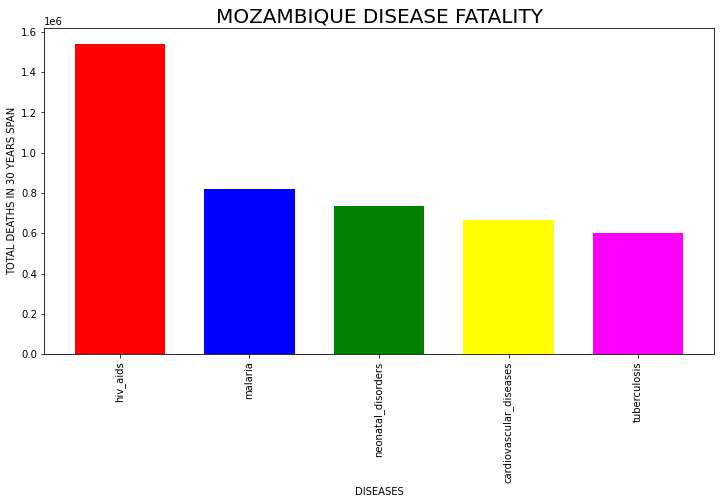

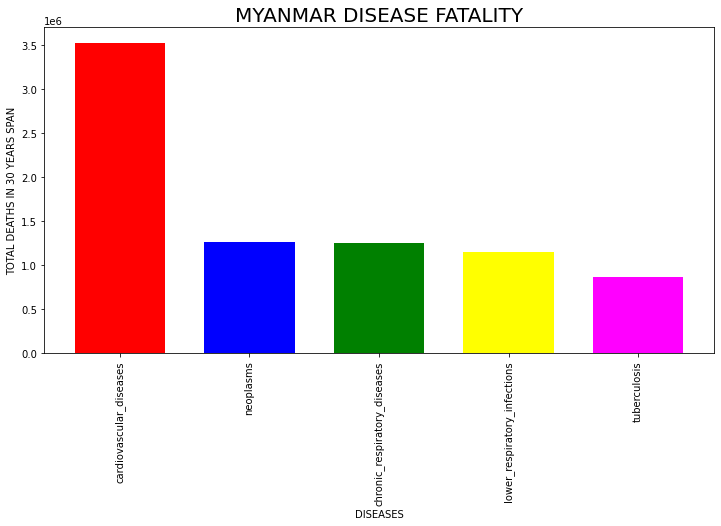

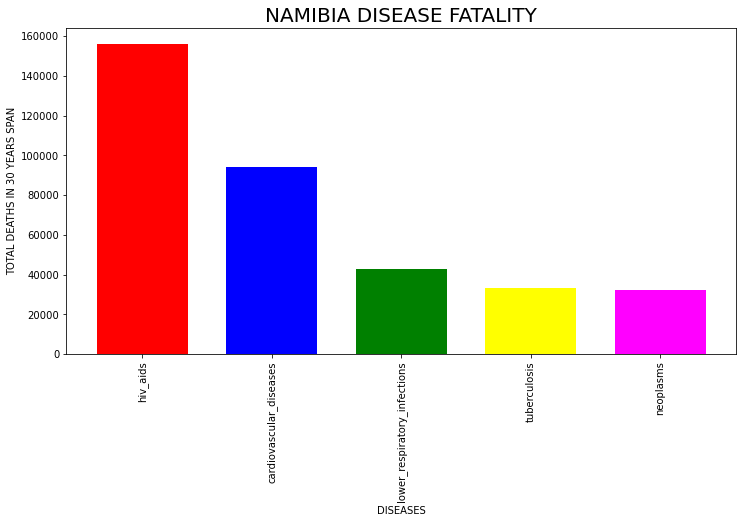

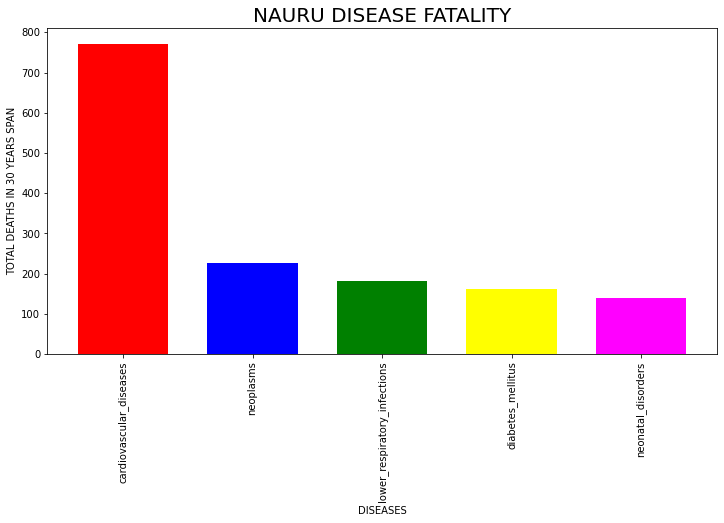

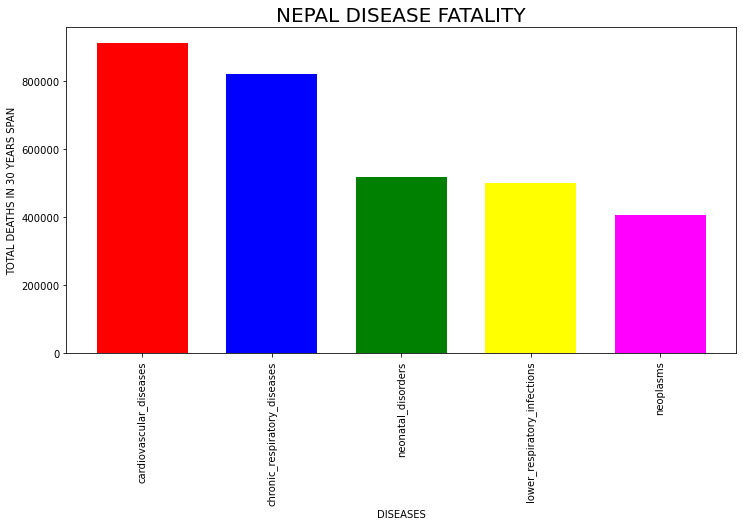

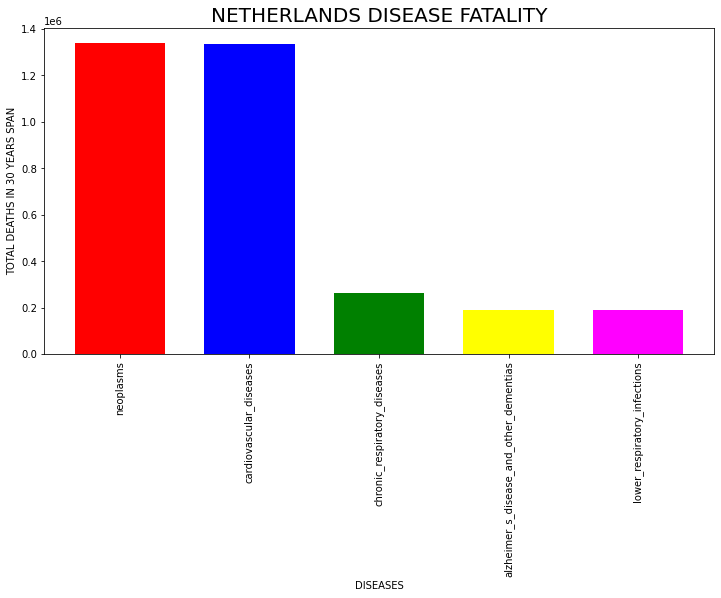

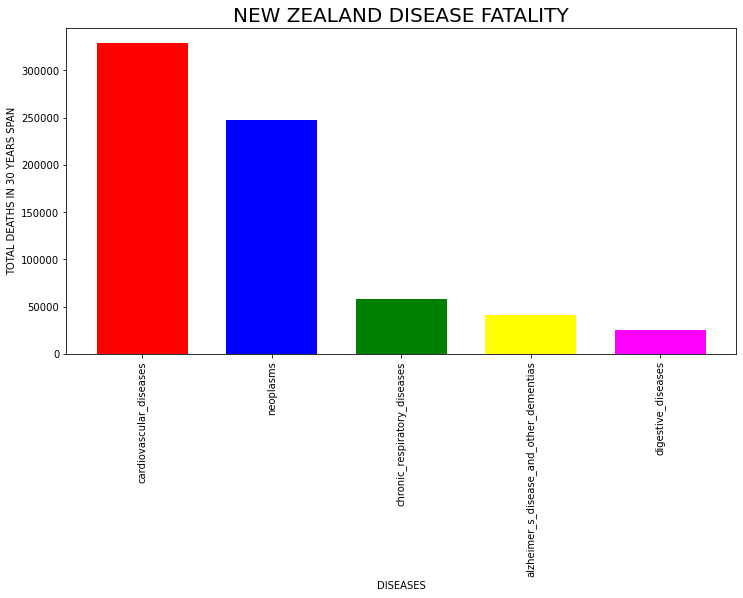

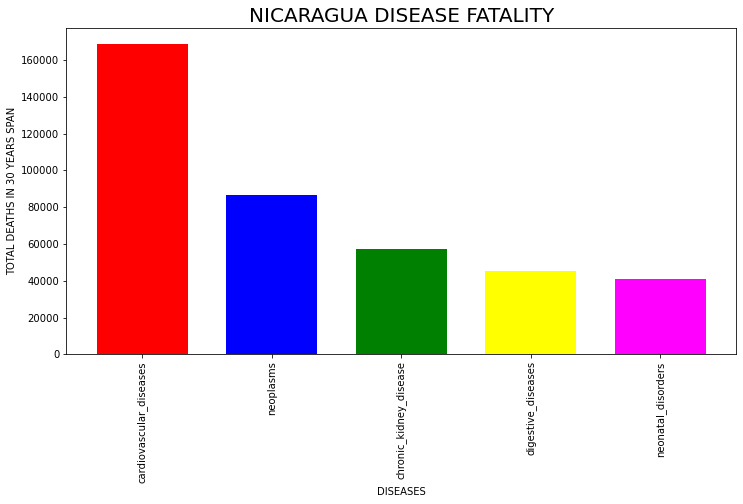

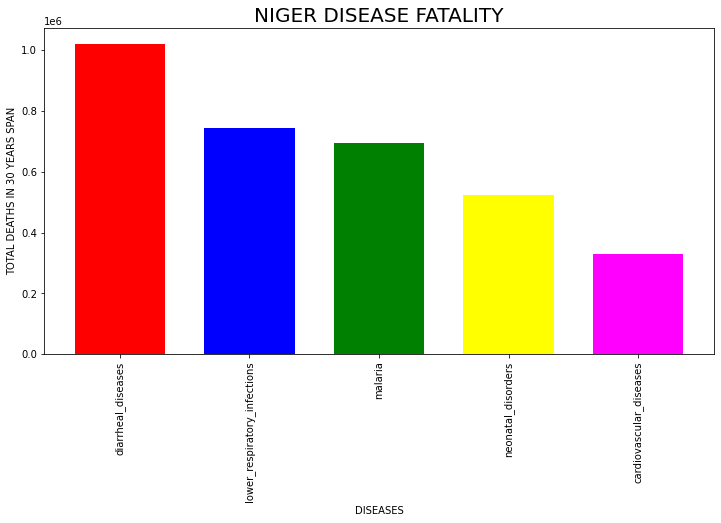

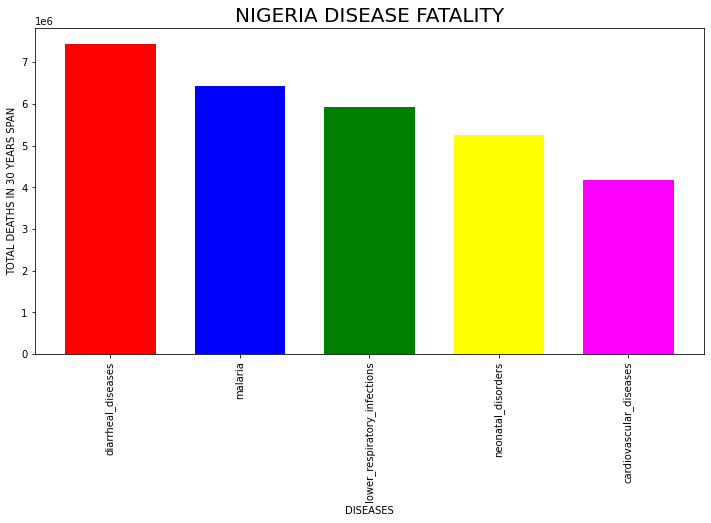

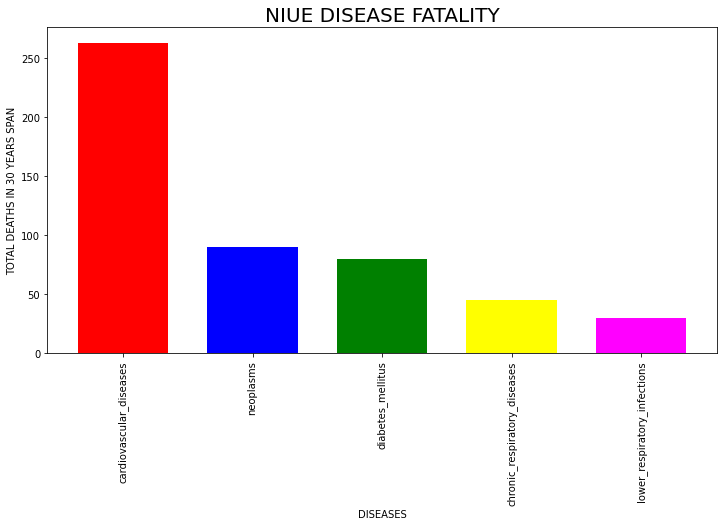

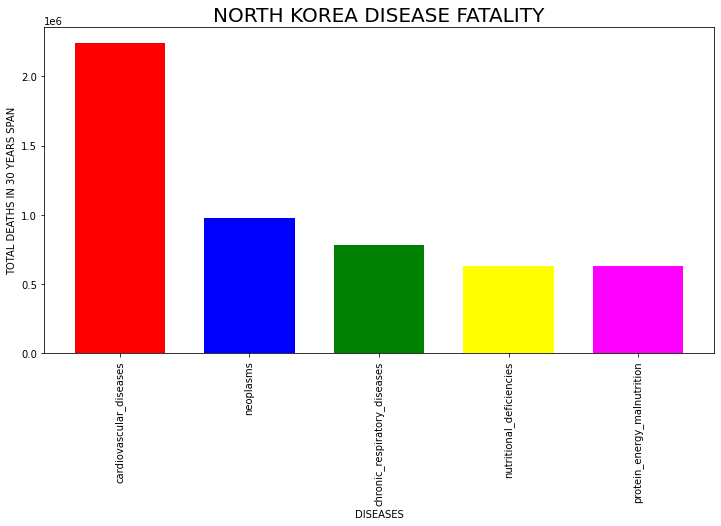

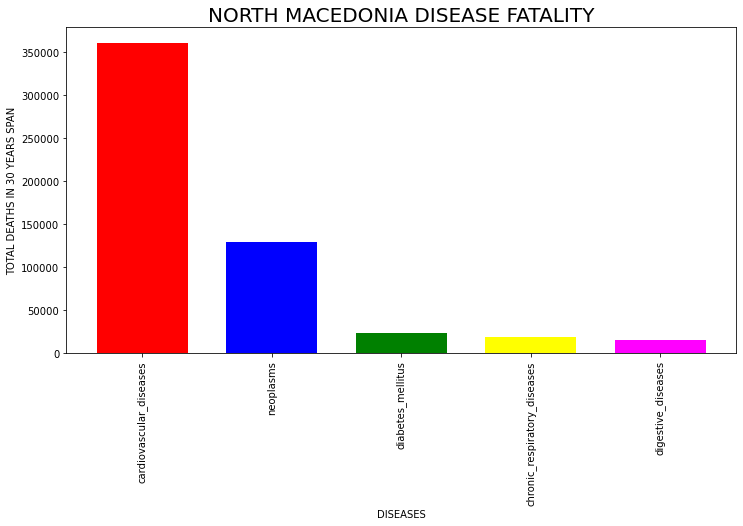

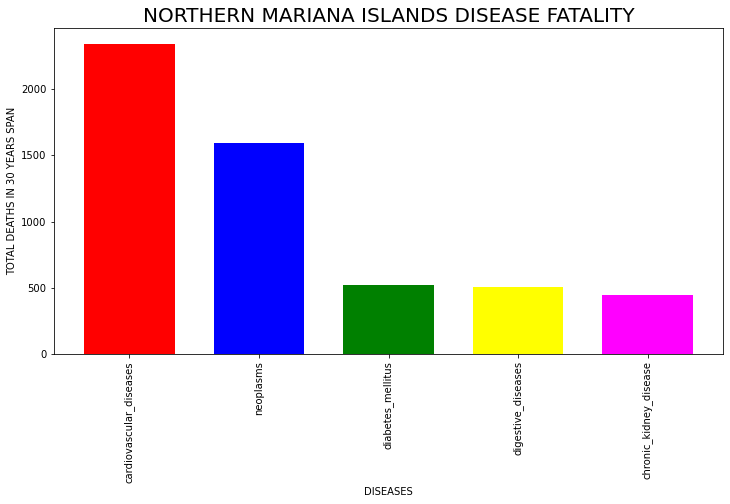

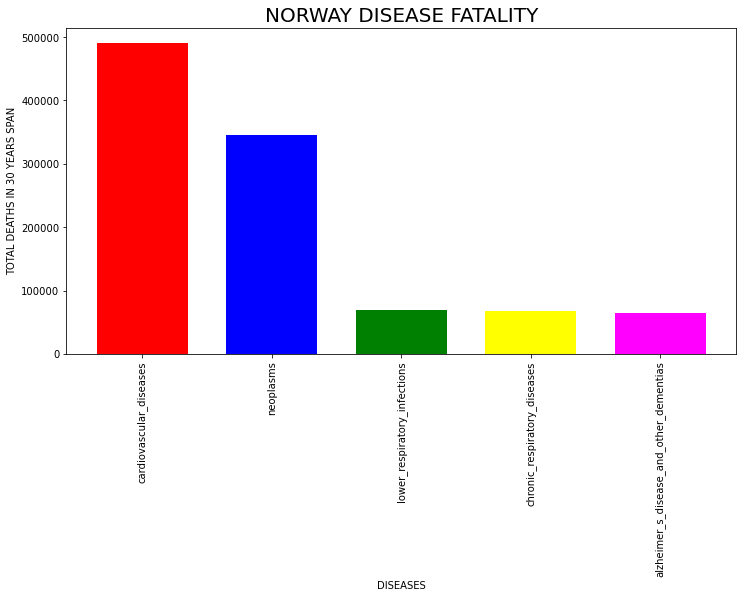

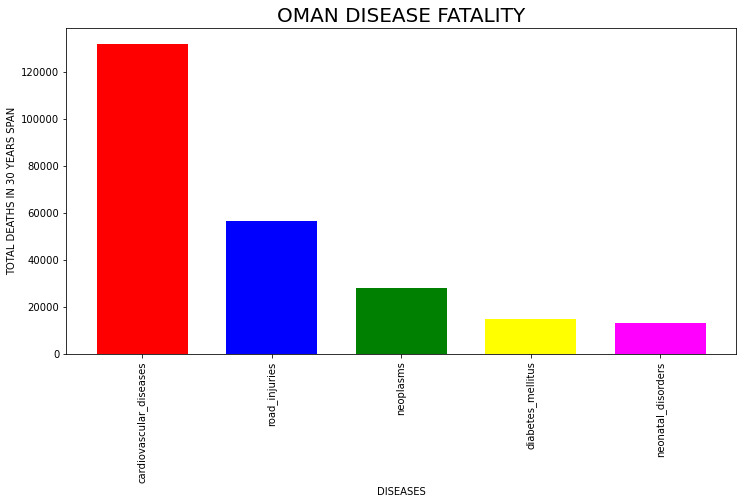

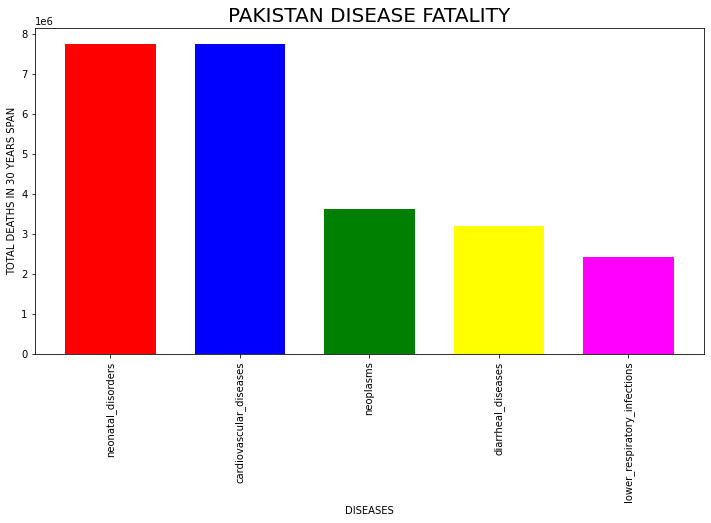

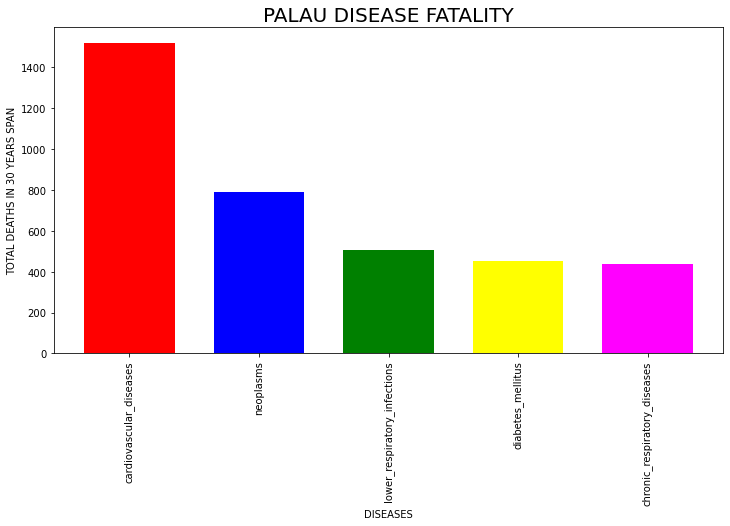

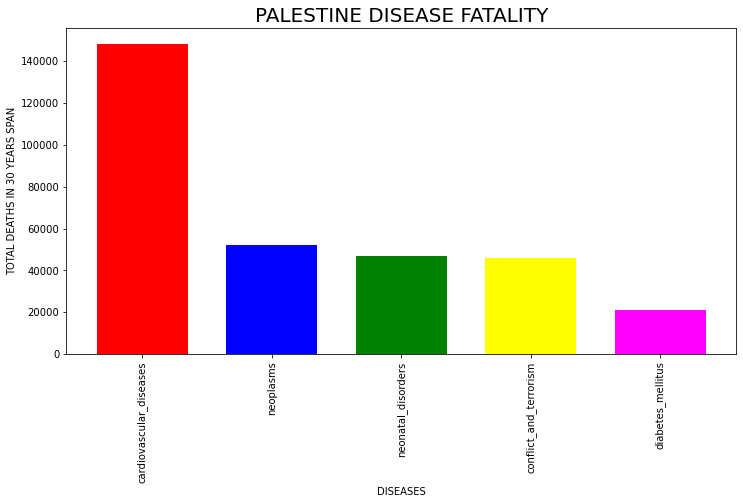

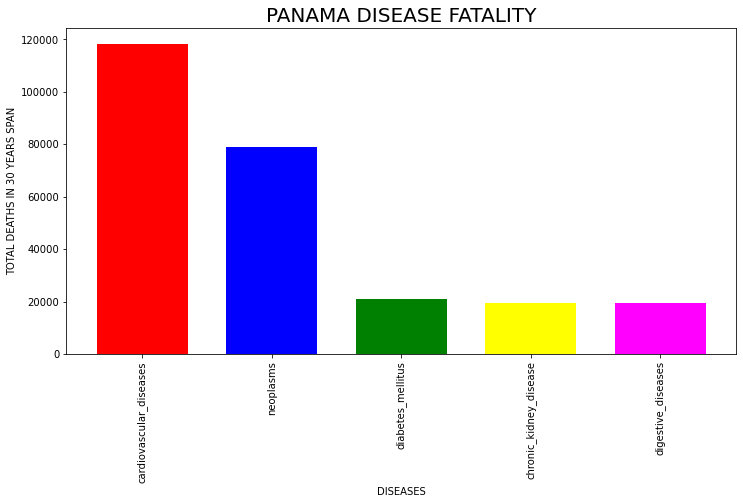

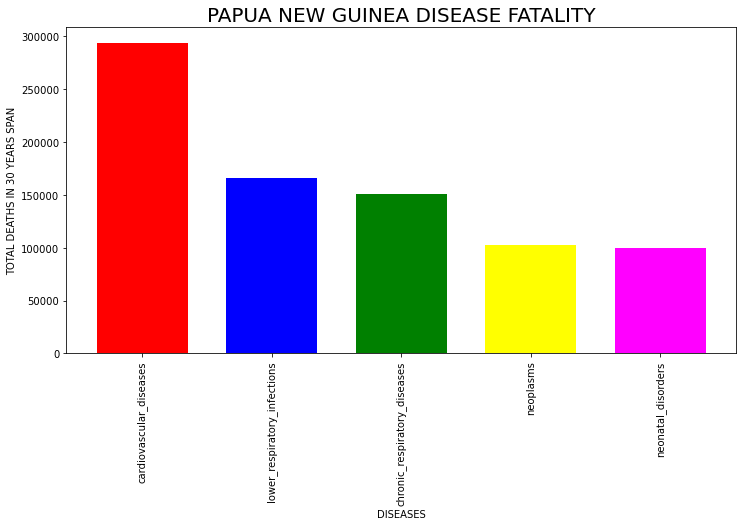

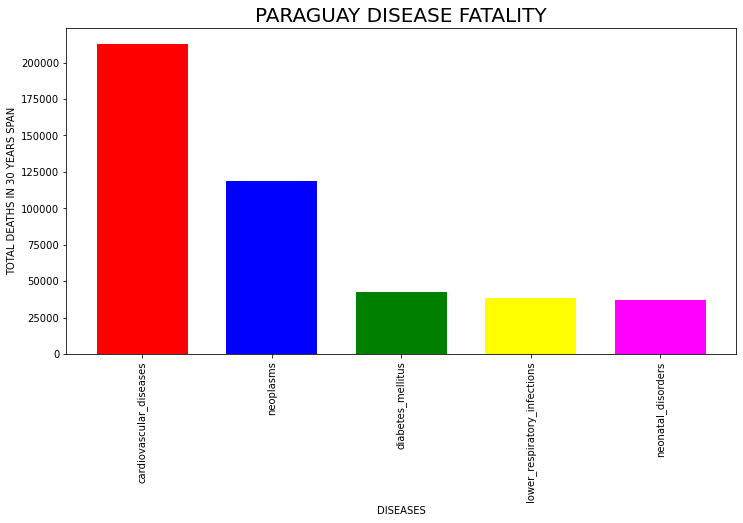

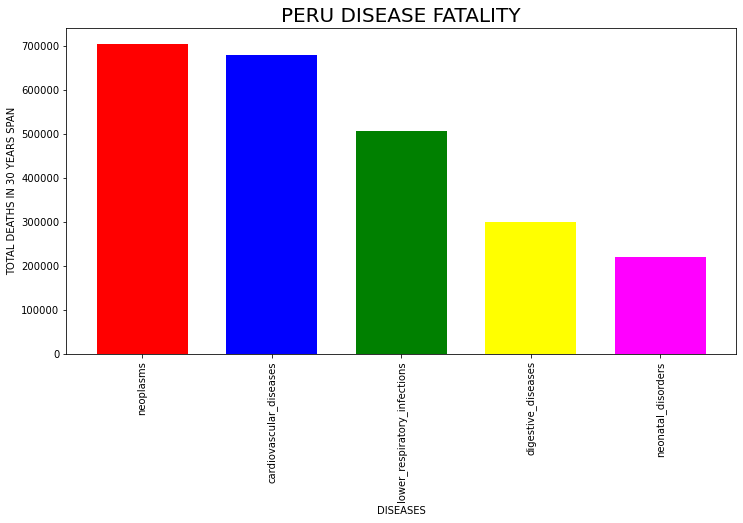

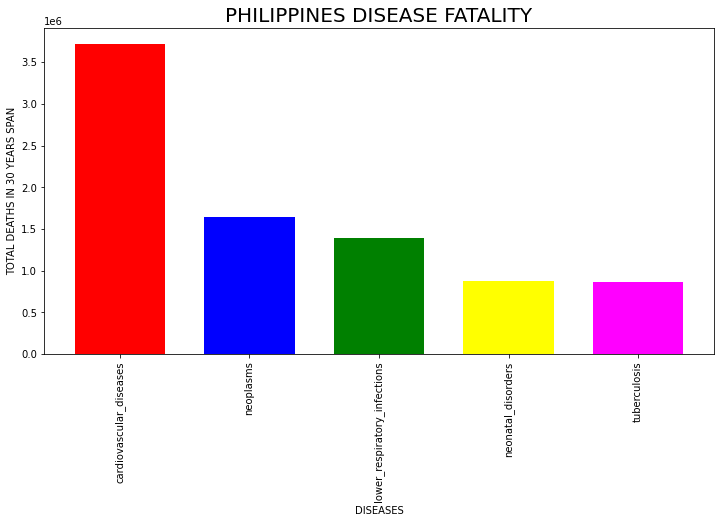

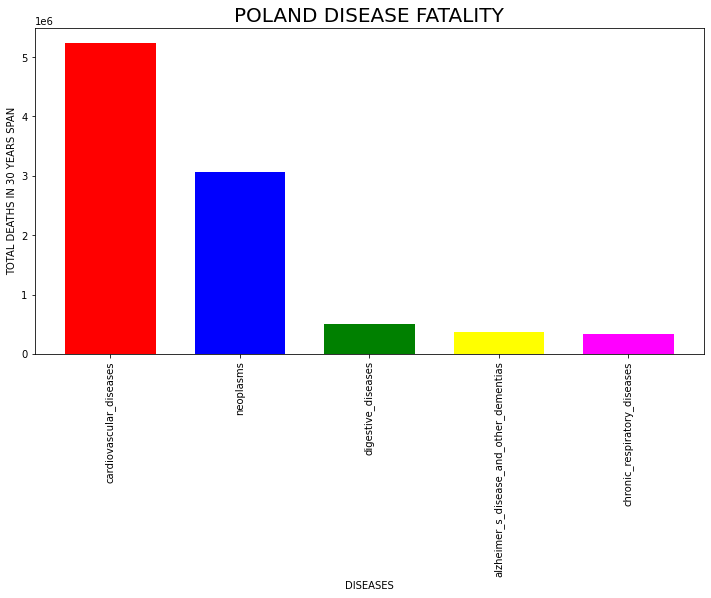

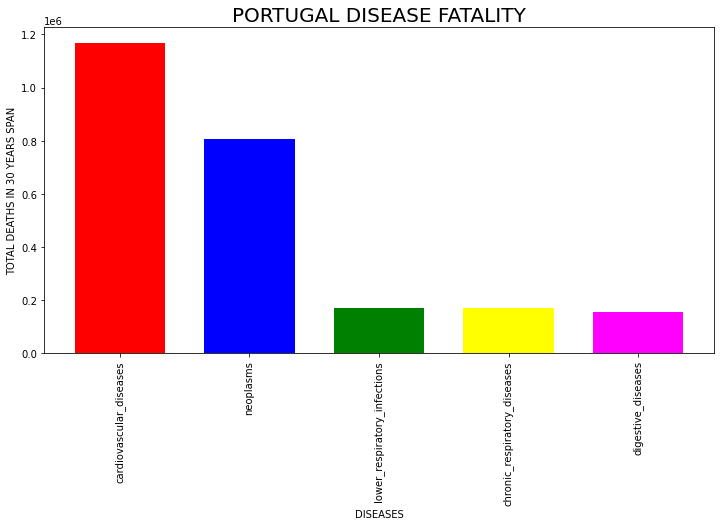

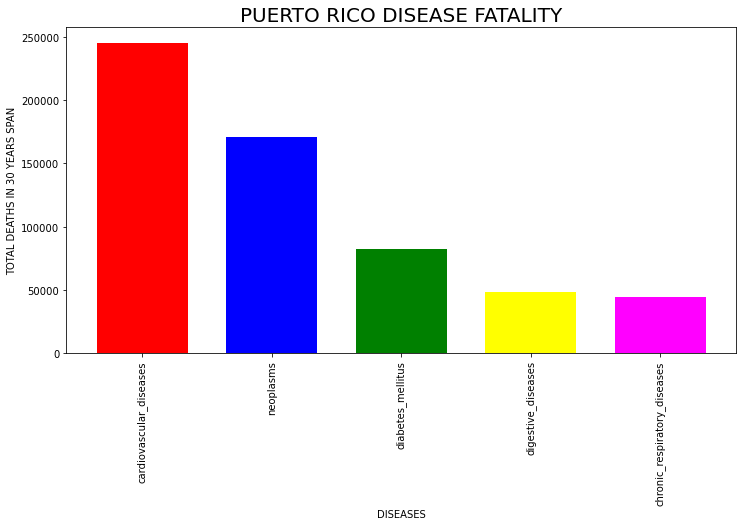

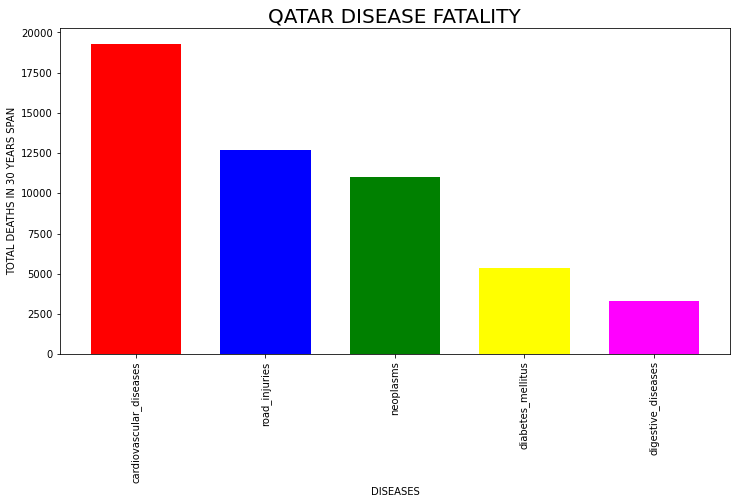

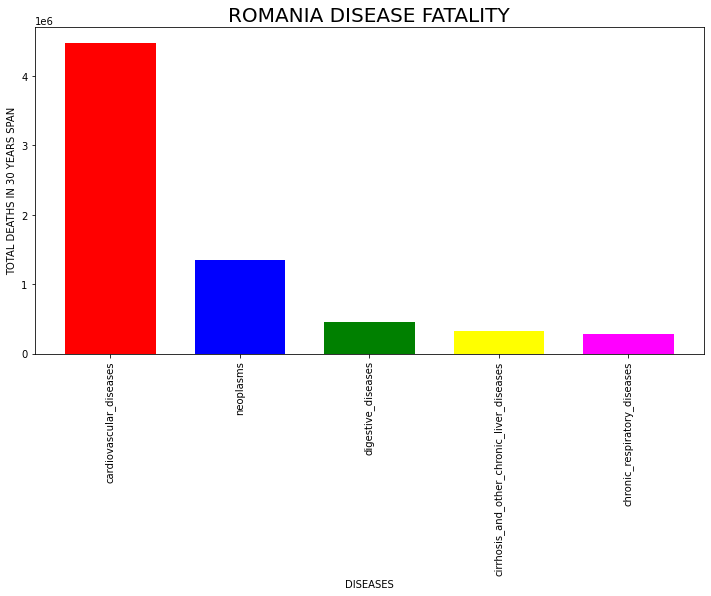

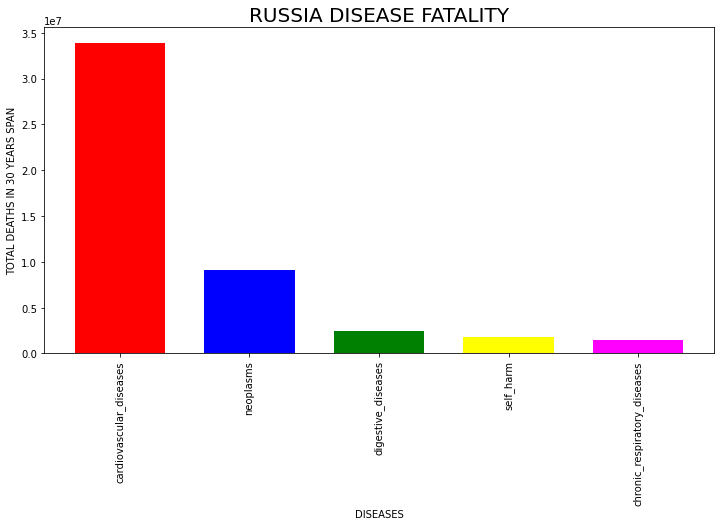

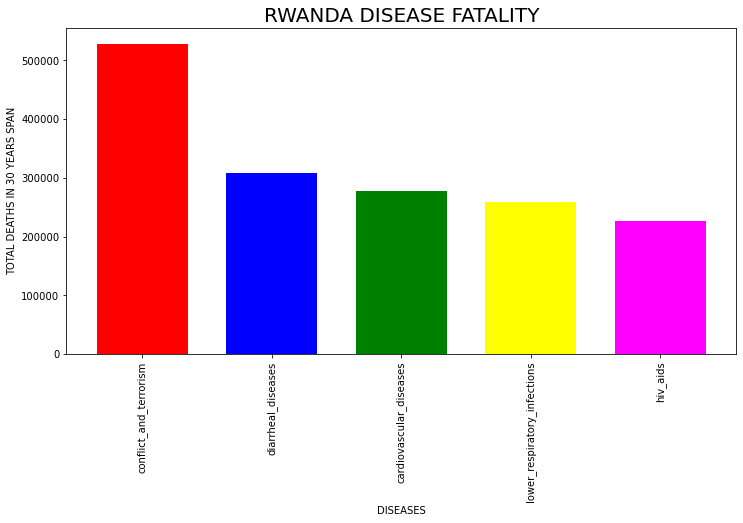

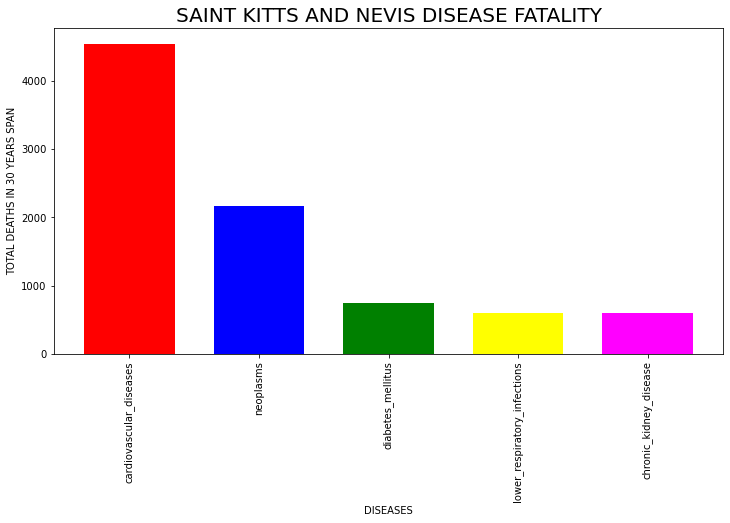

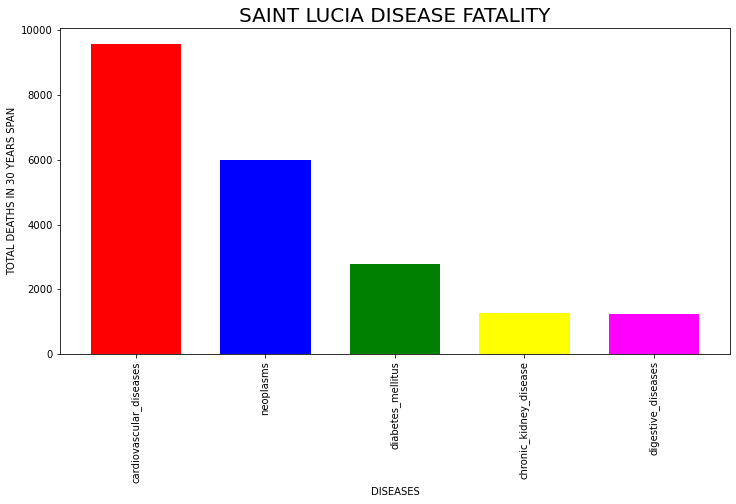

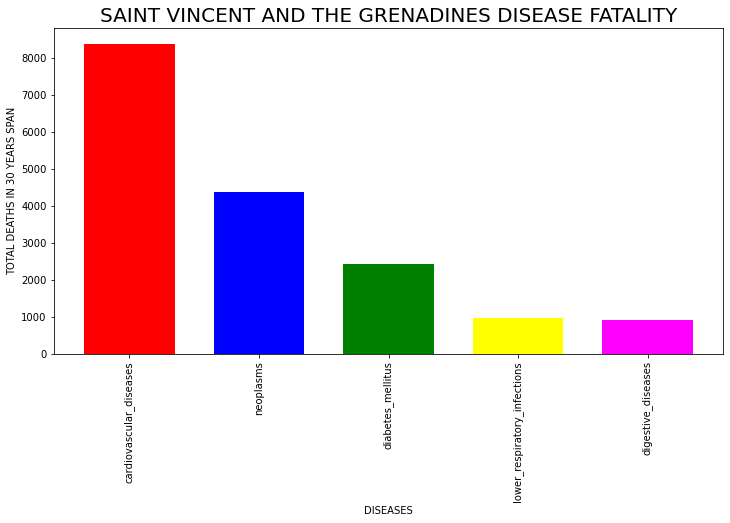

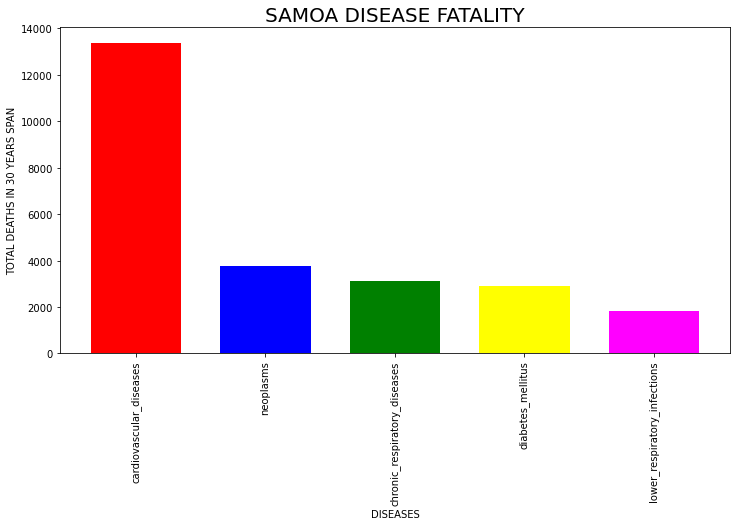

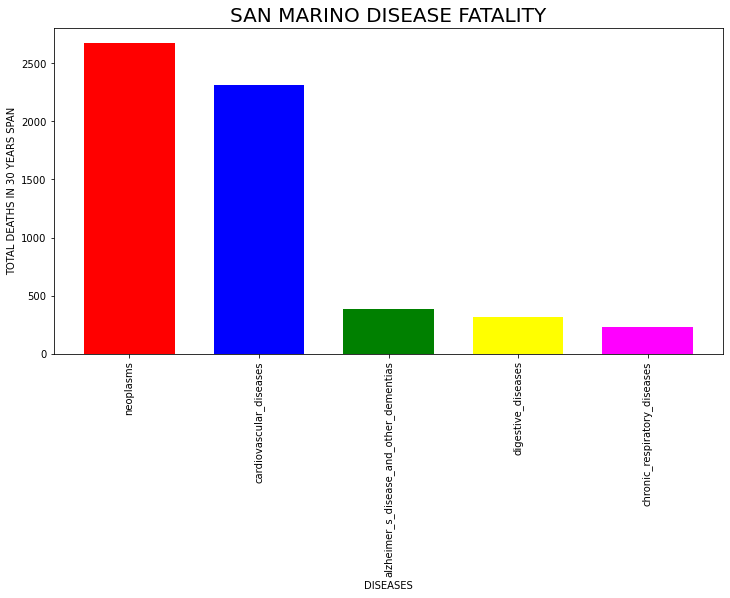

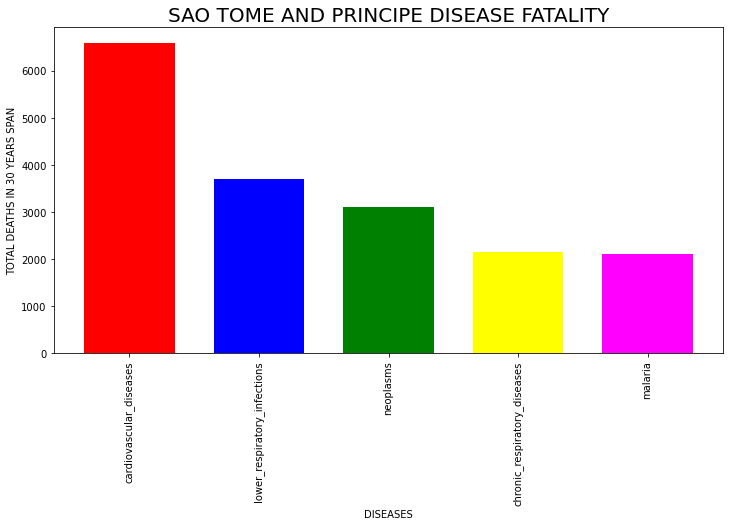

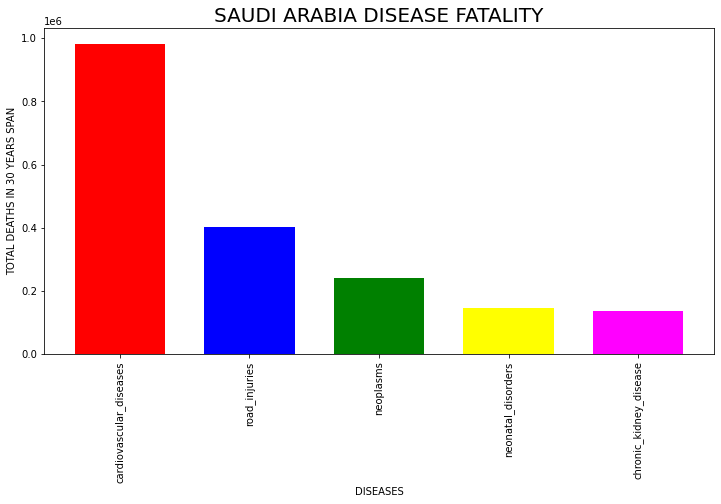

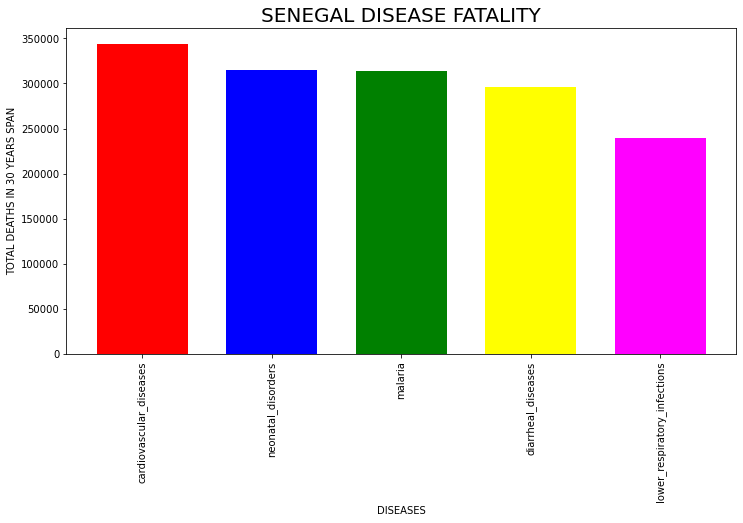

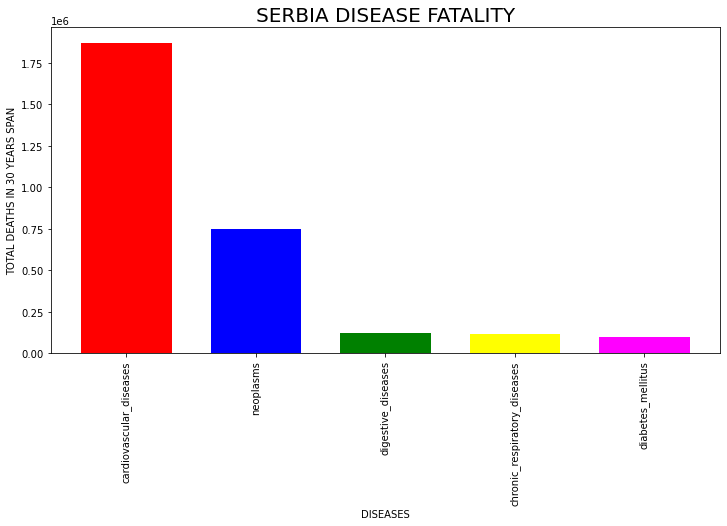

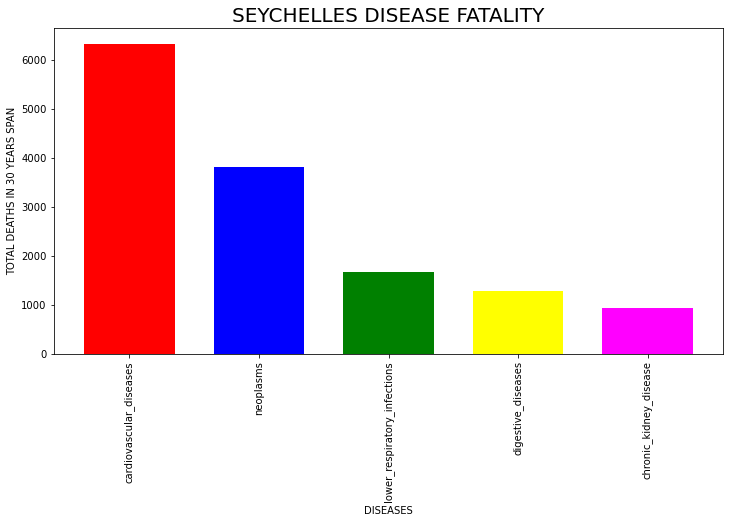

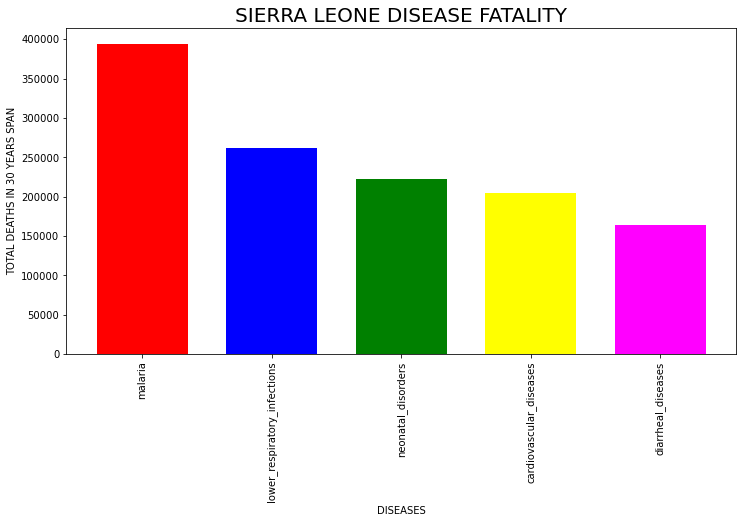

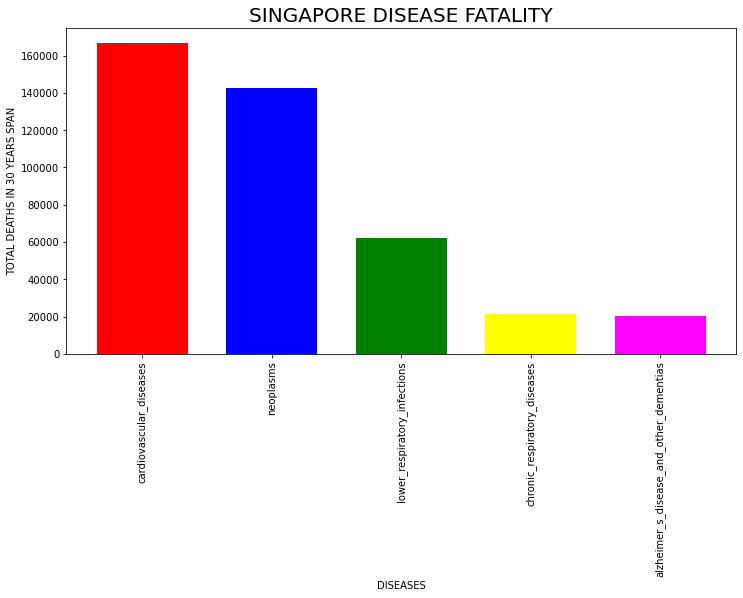

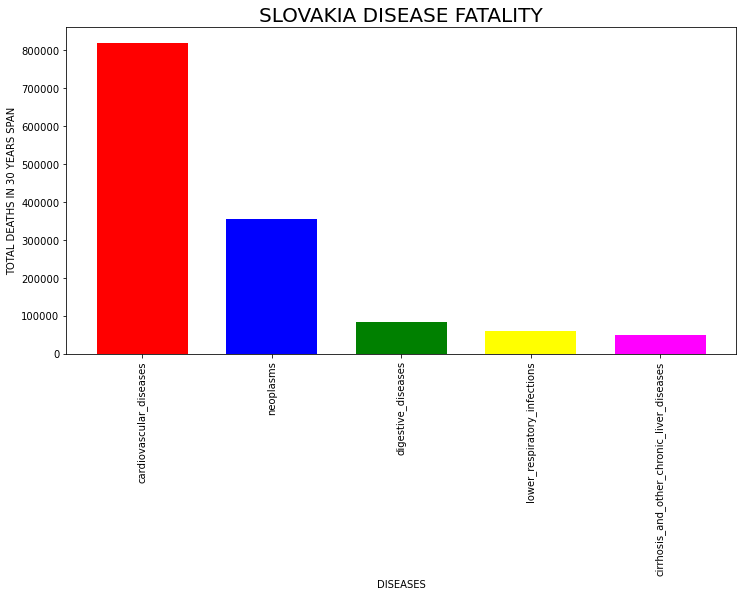

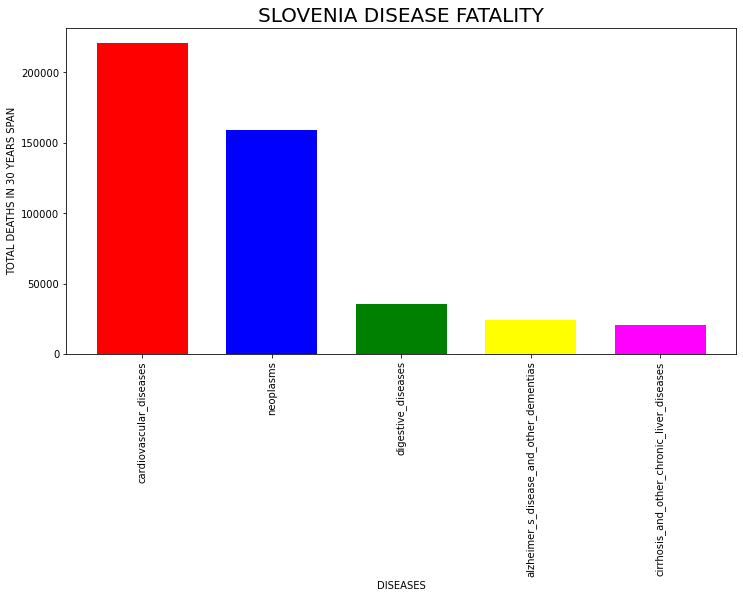

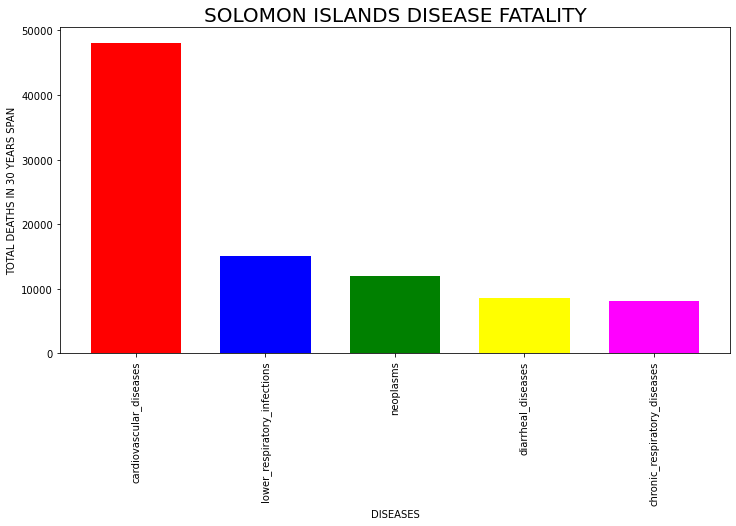

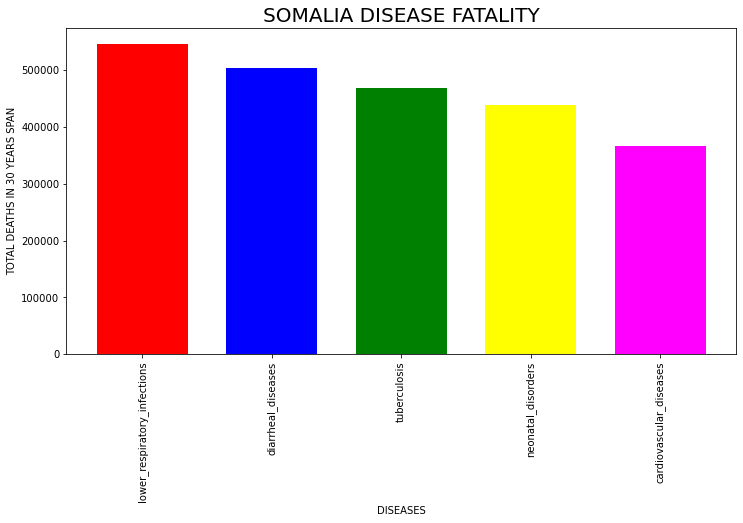

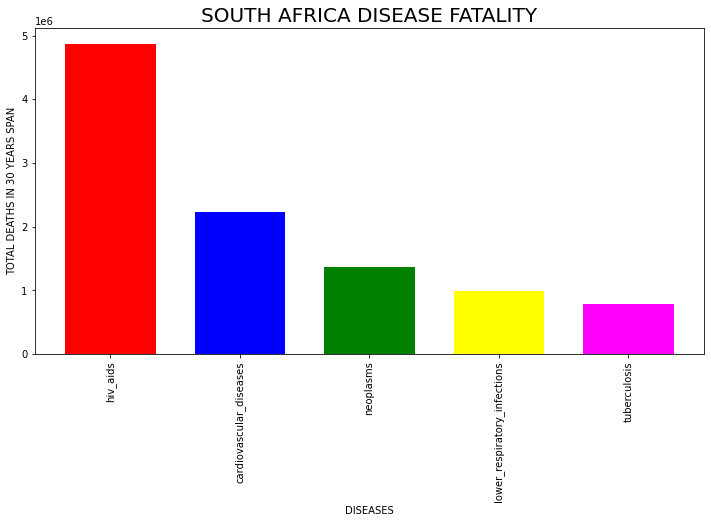

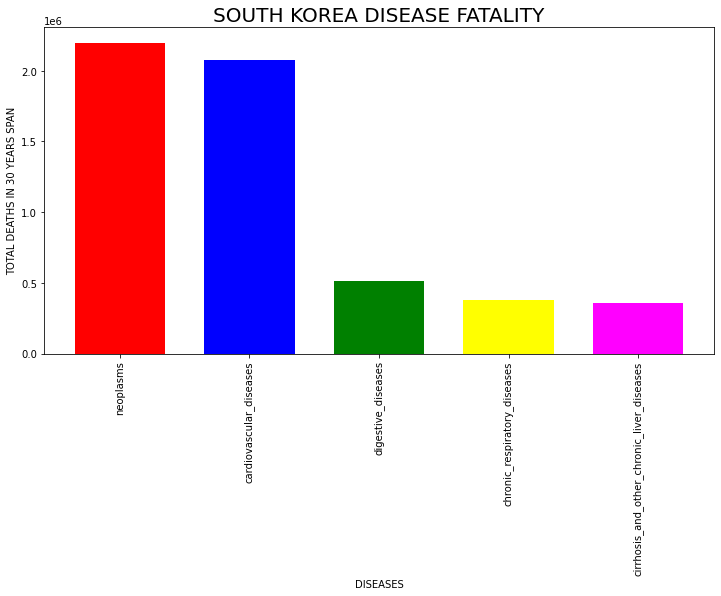

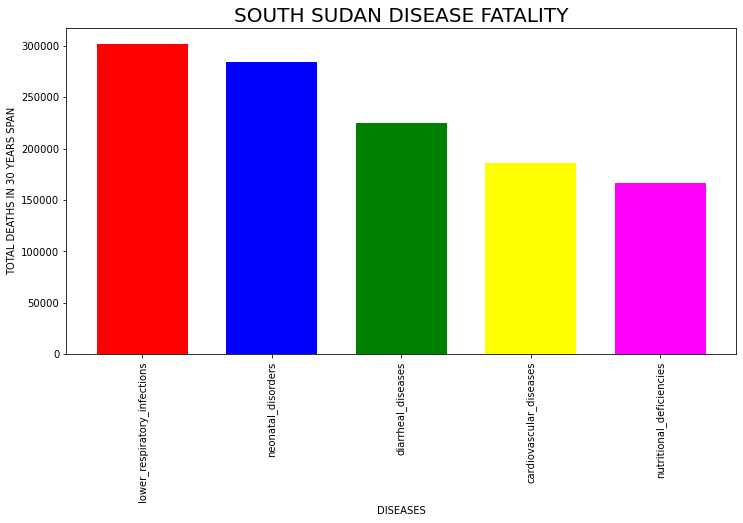

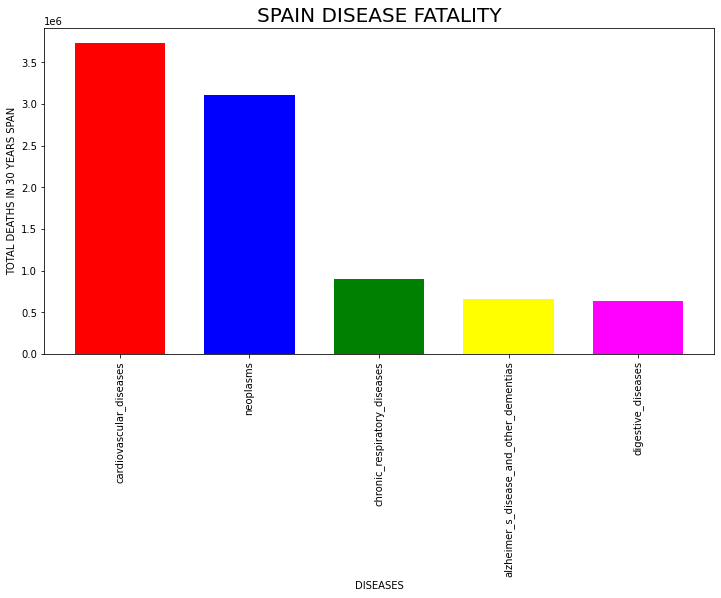

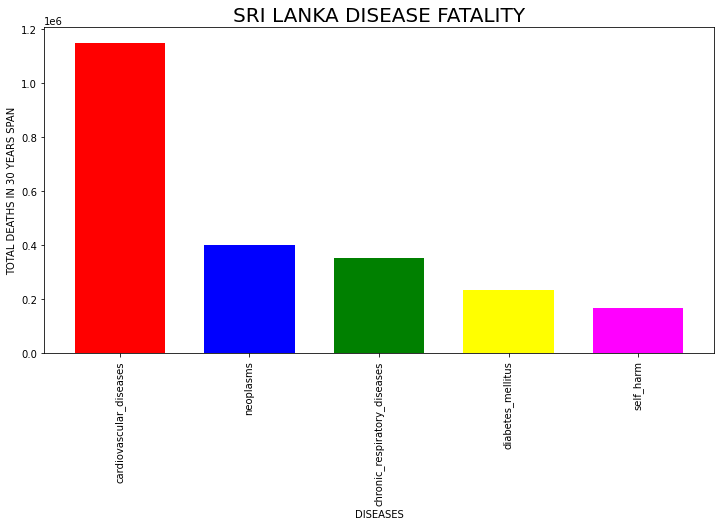

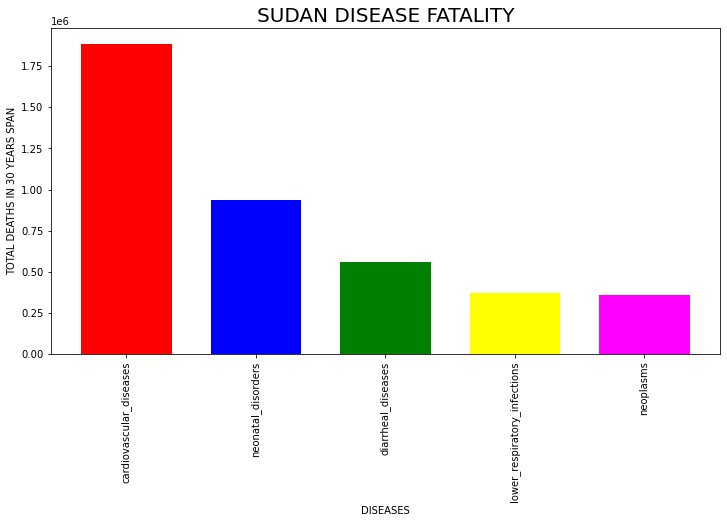

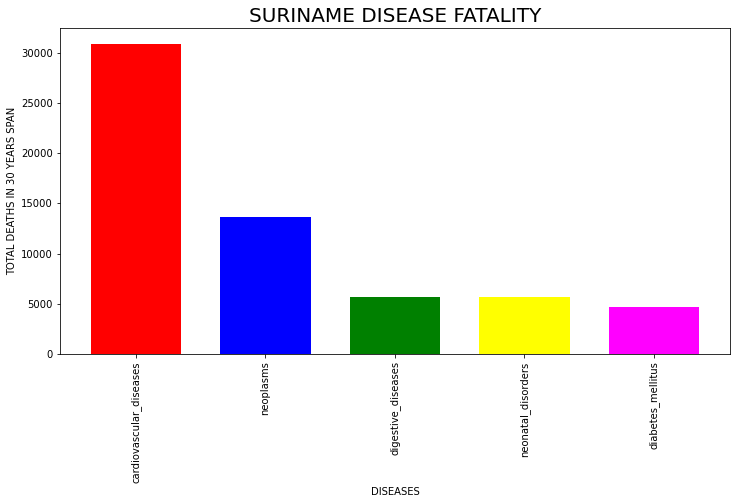

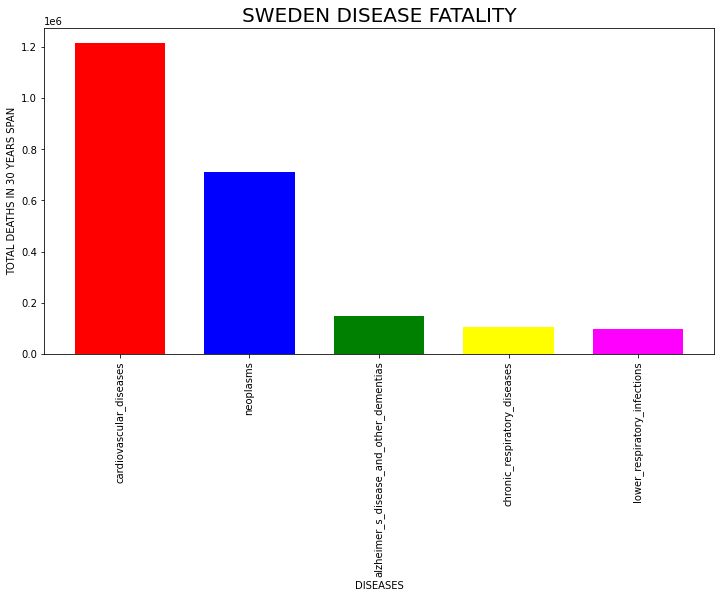

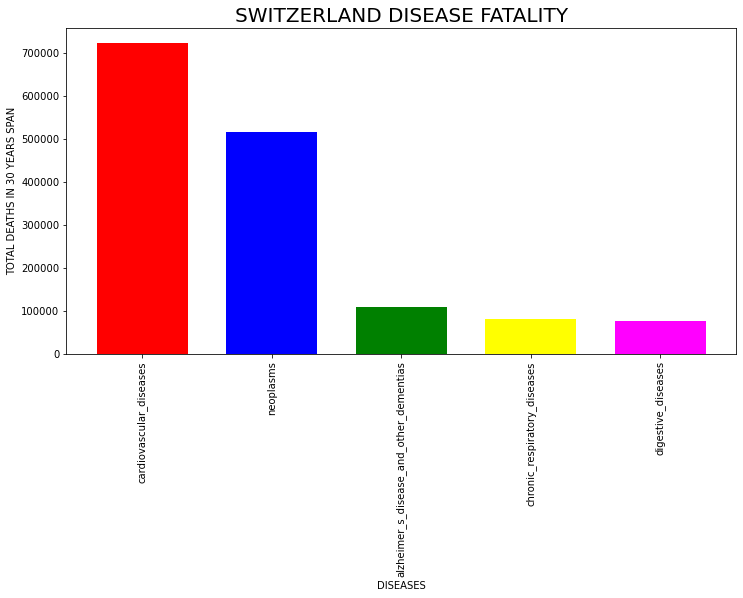

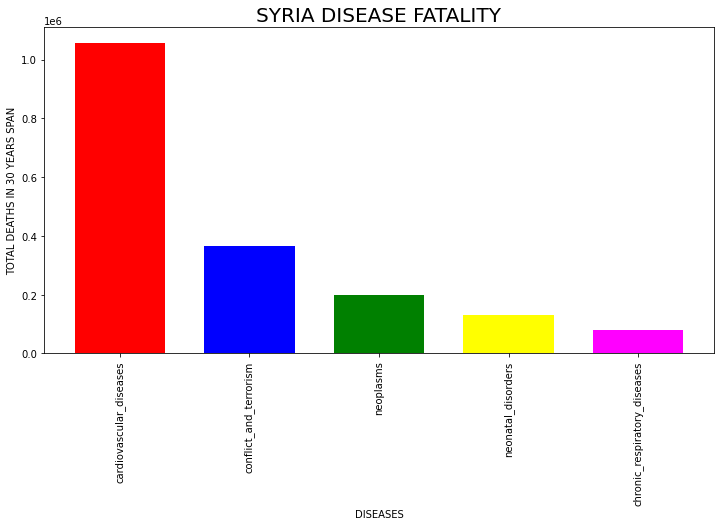

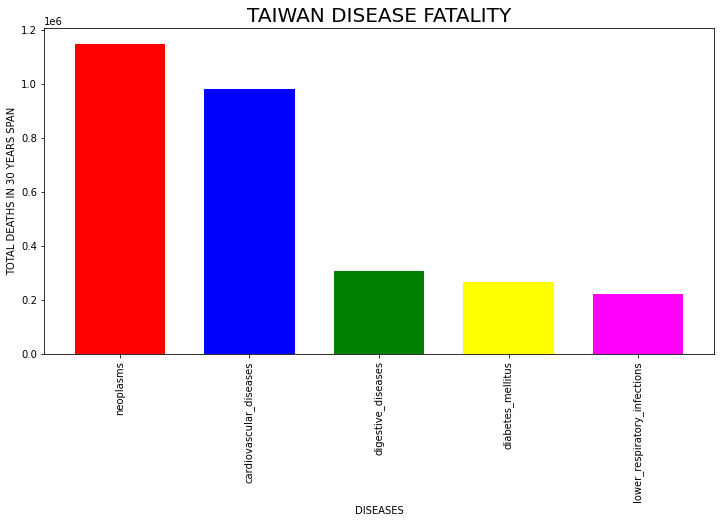

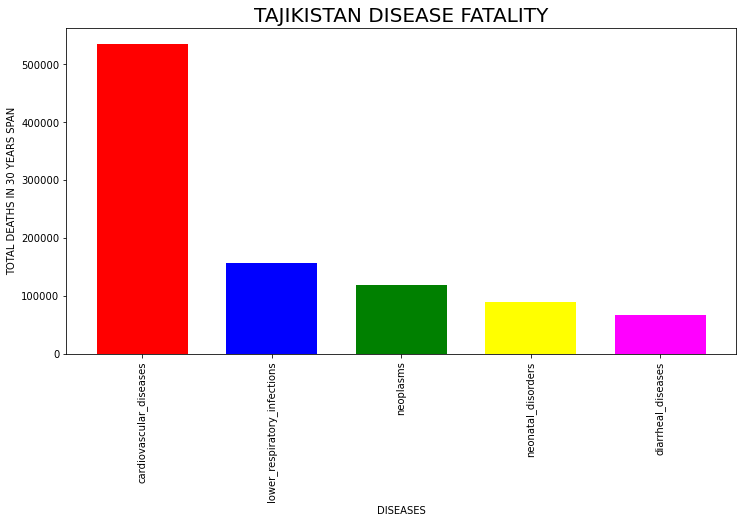

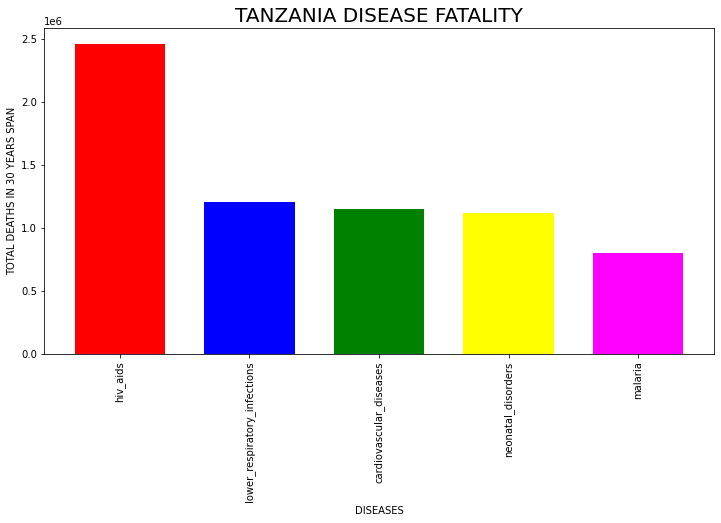

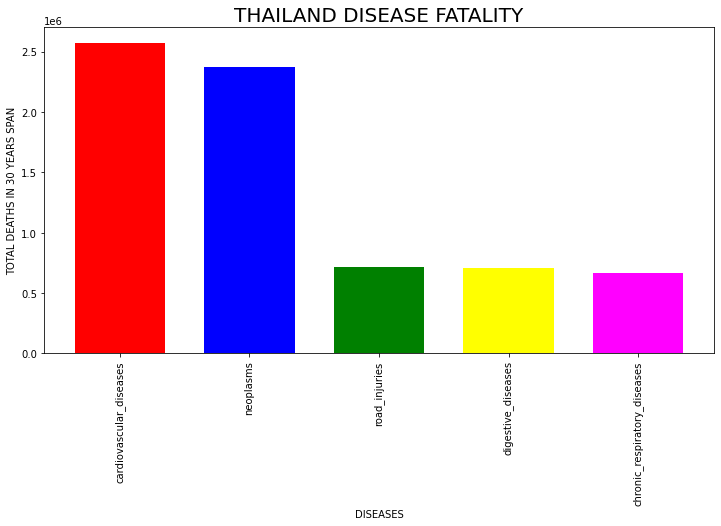

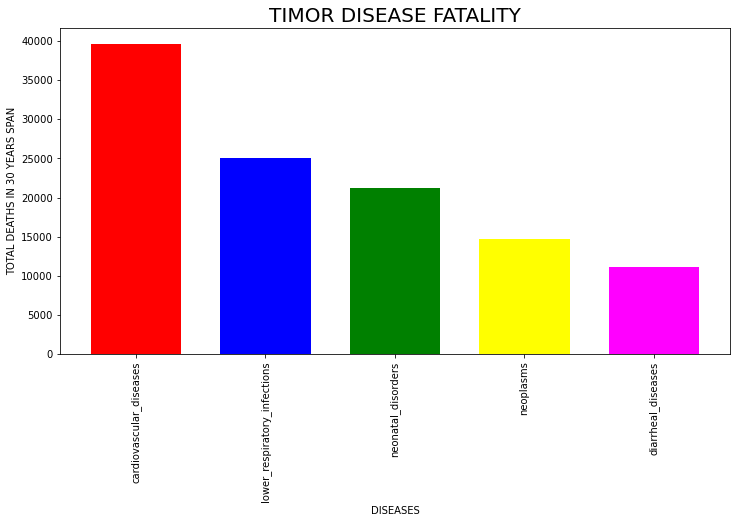

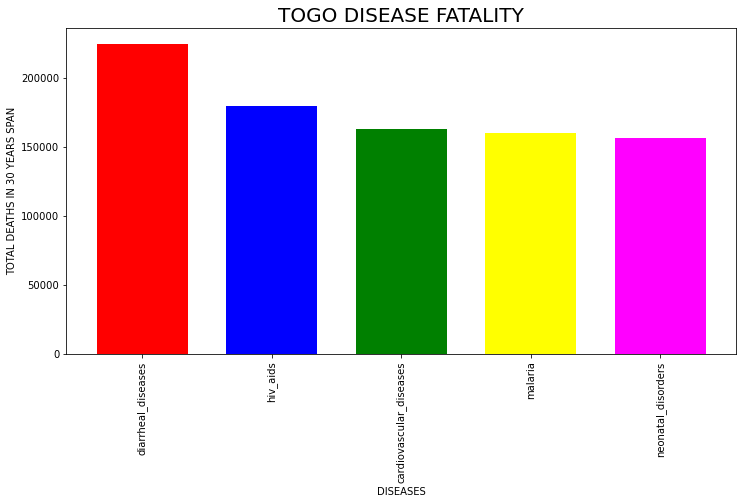

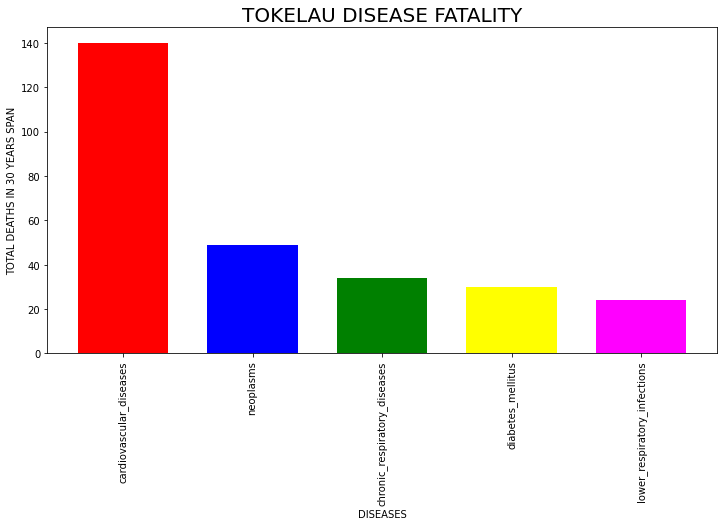

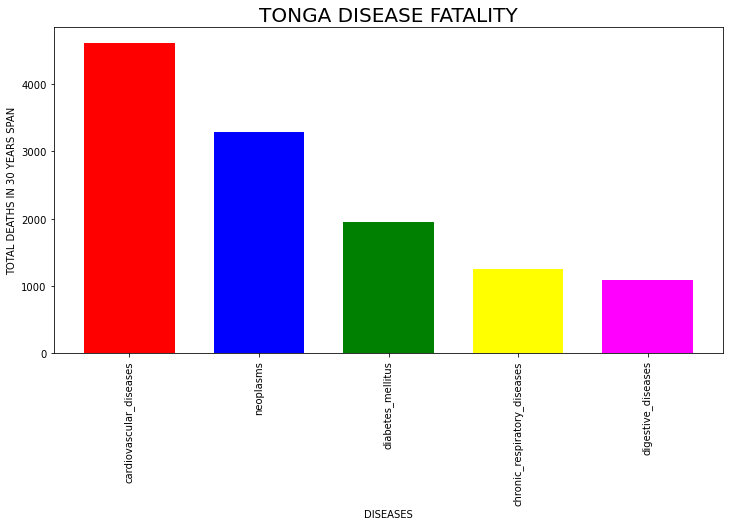

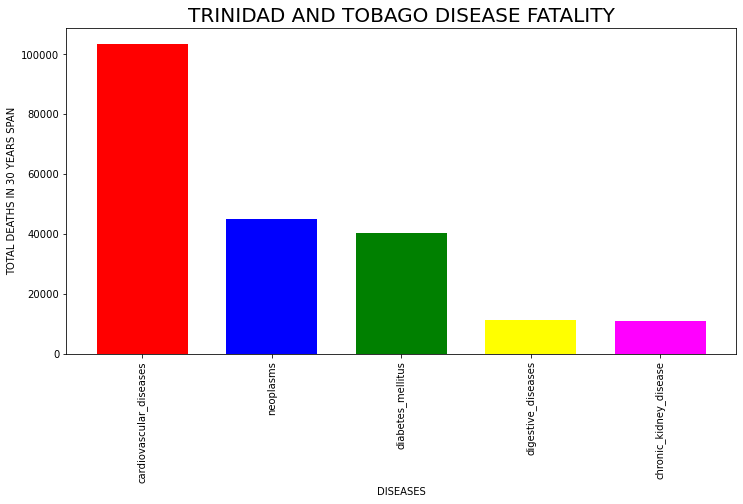

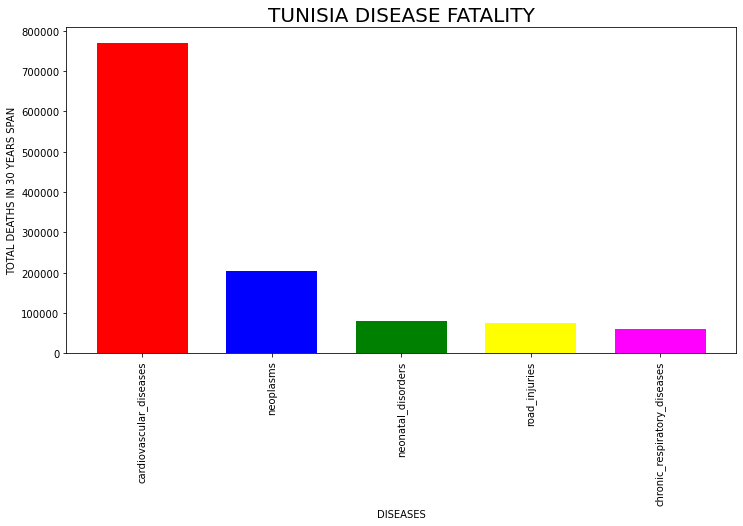

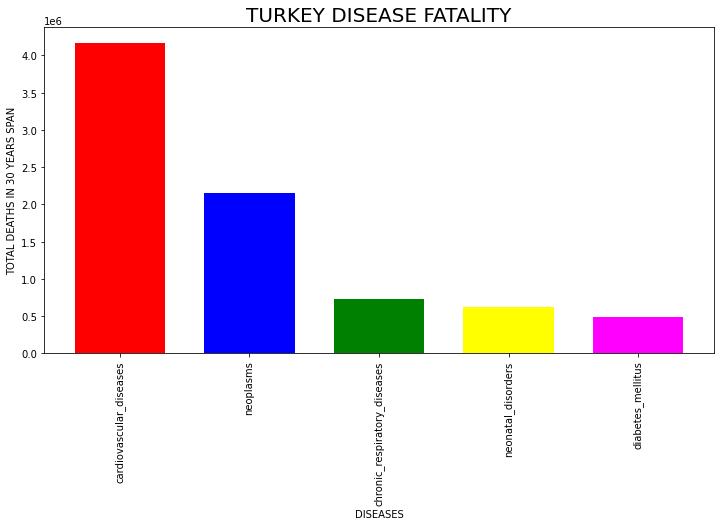

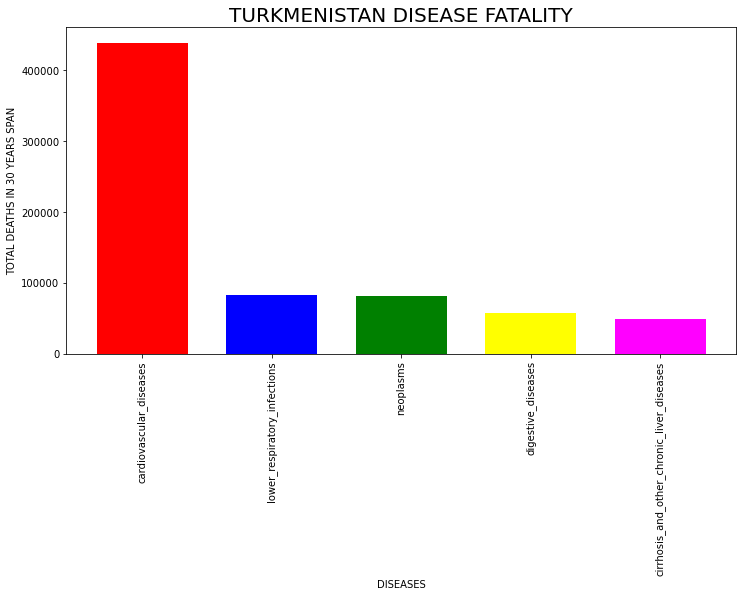

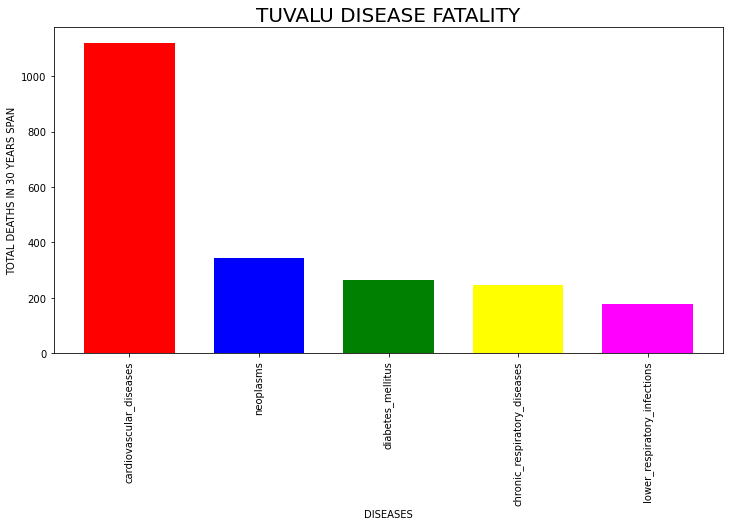

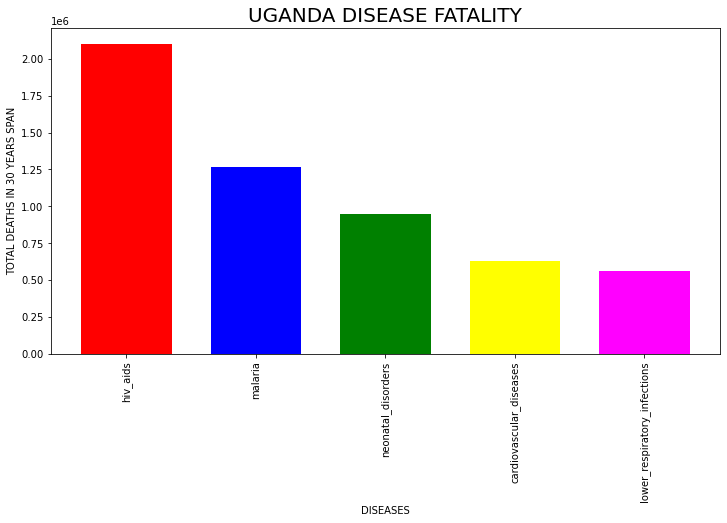

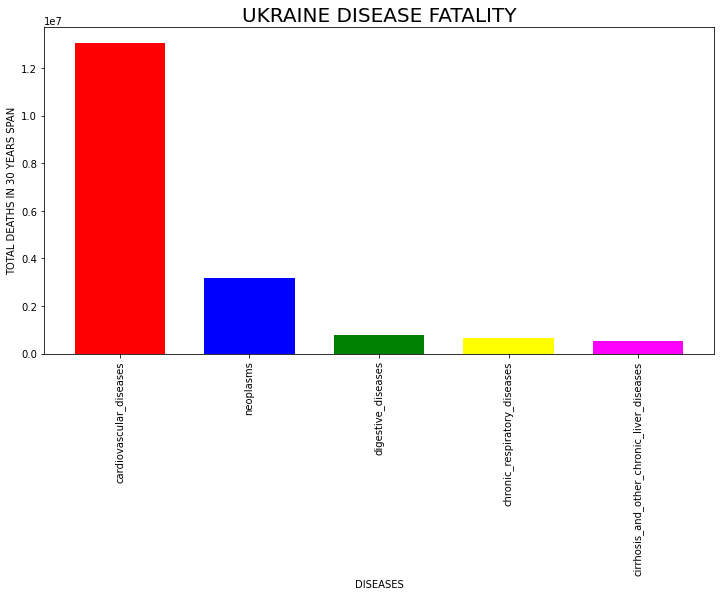

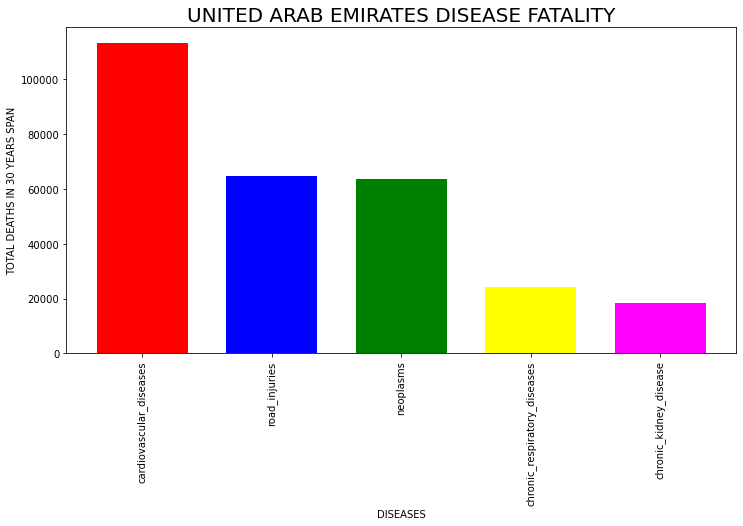

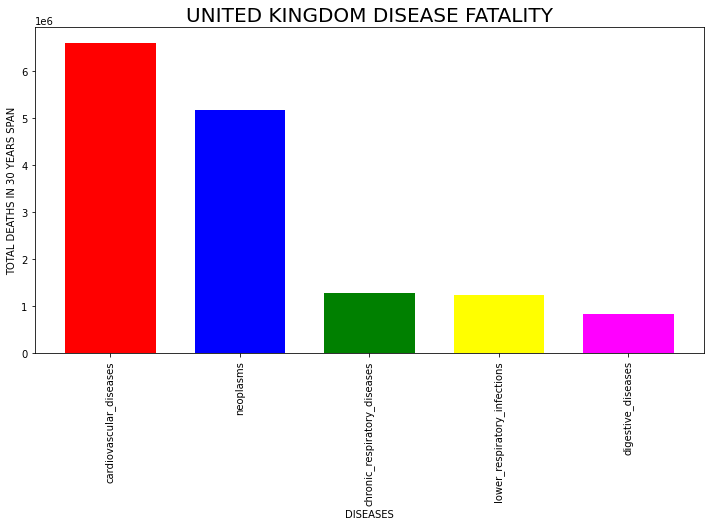

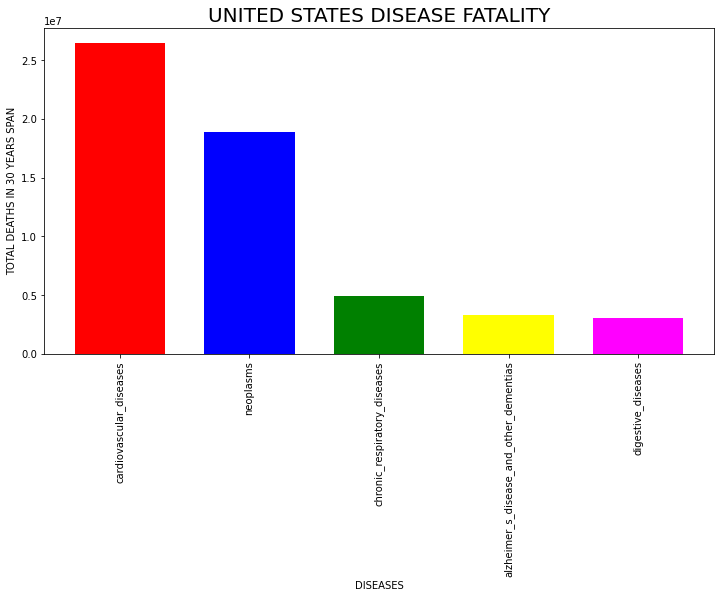

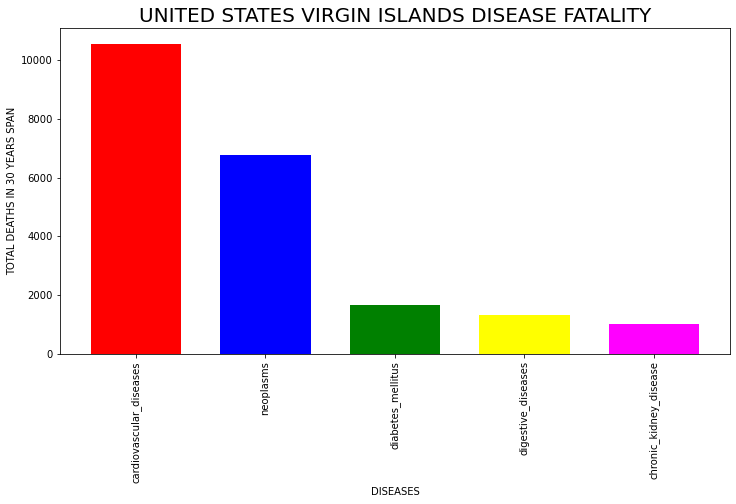

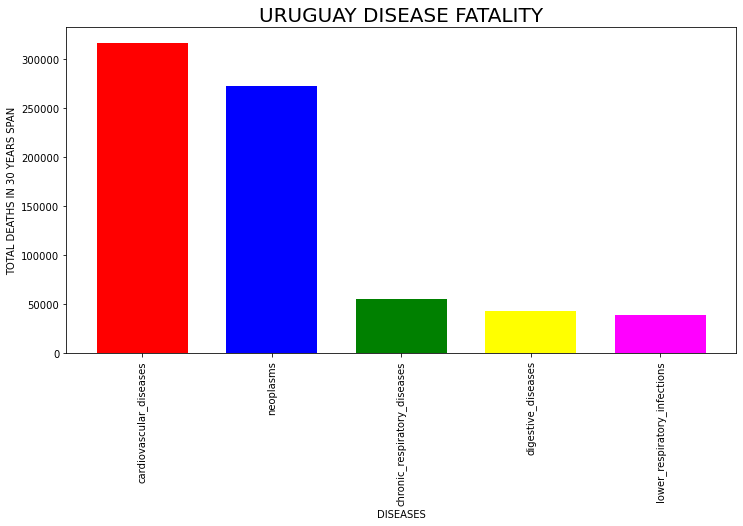

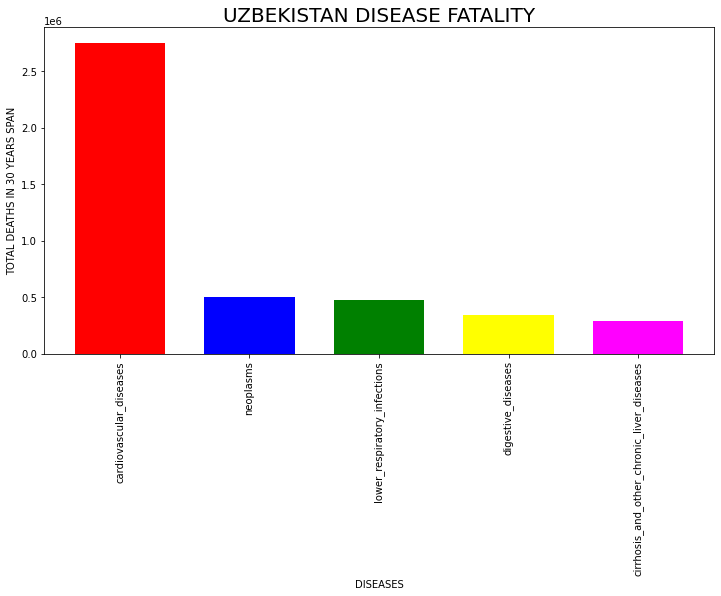

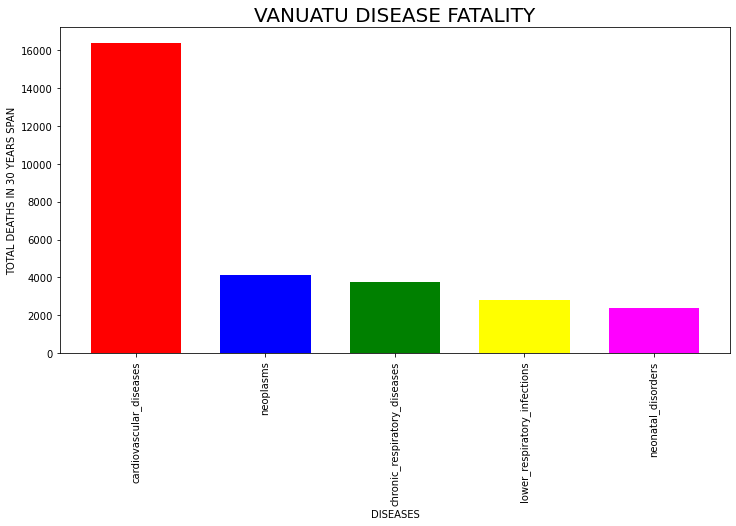

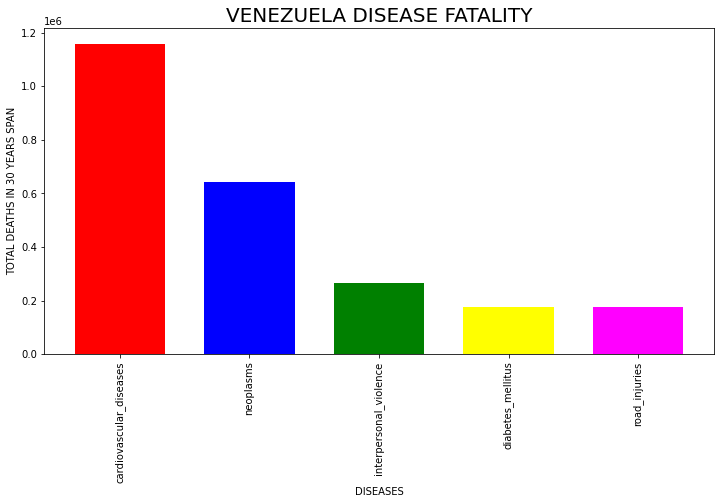

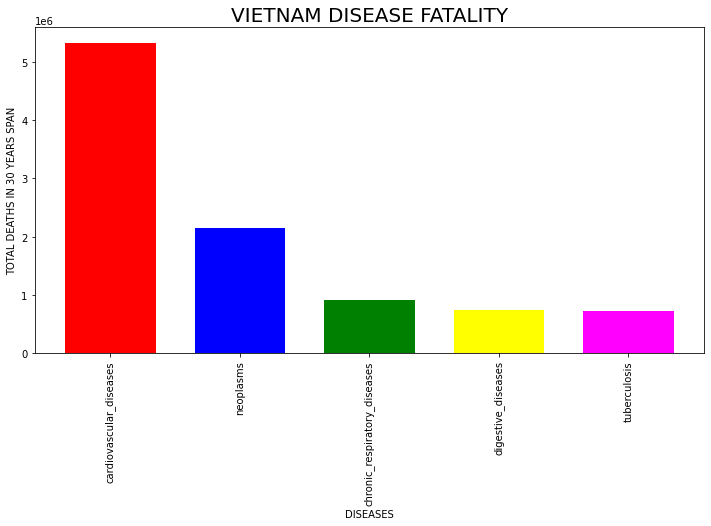

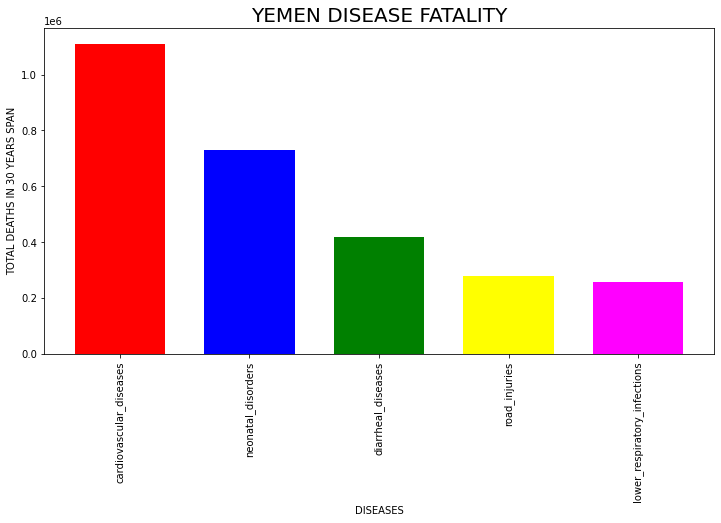

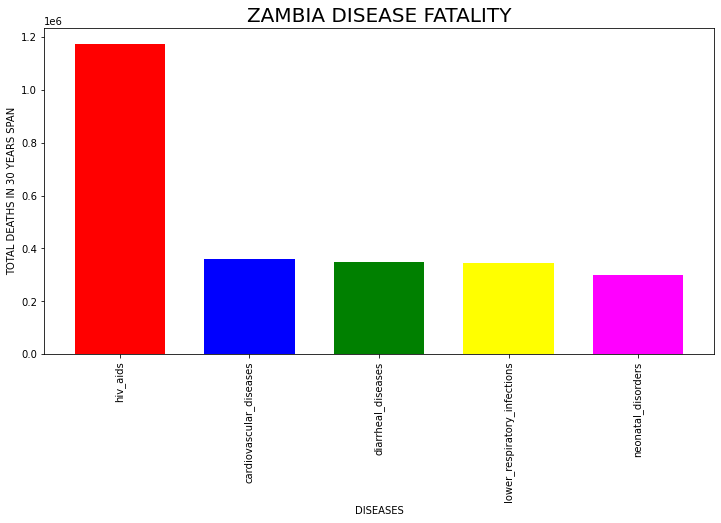

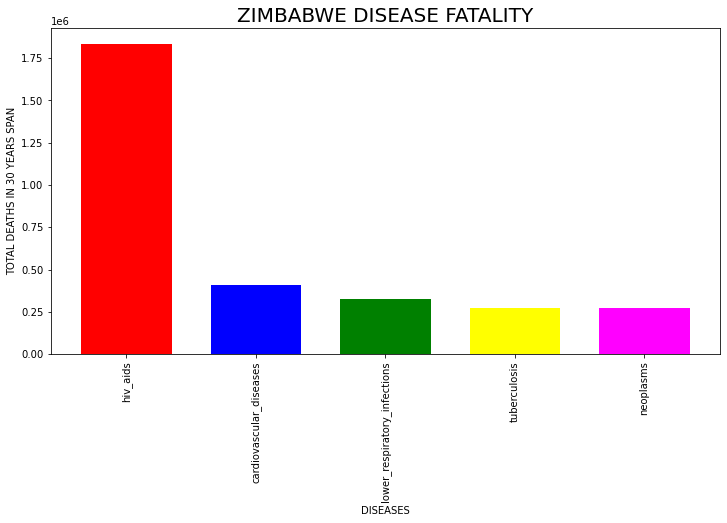

In [21]:

for x in df1.index:
    y = df1.country_territory.iloc[x]
    temp = df1.set_index('country_territory').iloc[x].nlargest(5)
    plt.figure(figsize=(12,6))
    plt.bar(data=temp ,x = temp.index , height = temp.values, width=0.7, color = ['red','blue','green', 'yellow', 'magenta'])
    plt.xticks(rotation='vertical')
    plt.xlabel("DISEASES" , size = 10)
    plt.ylabel('TOTAL DEATHS IN 30 YEARS SPAN',size = 10)
    plt.title(y.upper() +' DISEASE FATALITY',size =20)
    
    

# WHICH ARE THE COUNTRIES FACING OVERALL HIGHEST DEATHS DUE TO DISEASES


In [22]:
df1['Total_Deaths'] = df1.sum(axis=1)

C:\Users\Atharv\AppData\Local\Temp\ipykernel_8084\2255903096.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1['Total_Deaths'] = df1.sum(axis=1)


In [23]:
df1

country_territory  meningitis  alzheimer_s_disease_and_other_dementias  \
0         Afghanistan       78666                                    41998   
1             Albania        1323                                    16549   
2             Algeria       15685                                    86914   
3      American Samoa          30                                      143   
4             Andorra           0                                      614   
..                ...         ...                                      ...   
198         Venezuela       11615                                   108735   
199           Vietnam       38559                                   369363   
200             Yemen       21095                                    31045   
201            Zambia       98886                                    13473   
202          Zimbabwe       41238                                    20017   

     parkinson_s_disease  nutritional_deficiencies  malaria  drowning  \
0                  13397                     71453    13924     56536   
1                   4491                       569        0      2397   
2                  22943                      7138       70     24273   
3                     69                        60        0       120   
4                    137                         0        0         0   
..                   ...                       ...      ...       ...   
198                18573                     22554     3726     20273   
199                83322                     48613    17311    214356   
200                 7188                     68939   143463     27994   
201                 4054                     95913   205529     12809   
202                 5764                     66723   118728     18169   

     interpersonal_violence  maternal_disorders  hiv_aids  ...  \
0                    108228              129621      4282  ...   
1                      5242                 246        57  ...   
2                     16702               29475      6101  ...   
3                       101                  30        15  ...   
4                        15                   0        85  ...   
..                      ...                 ...       ...  ...   
198                  266071               12739     46090  ...   
199                   47981               13167    148838  ...   
200                   17918               53611      6276  ...   
201                   30065               28395   1175563  ...   
202                   32741               29802   1836042  ...   

     chronic_kidney_disease  poisonings  protein_energy_malnutrition  \
0                    134676     14530.0                        70163   
1                      7636       500.0                          526   
2                    154666     12337.0                         6407   
3                       512         0.0                           60   
4                       292         0.0                            0   
..                      ...         ...                          ...   
198                  161667      2607.0                        21347   
199                  396874     34681.0                         7366   
200                   52119     12561.0                        66731   
201                   41751      9056.0                        92915   
202                   49952      9113.0                        65942   

     road_injuries  chronic_respiratory_diseases  \
0           208331                        209857   
1             8522                         22632   
2           369395                        168453   
3              164                           612   
4              259                           838   
..             ...                           ...   
198         175036                        122198   
199         594980                        911787   
200         278327                        126525   
201         

In [24]:
#for top 10 country and total deaths are selected 
top10 = df1[['country_territory','Total_Deaths']].sort_values('Total_Deaths',ascending= False)[:10]

In [25]:
top10

country_territory  Total_Deaths
37              China   265408106.0
80              India   238158165.0
193     United States    71197802.0
148            Russia    59591155.0
81          Indonesia    44046941.0
128           Nigeria    43670014.0
135          Pakistan    38151878.0
25             Brazil    32674112.0
88              Japan    31922807.0
66            Germany    25559667.0

Text(0.5, 1.0, 'OVERALL DISEASE FATALITY ACROSS TOP 10 COUNTRIES')

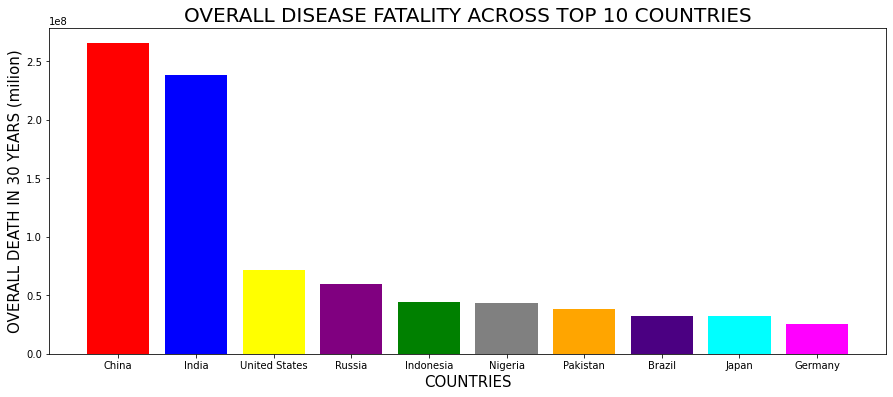

In [26]:
plt.figure(figsize=(15,6))
plt.bar(data=top10,x="country_territory",height="Total_Deaths",color=['red','blue','yellow','purple','green','gray','orange','indigo','aqua','magenta'])
plt.xlabel("COUNTRIES",size=15)
plt.ylabel("OVERALL DEATH IN 30 YEARS (milion)",size=15)
plt.title("OVERALL DISEASE FATALITY ACROSS TOP 10 COUNTRIES",size=20)

# WHICH ARE THE TOP KILLER DISEASES IN THE WORLD

In [27]:
disease = df1.sum()[1:-1].to_frame().reset_index()

C:\Users\Atharv\AppData\Local\Temp\ipykernel_8084\3194586428.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  disease = df1.sum()[1:-1].to_frame().reset_index()


In [28]:
disease.rename(mapper={'index':'Disease',0:'Total_Deaths'},axis=1,inplace=True)

In [29]:
disease = disease.sort_values(by='Total_Deaths',ascending=False).reset_index(drop=True)

In [30]:
# Aggregating Countires with values lesser than 23713931 into Others
disease.loc[disease.Total_Deaths <23713931 ].sum()
disease.loc[len(disease.index)] = ['Others',98347130]
disease.drop(disease.index[16:-1],axis=0,inplace =True)
disease.reset_index(drop=True,inplace=True)

Text(0.5, 1.0, 'FATAL DISEASE BURDEN OF THE WORLD')

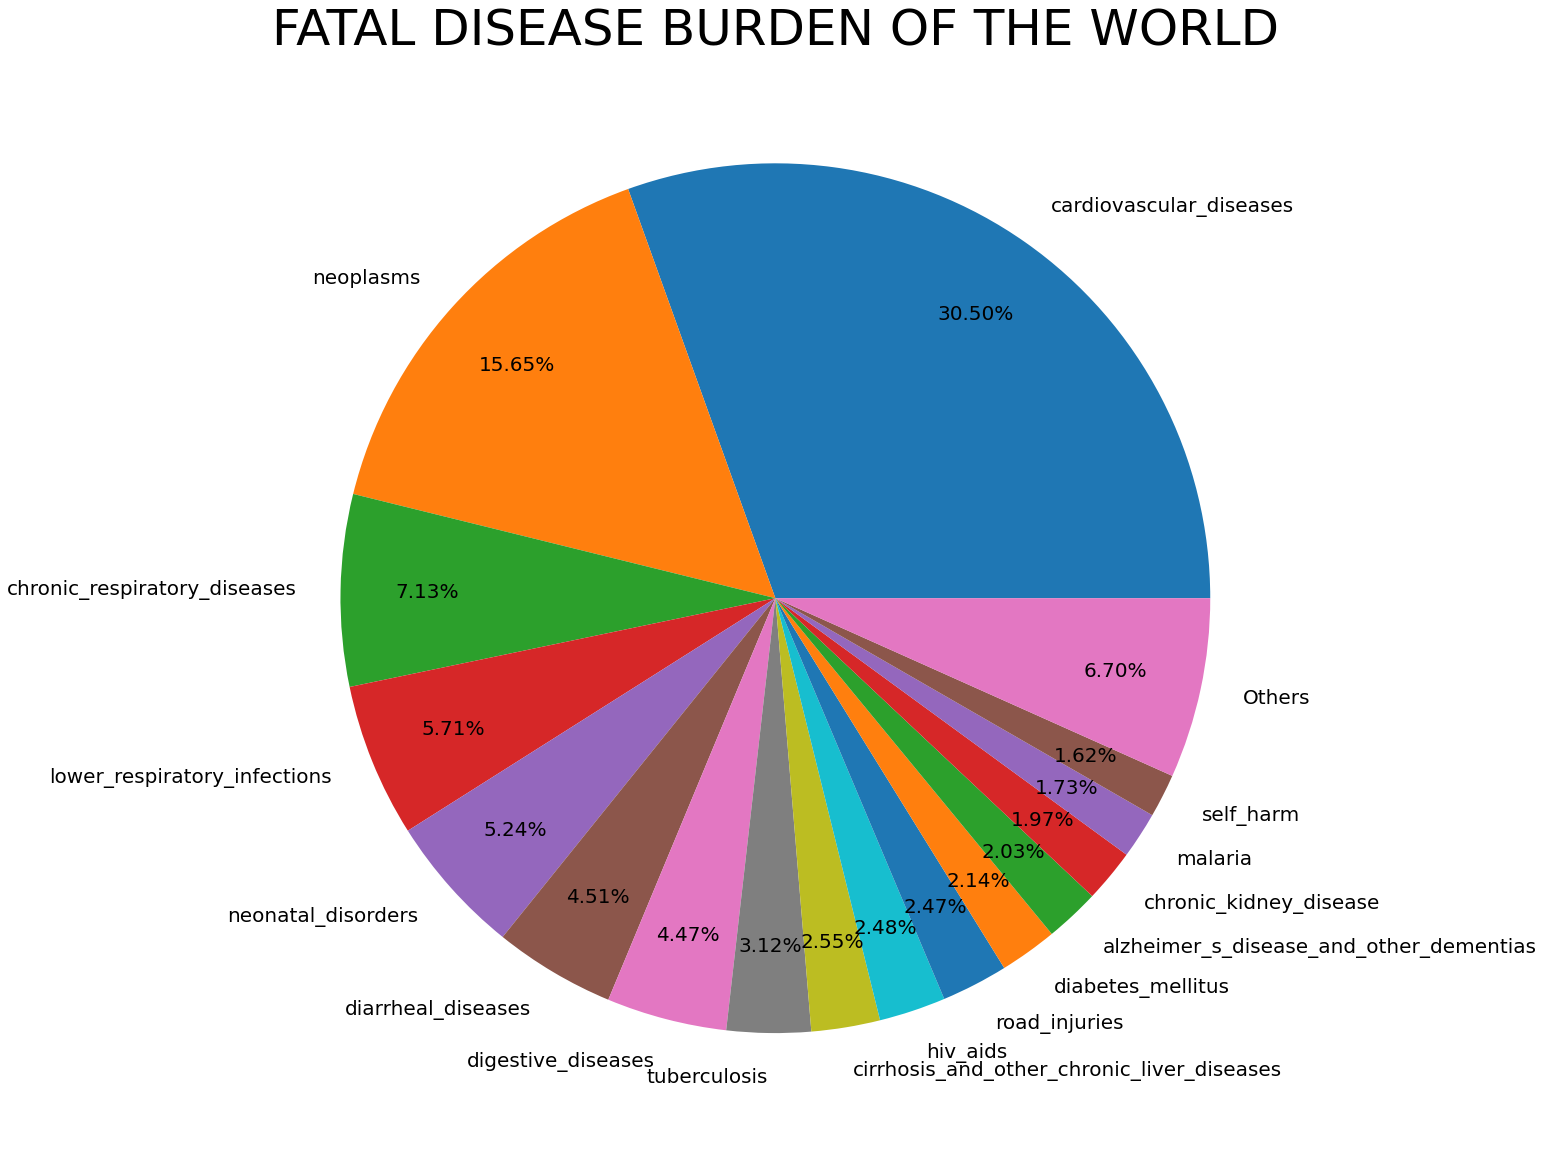

In [31]:
# Plotting the pie chart
plt.figure(figsize=(20,20))
plt.pie(data=disease, labels = 'Disease' , x = 'Total_Deaths',autopct="%.2f%%", pctdistance = 0.8 , textprops={'fontsize': 20})
plt.title("FATAL DISEASE BURDEN OF THE WORLD", size=50)

Same graph rendered with Plotly express for better visulization

In [32]:
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [33]:
fig = px.pie(disease, names = 'Disease' , values = 'Total_Deaths', color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_traces(textposition='inside', textinfo='percent+label',)
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.update(layout_showlegend=False)

# FATAL DISEASE BURDEN OF THE WORLD

 OBSERVATIONS - CHINA , INDIA AND USA face the largest brunt of deaths due to diseases in the world Cardiovascular diseases , Neoplasms (Malignancy/Cancer) and Lower Respiratory Tract Infections (for example : Pneumonia) are the top 3 killer disases in the world.

# Cardiovascular disease remains the leading burden of disease

The number of deaths related to cardiovascular problems increases year by year, accounting for the highest proportion of all causes. Especially in countries with large populations and developed economies.

According to WHO data, heart disease is the largest cause of death in the world. In which, ischemic heart disease accounted for 16% and stroke accounted for 11% of global deaths. Since 2000, the number of deaths from the disease has increased the most, increasing by more than 2 million to 8.9 million deaths in 2019.

Especially in the current situation of COVID-19 epidemic, the risk of death often focuses mainly on the elderly population, with underlying medical conditions such as hypertension, cardiovascular disease and other chronic diseases. Data from Wuhan (China) show that the mortality rate accounts for 10.5% in people with COVID-19 with heart disease, 7.3% in people with diabetes, 6.3% in people with diabetes. people with respiratory disease and 6% in those with hypertension. On the other hand, worries about the epidemic situation and people's travel restrictions have led to cardiovascular patients delaying their follow-up visits. This is really dangerous for general chronic illness, which often has no obvious symptoms or signs.

Model Building-

In [34]:
df_model = df[['meningitis',
       'alzheimer_s_disease_and_other_dementias', 'parkinson_s_disease',
       'nutritional_deficiencies', 'malaria', 'drowning',
       'interpersonal_violence', 'maternal_disorders', 'hiv_aids',
       'drug_use_disorders', 'tuberculosis', 'cardiovascular_diseases',
       'lower_respiratory_infections', 'neonatal_disorders',
       'alcohol_use_disorders', 'self_harm', 'exposure_to_forces_of_nature',
       'diarrheal_diseases', 'environmental_heat_and_cold_exposure',
       'neoplasms', 'conflict_and_terrorism', 'diabetes_mellitus',
       'chronic_kidney_disease', 'poisonings', 'protein_energy_malnutrition',
       'road_injuries', 'chronic_respiratory_diseases',
       'cirrhosis_and_other_chronic_liver_diseases', 'digestive_diseases',
       'fire,_heat,_and_hot_substances', 'acute_hepatitis']]

In [35]:
df_model.head(3)

meningitis  alzheimer_s_disease_and_other_dementias  parkinson_s_disease  \
0        2159                                     1116                  371   
1        2218                                     1136                  374   
2        2475                                     1162                  378   

   nutritional_deficiencies  malaria  drowning  interpersonal_violence  \
0                      2087       93      1370                    1538   
1                      2153      189      1391                    2001   
2                      2441      239      1514                    2299   

   maternal_disorders  hiv_aids  drug_use_disorders  ...  diabetes_mellitus  \
0                2655        34                  93  ...               2108   
1                2885        41                 102  ...               2120   
2                3315        48                 118  ...               2153   

   chronic_kidney_disease  poisonings  protein_energy_malnutrition  \
0                    3709         338                         2054   
1                    3724         351                         2119   
2                    3776         386                         2404   

   road_injuries  chronic_respiratory_diseases  \
0           4154                          5945   
1           4472                          6050   
2           5106                          6223   

   cirrhosis_and_other_chronic_liver_diseases  digestive_diseases  \
0                                        2673                5005   
1                                        2728                5120   
2                                        2830                5335   

   fire,_heat,_and_hot_substances  acute_hepatitis  
0                             323             2985  
1                             332             3092  
2                             360             3325  

[3 rows x 31 columns]

In [36]:
len(df_model.columns)

31

In [37]:
model=KMeans(n_clusters=3) 
y_model= model.fit_predict(df_model)
y_model

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

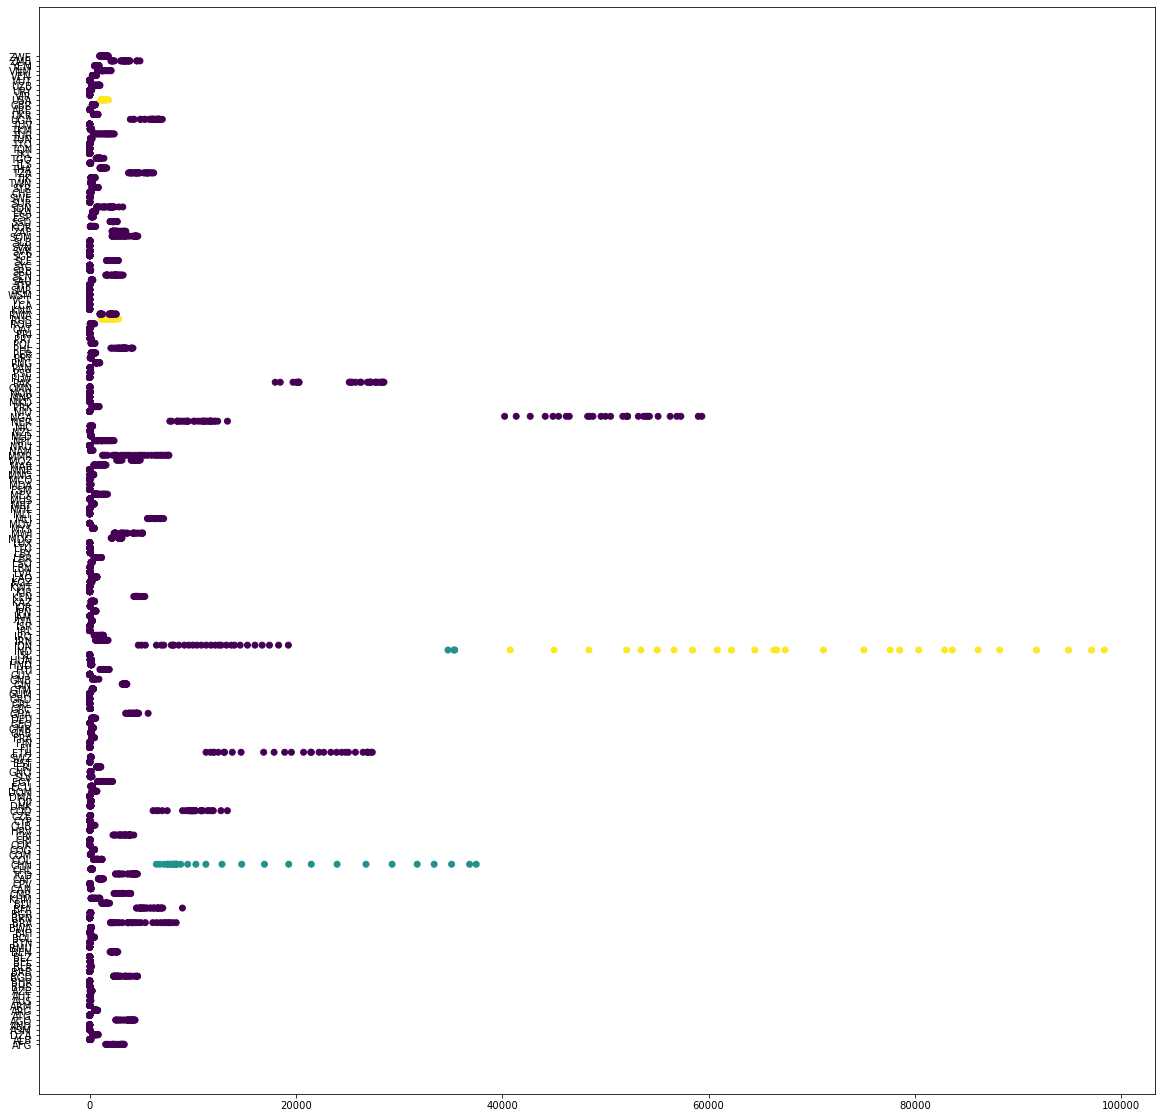

In [39]:
plt.figure(figsize=(20,20))
plt.scatter(df_model.iloc[:,0],df.iloc[:,1],c=model.labels_,cmap='viridis')

In [40]:
pd.value_counts(y_model)

0    6000
2      87
1      33
dtype: int64

In [41]:
#Looking at the points that belong to cluster0
df_model[y_model==0]

meningitis  alzheimer_s_disease_and_other_dementias  \
0           2159                                     1116   
1           2218                                     1136   
2           2475                                     1162   
3           2812                                     1187   
4           3027                                     1211   
...          ...                                      ...   
6115        1439                                      754   
6116        1457                                      767   
6117        1460                                      781   
6118        1450                                      795   
6119        1450                                      812   

      parkinson_s_disease  nutritional_deficiencies  malaria  drowning  \
0                     371                      2087       93      1370   
1                     374                      2153      189      1391   
2                     378                      2441      239      1514   
3                     384                      2837      108      1687   
4                     391                      3081      211      1809   
...                   ...                       ...      ...       ...   
6115                  215                      3019     2518       770   
6116                  219                      3056     2050       801   
6117                  223                      2990     2116       818   
6118                  227                      2918     2088       825   
6119                  232                      2884     2068       827   

      interpersonal_violence  maternal_disorders  hiv_aids  \
0                       1538                2655        34   
1                       2001                2885        41   
2                       2299                3315        48   
3                       2589                3671        56   
4                       2849                3863        63   
...                      ...                 ...       ...   
6115                    1302                1355     29162   
6116                    1342                1338     27141   
6117                    1363                1312     24846   
6118                    1396                1294     22106   
6119                    1434                1294     20722   

      drug_use_disorders  ...  diabetes_mellitus  chronic_kidney_disease  \
0                     93  ...               2108                    3709   
1                    102  ...               2120                    3724   
2                    118  ...               2153                    3776   
3                    132  ...               2195                    3862   
4                    142  ...               2231                    3932   
...                  ...  ...                ...                     ...   
6115                 104  ...               3176                    2108   
6116                 110  ...               3259                    2160   
6117                 115  ...               3313                    2196   
6118                 121  ...               3381                    2240   
6119                 127  ...               3460                    2292   

      poisonings  protein_energy_malnutrition  road_injuries  \
0            338                         2054           4154   
1            351                         2119           4472   
2            386                         2404           5106   
3            425                         2797           5681   
4            451                         3038           6001   
...          ...                          ...            ...   
6115         381                         2990           2373   
6116         393                         3027           2436   
6117         398                         2962           2473   
6118         400                         2890           2509   
6119         405      

In [42]:
#Looking at the points that belong to cluster1
df_model[y_model==1]

meningitis  alzheimer_s_disease_and_other_dementias  \
1110        8407                                   187358   
1111        8384                                   197380   
1112        8394                                   208139   
1113        8341                                   218436   
1114        8193                                   225852   
1115        8057                                   232656   
1116        7971                                   239240   
1117        7740                                   249056   
1118        7553                                   259217   
1119        7550                                   275481   
1120       37473                                    93316   
1121       36834                                    95470   
1122       35086                                    98135   
1123       33396                                   100822   
1124       31752                                   103621   
1125       29319                                   106958   
1126       26788                                   111481   
1127       23987                                   116489   
1128       21485                                   121766   
1129       19295                                   127660   
1130       16947                                   134438   
1131       14740                                   141288   
1132       12828                                   148675   
1133       11265                                   156132   
1134       10297                                   163879   
1135        9502                                   170967   
1136        8824                                   178510   
1137        7228                                   291962   
1138        6798                                   306747   
1139        6465                                   320715   
2457       35394                                   112741   
2458       35306                                   121785   
2459       34736                                   129011   

      parkinson_s_disease  nutritional_deficiencies  malaria  drowning  \
1110                52766                     10611       21     76277   
1111                54828                     10623       15     73624   
1112                57485                     10874        9     72888   
1113                60241                     11293       12     70955   
1114                61781                     11739       11     66696   
1115                62640                     12120        0     65110   
1116                63853                     12748        0     63152   
1117                65555                     13528        0     62733   
1118                66761                     14487        0     61489   
1119                69364                     15827        0     61049   
1120                31920                     42176     1535    153773   
1121                32607                     42446     2245    150399   
1122                33287                     37980     2061    144949   
1123                34129                     35265     1327    142119   
1124                34680                     32825     1146    138993   
1125                35450                     29567     1068    136083   
1126                36703                     27043      930    130813   
1127                37807                     24625      946    124856   
1128                38955                     22088      558    121543   
1129                40894                     19966     1142    115349   
1130                43357                     18083      120    111301   
1131                45240                     16332       35    105437   
1132                47020                     14403       60    100416   
1133                48660                     12952       46     94274   
1134                50802                     12030       51     90532   
1135   

In [43]:
#Looking at the points that belong to cluster2
df_model[y_model==2]

meningitis  alzheimer_s_disease_and_other_dementias  \
2430       62224                                    53407   
2431       60843                                    56488   
2432       58449                                    59418   
2433       53433                                    75330   
2434       52065                                    84796   
...          ...                                      ...   
5845        1288                                   109900   
5846        1273                                   112291   
5847        1137                                   138750   
5848        1142                                   141681   
5849        1146                                   143919   

      parkinson_s_disease  nutritional_deficiencies  malaria  drowning  \
2430                26269                     67671    68053     67595   
2431                27779                     63747    62028     67494   
2432                27243                     58734    58617     65811   
2433                30619                     51001    42686     66282   
2434                34226                     47070    32921     63122   
...                   ...                       ...      ...       ...   
5845                22755                      4372        0      3850   
5846                23243                      4257        0      3888   
5847                30014                      5814        0      3769   
5848                31277                      5934        0      3687   
5849                32211                      6090        0      3615   

      interpersonal_violence  maternal_disorders  hiv_aids  \
2430                   44087               69323    163270   
2431                   44464               66685    155231   
2432                   43077               63708    142325   
2433                   39520               55026    101377   
2434                   39234               53088     91805   
...                      ...                 ...       ...   
5845                   19380                1007     13839   
5846                   19765                1042     13265   
5847                   18831                1101      7338   
5848                   18086                1048      7200   
5849                   17709                 990      7053   

      drug_use_disorders  ...  diabetes_mellitus  chronic_kidney_disease  \
2430                6092  ...             171589                  163299   
2431                6120  ...             179626                  168171   
2432                6216  ...             177064                  165221   
2433                6023  ...             207229                  178139   
2434                6495  ...             218827                  185457   
...                  ...  ...                ...                     ...   
5845               25614  ...              75892                   67056   
5846               27277  ...              74669                   69954   
5847               60518  ...              72239                  101751   
5848               62871  ...              75081                  104364   
5849               65717  ...              77719                  106954   

      poisonings  protein_energy_malnutrition  road_injuries  \
2430        5556                        47214         190881   
2431        5573                        43721         199985   
2432        5323                        39887         202133   
2433        4772                        32879         218869   
2434        4617                        29696         213635   
...          ...                          ...            ...   
5845        1343                         3967          48654   
5846        1388                         3866          48092   
5847        1599                         5453          42206   
5848        1562                         5565          41792   
5849        1528      

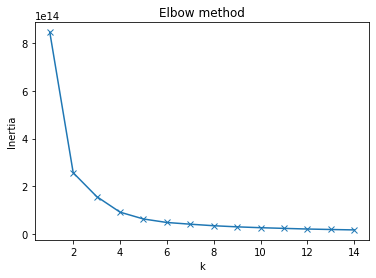

In [44]:
wcss =[]
K=range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_model)
    wcss.append(km.inertia_)
plt.plot(K,wcss,marker="x")
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title("Elbow method")
plt.show()